Librerias

In [1]:
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import sklearn as sk
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import LocalOutlierFactor

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

Lectura Dataset

In [2]:
from IPython.display import display, HTML


def display_side_by_side(dfs: list, captions: list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [3]:
complete_dataset = pd.read_csv('datasets/properati_argentina_2021.csv')
df = complete_dataset.copy()

### Análisis Exploratorio y Preprocesamiento de Datos

Primero, observaremos un poco los datos que tiene el dataset

**Primeras 5 observaciones**

In [4]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

**Ultimas 5 observaciones**

In [5]:
df.tail()

id  start_date    end_date  created_on  \
460149  EWHC/xcODFkeEA0+pPE6Rw==  2021-01-05  2021-01-08  2021-01-05   
460150  txKUq0LjMaORjJQeeqTOfw==  2021-01-05  2021-11-01  2021-01-05   
460151  E0zwHT18DX8AxhU22hXgng==  2021-01-05  2021-03-01  2021-01-05   
460152  Ec4Tvy/WX5f6RgfaJf2FHQ==  2021-01-05  2021-11-28  2021-01-05   
460153  Y7KBafQ+e5noGh2Pio0xLg==  2021-01-05  9999-12-31  2021-01-05   

          latitud   longitud                  place_l2               place_l3  \
460149 -34.599594 -58.588715  Bs.As. G.B.A. Zona Oeste        Tres de Febrero   
460150 -34.582777 -58.545220  Bs.As. G.B.A. Zona Norte     General San Martín   
460151        NaN        NaN  Bs.As. G.B.A. Zona Norte     General San Martín   
460152 -33.226234 -60.331848                  Santa Fe     Villa Constitución   
460153 -26.827938 -65.220708                   Tucumán  San Miguel de Tucumán   

           place_l4 place_l5  place_l6 operation    property_type  \
460149          NaN      NaN       NaN     Venta  Local comercial   
460150  Villa Lynch      NaN       NaN     Venta  Local comercial   
460151          NaN      NaN       NaN     Venta  Local comercial   
460152          NaN      NaN       NaN  Alquiler  Local comercial   
460153          NaN      NaN       NaN     Venta  Local comercial   

        property_rooms  property_bedrooms  property_surface_total  \
460149             NaN                NaN                   113.0   
460150             NaN                NaN                 11580.0   
460151             NaN                NaN                   915.0   
460152             NaN                NaN                     NaN   
460153             1.0                NaN                   243.0   

        property_surface_covered  property_price property_currency  \
460149                     113.0        190000.0               USD   
460150                   11580.0       3500000.0               USD   
460151                     915.0        800000.0               USD   
460152                      15.0             NaN               NaN   
460153                     133.0        160000.0               USD   

                                           property_title  
460149   LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-  
460150                      Nave Industrial - Villa Lynch  
460151  importante edificio comercial en tres plantas ...  
460152                         Local - Villa Constitucion  
460153                      Local - San Miguel De Tucumán

**Filas y Columnas**

In [6]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 460154 filas y 20 columnas


**Metrica del dataset**

In [7]:
df.describe()

latitud       longitud  place_l6  property_rooms  \
count  419740.000000  419740.000000       0.0   368498.000000   
mean      -34.228570     -59.557066       NaN        3.278053   
std         3.251509       2.905129       NaN        1.870832   
min       -54.832057    -103.219258       NaN        1.000000   
25%       -34.640132     -58.899343       NaN        2.000000   
50%       -34.585122     -58.488309       NaN        3.000000   
75%       -34.423414     -58.404876       NaN        4.000000   
max        42.557773     -35.044991       NaN       40.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count      344113.000000           397813.000000              4.279160e+05   
mean            2.297960              420.601250              9.605005e+03   
std             1.673985             4026.380748              3.440367e+06   
min            -3.000000               -1.000000             -3.000000e+00   
25%             1.000000               50.000000              4.500000e+01   
50%             2.000000               90.000000              7.800000e+01   
75%             3.000000              210.000000              1.700000e+02   
max           390.000000           200000.000000              2.147484e+09   

       property_price  
count    4.421530e+05  
mean     3.063273e+05  
std      4.899613e+06  
min      0.000000e+00  
25%      4.490000e+04  
50%      9.800000e+04  
75%      1.990000e+05  
max      1.500000e+09

**Tipos de datos**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

**Descripción de las columnas**

- type - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- country - País en el que está publicado el aviso (Argentina, Uruguay, Colombia, Ecuador, Perú)
- id - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- start_date - Fecha de alta del aviso.
- end_date - Fecha de baja del aviso.
- created_on - Fecha de alta de la primera versión del aviso.
- place - Campos referidos a la ubicación de la propiedad o del desarrollo.

   - lat - Latitud.

   - lon - Longitud.

   - l1 - Nivel administrativo 1: país.

   - l2 - Nivel administrativo 2: usualmente provincia.

   - l3 - Nivel administrativo 3: usualmente ciudad.

   - l4 - Nivel administrativo 4: usualmente barrio.
- property - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).

   - operation - Tipo de operación (Venta, Alquiler).

   - type - Tipo de propiedad (Casa, Departamento, PH).

   - rooms - Cantidad de ambientes (útil en Argentina).

   - bedrooms - Cantidad de dormitorios (útil en el resto de los países).

   - bathrooms - Cantidad de baños.

   - surface_total - Superficie total en m².

   - surface_covered - Superficie cubierta en m².

   - price - Precio publicado en el anuncio.

   - currency - Moneda del precio publicado.

   - price_period - Periodo del precio (Diario, Semanal, Mensual)

   - title - Título del anuncio.

   - description - Descripción del anuncio.
- development - Campos relativos al desarrollo inmobiliario (vacío si el aviso es de una propiedad).
- status - Estado del desarrollo (Terminado, En construcción, ...)
- name - Nombre del desarrollo.
- short_description - Descripción corta del anuncio.
- description - Descripción del anuncio.


### Filtrado inicial del Dataset

In [9]:
df_tipo_vivienda = df[(df.property_type == "Casa") | (df.property_type == "PH") | (df.property_type == "Departamento")]
df_por_ubicacion = df_tipo_vivienda[
    (df_tipo_vivienda.place_l2 == "Capital Federal") | (df_tipo_vivienda.place_l3 == "Capital Federal")]
df_cotizacion_usd = df_por_ubicacion[df_por_ubicacion.property_currency == "USD"]
ds_filtrado = df_cotizacion_usd[df_cotizacion_usd.operation == "Venta"]

ds_filtrado[["place_l2", "place_l3", "property_currency", "property_type", "operation"]].head()

place_l2 place_l3 property_currency property_type operation
25  Capital Federal      NaN               USD          Casa     Venta
42  Capital Federal     Boca               USD  Departamento     Venta
43  Capital Federal     Boca               USD  Departamento     Venta
49  Capital Federal     Once               USD  Departamento     Venta
51  Capital Federal    Boedo               USD            PH     Venta

#### Tipos de variable

In [10]:
categoricas = ['created_on', 'start_date', 'end_date', 'place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6',
               'operation', 'property_type', 'property_currency', 'property_title']
cuantitativas_discretas = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered',
                           None, None, None, None, None, None, None, None]
cuantitativas_continuas = ['latitud', 'longitud', 'property_price', None, None, None, None, None, None, None, None,
                           None]
ordinales = [None, None, None, None, None, None, None, None, None, None, None, None]
tipos_de_variable = {'Categoricas': categoricas, 'Ordinales': ordinales,
                     'Cuantitativas Discretas': cuantitativas_discretas,
                     'Cuantitativas Continuas': cuantitativas_discretas}

cuantitativas = cuantitativas_discretas + cuantitativas_continuas

pd.DataFrame(tipos_de_variable)

Categoricas Ordinales   Cuantitativas Discretas  \
0          created_on      None            property_rooms   
1          start_date      None         property_bedrooms   
2            end_date      None    property_surface_total   
3            place_l2      None  property_surface_covered   
4            place_l3      None                      None   
5            place_l4      None                      None   
6            place_l5      None                      None   
7            place_l6      None                      None   
8           operation      None                      None   
9       property_type      None                      None   
10  property_currency      None                      None   
11     property_title      None                      None   

     Cuantitativas Continuas  
0             property_rooms  
1          property_bedrooms  
2     property_surface_total  
3   property_surface_covered  
4                       None  
5                       None  
6                       None  
7                       None  
8                       None  
9                       None  
10                      None  
11                      None

**Separacion en Train y Test**

Separamos el dataset.

Datos de entrenamiento = 80%

Datos de Testing = 20%

Con el 80% entrenaremos a los modelos y con el 20% testearemos que los modelos estén funcionando como se espera.

Realizamos la separación antes de comenzar a trabajar con los datos para que durante la etapa de entrenamiento no se conozcan los mismo ya que luego se usarán para testear y así se podrá predecir de forma adecuada.

In [11]:
from sklearn.model_selection import train_test_split

ds_train, ds_test = train_test_split(ds_filtrado, test_size=0.2)

In [12]:
## Train
new_ds = ds_train.copy()
new_ds.start_date = pd.to_datetime(new_ds.start_date, infer_datetime_format=True)
new_ds.end_date = pd.to_datetime(new_ds.end_date, infer_datetime_format=True)
new_ds.created_on = pd.to_datetime(new_ds.created_on, infer_datetime_format=True)
ds_train = new_ds.copy()
ds_train.dtypes

## Test
new_test_ds = ds_test.copy()
new_test_ds.start_date = pd.to_datetime(ds_train.start_date, infer_datetime_format=True)
new_test_ds.end_date = pd.to_datetime(ds_train.end_date, infer_datetime_format=True)
new_test_ds.created_on = pd.to_datetime(ds_train.created_on, infer_datetime_format=True)
ds_test = new_test_ds.copy()
ds_test.dtypes

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9999-12-31 00:00:00 present at position 25

#### Variables Cuantitativas: medidas de resumen

In [13]:
# Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1, q3, moda
cuantitativas_filtradas = list(filter(lambda element: element != None, cuantitativas))
description_quantitatives = ds_train[cuantitativas_filtradas].describe()

quantitative_mode = ds_train[cuantitativas_filtradas].mode()
quantitative_mode.rename(index={0: "mode"}, inplace=True)
description_quantitatives = description_quantitatives.append(quantitative_mode)

description_quantitatives.rename(index={"25%": "quartile 1", "50%": "median", "75%": "quartile 3"}, inplace=True)
description_quantitatives

property_rooms  property_bedrooms  property_surface_total  \
count         74558.000000       66621.000000            71535.000000   
mean              2.825840           2.016902              110.772475   
std               1.422061           1.098134             1057.882977   
min               1.000000          -1.000000               10.000000   
quartile 1        2.000000           1.000000               45.000000   
median            3.000000           2.000000               65.000000   
quartile 3        4.000000           3.000000              105.000000   
max              40.000000          32.000000           137000.000000   
mode              3.000000           1.000000               50.000000   

            property_surface_covered       latitud      longitud  \
count                   72713.000000  72445.000000  72445.000000   
mean                       90.074567    -34.591480    -58.449913   
std                      1106.601800      0.185491      0.292873   
min                         1.000000    -53.788624    -71.471192   
quartile 1                 40.000000    -34.615875    -58.466463   
median                     58.000000    -34.595787    -58.439028   
quartile 3                 89.000000    -34.577353    -58.408917   
max                    217000.000000    -24.219827    -54.133330   
mode                       40.000000    -34.541250    -58.472966   

            property_price  
count         7.539900e+04  
mean          2.264456e+05  
std           3.197639e+05  
min           5.000000e+03  
quartile 1    9.500000e+04  
median        1.439000e+05  
quartile 3    2.380000e+05  
max           2.140000e+07  
mode          1.100000e+05

#### Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada uno.


In [14]:
qualitative_dataset = ds_train[categoricas]

dfs = list(
    pd.DataFrame(qualitative_dataset[column].value_counts().head()) for column in qualitative_dataset.columns.tolist())
display_side_by_side(dfs, qualitative_dataset.columns.tolist())

#### Análisis gráfico de las distribuciones de las variables

**Distribución de fechas**

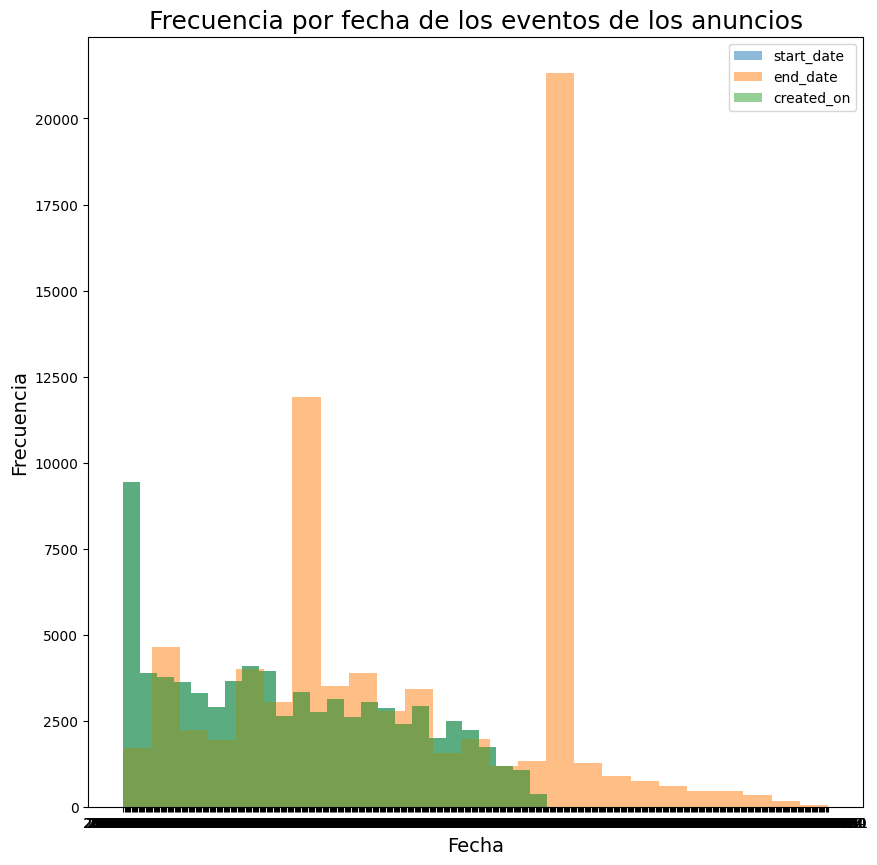

In [15]:
plt.figure(figsize=(10, 10))
plt.hist(ds_train.start_date, bins=25, alpha=0.5, label="start_date")
plt.hist(ds_train.end_date, bins=25, alpha=0.5, label="end_date")
plt.hist(ds_train.created_on, bins=25, alpha=0.5, label="created_on")
plt.xlabel("Fecha", size=14)
plt.ylabel("Frecuencia", size=14)
plt.title("Frecuencia por fecha de los eventos de los anuncios", size=18)
plt.legend(loc='upper right')

**Distribución de barrios**

In [16]:
top25 = ds_train['place_l3'].value_counts().head(25)

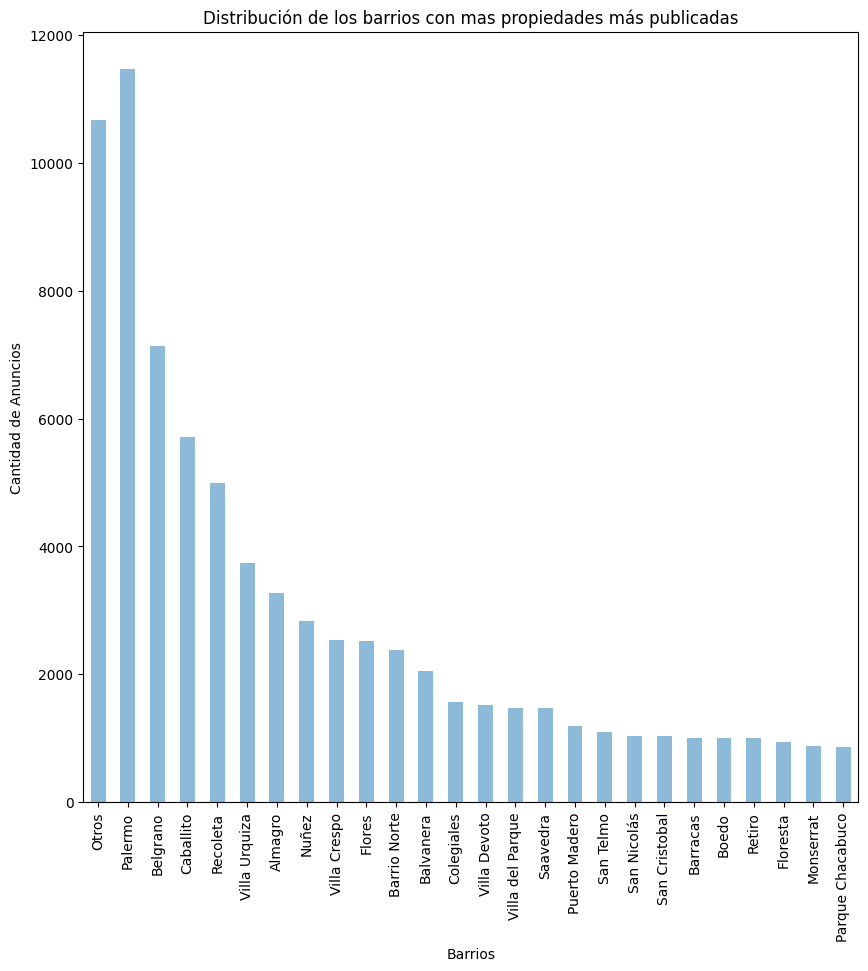

In [17]:
ds_otros_barrios = ds_train[~ds_train['place_l3'].isin(
    top25.index)]  # tomamos solo con las observaciones que no pertenecen al top 25 de barrios
frecuencia_otras = ds_otros_barrios.shape[0]
otras = pd.Series(data=[frecuencia_otras], index=["Otros"])
distribucion_por_barrios = pd.concat([otras, top25])

ax = distribucion_por_barrios.plot.bar(alpha=0.5,
                                       title="Distribución de los barrios con mas propiedades más publicadas",
                                       xlabel="Barrios", ylabel="Cantidad de Anuncios", figsize=(10, 10))

**Distribución de tipos de propiedad**

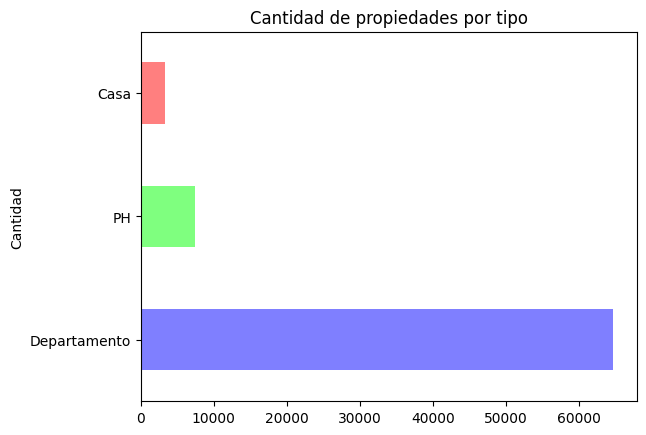

In [18]:
colores = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
grf = ds_train['property_type'].value_counts().plot.barh(alpha=0.5, color=colores,
                                                         title="Cantidad de propiedades por tipo", ylabel="Cantidad")

**Distribución de latitud y longitud**

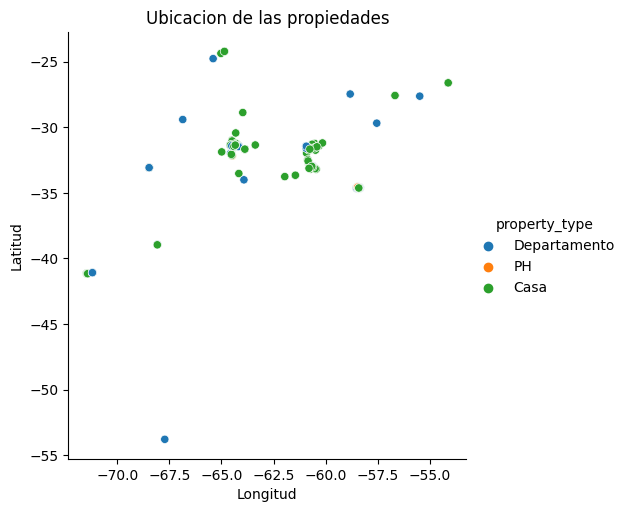

In [19]:

sns.relplot(data=ds_train, x="longitud", y="latitud", hue="property_type").set(title="Ubicacion de las propiedades",
                                                                               xlabel='Longitud', ylabel='Latitud')

**Distribución de habitaciones y baños**

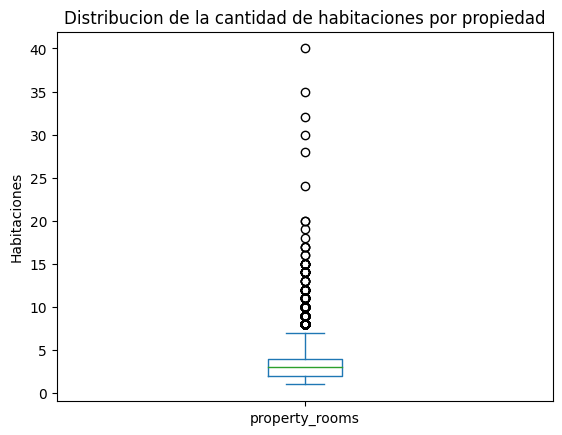

In [20]:
grf = ds_train.property_rooms.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad",
                                       ylabel="Habitaciones")

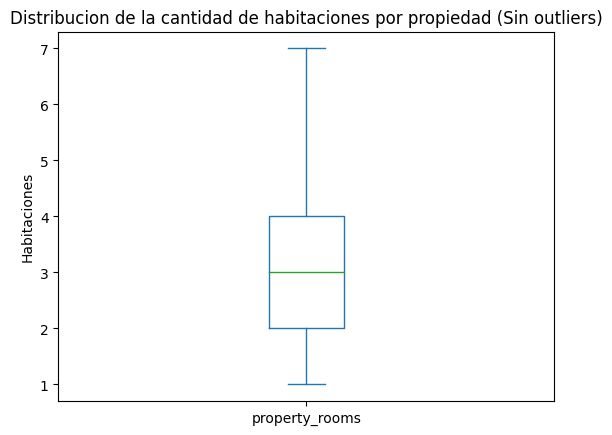

In [21]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_rooms_filtrado = ds_train[ds_train.property_rooms <= max].property_rooms
grf = property_rooms_filtrado.plot.box(title="Distribucion de la cantidad de habitaciones por propiedad (Sin outliers)",
                                       ylabel="Habitaciones")

<AxesSubplot: title={'center': 'Distribucion de la cantidad de baños por propiedad'}, ylabel='Baños'>

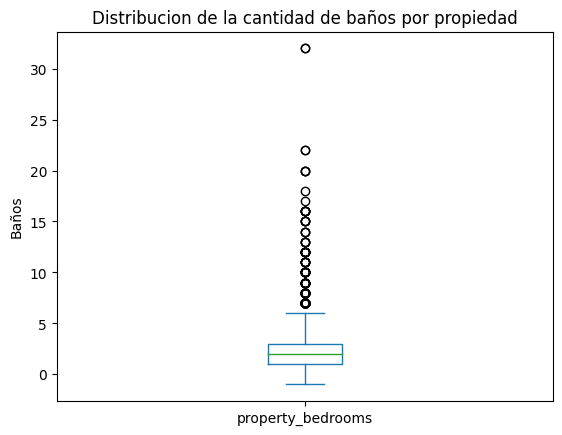

In [22]:
ds_train.property_bedrooms.plot.box(title="Distribucion de la cantidad de baños por propiedad", ylabel="Baños")


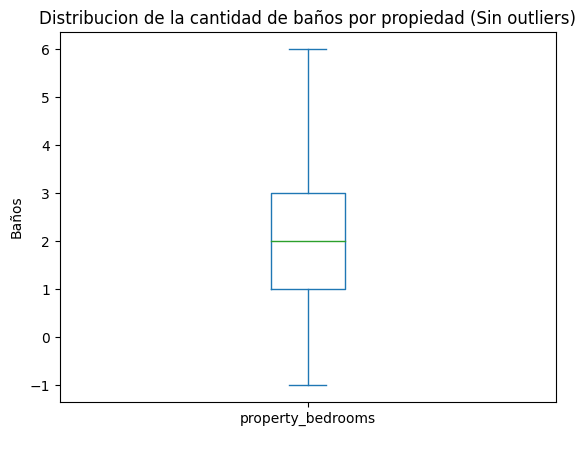

In [23]:
q1 = ds_train.property_rooms.quantile(q=0.25)
q3 = ds_train.property_rooms.quantile(q=0.75)
iqr = q3 - q1
max = q3 + (iqr * 1.5)

property_bedrooms_filtrado = ds_train[ds_train.property_bedrooms < max].property_bedrooms
grf = property_bedrooms_filtrado.plot.box(title="Distribucion de la cantidad de baños por propiedad (Sin outliers)",
                                          xlabel=" ", ylabel="Baños")

**Distribución de precio**

In [24]:
print(f"La mediana del precio es: {ds_train.property_price.median()}")

La mediana del precio es: 143900.0


<AxesSubplot: title={'center': 'Distribucion de los precios de las propiedades'}, xlabel='Rango de precios', ylabel='Frecuencia'>

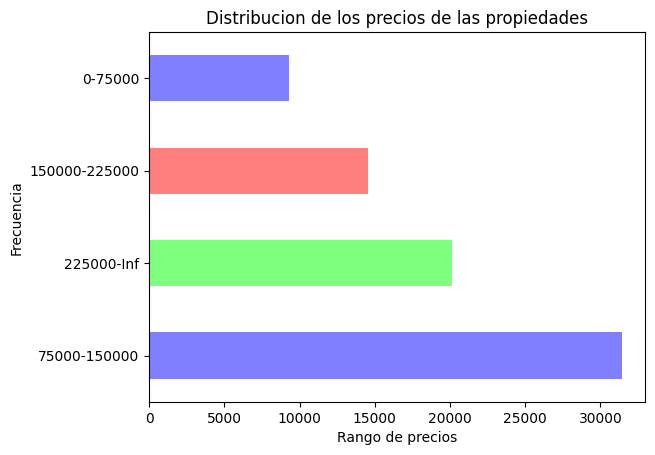

In [25]:
# Tomamos valores alrededor de la mediana
property_price_grouped = pd.cut(ds_train.property_price, bins=[0, 75000, 150000, 225000, float("inf")],
                                labels=["0-75000", "75000-150000", "150000-225000", "225000-Inf"], include_lowest=True)
property_price_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                title="Distribucion de los precios de las propiedades",
                                                xlabel="Rango de precios", ylabel="Frecuencia")

**Distribución de superficie total y cubierta**

<AxesSubplot: >

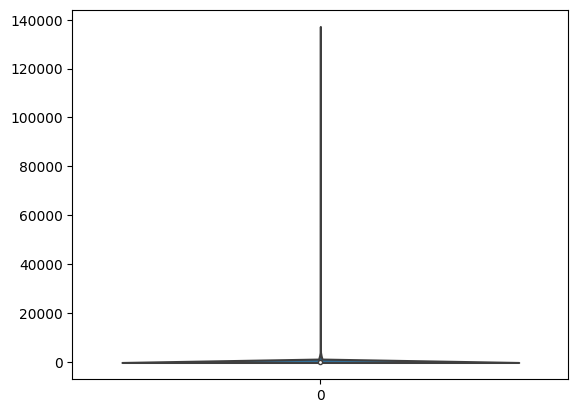

In [26]:
sns.violinplot(ds_train.property_surface_total.values)

<AxesSubplot: >

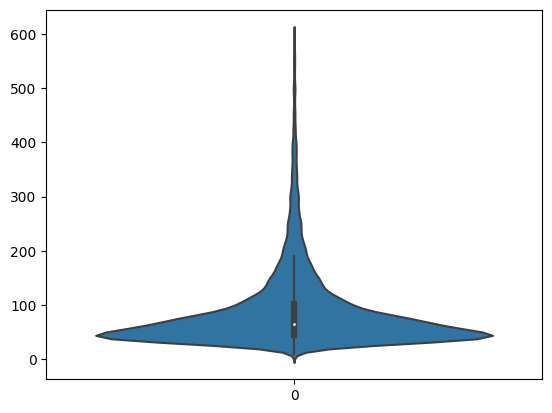

In [27]:
ds_surface_sin_outliers = ds_train[ds_train.property_surface_total < 600]
sns.violinplot(ds_surface_sin_outliers.property_surface_total.values)

<AxesSubplot: >

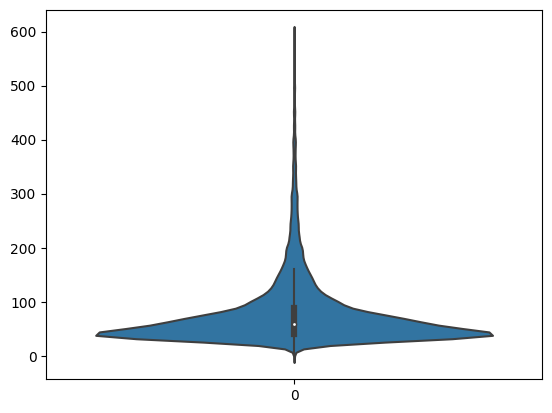

In [28]:
ds_surface_covered_sin_outliers = ds_train[ds_train.property_surface_covered < 600]
sns.violinplot(ds_surface_covered_sin_outliers.property_surface_covered.values)

#### Correlación entre variables

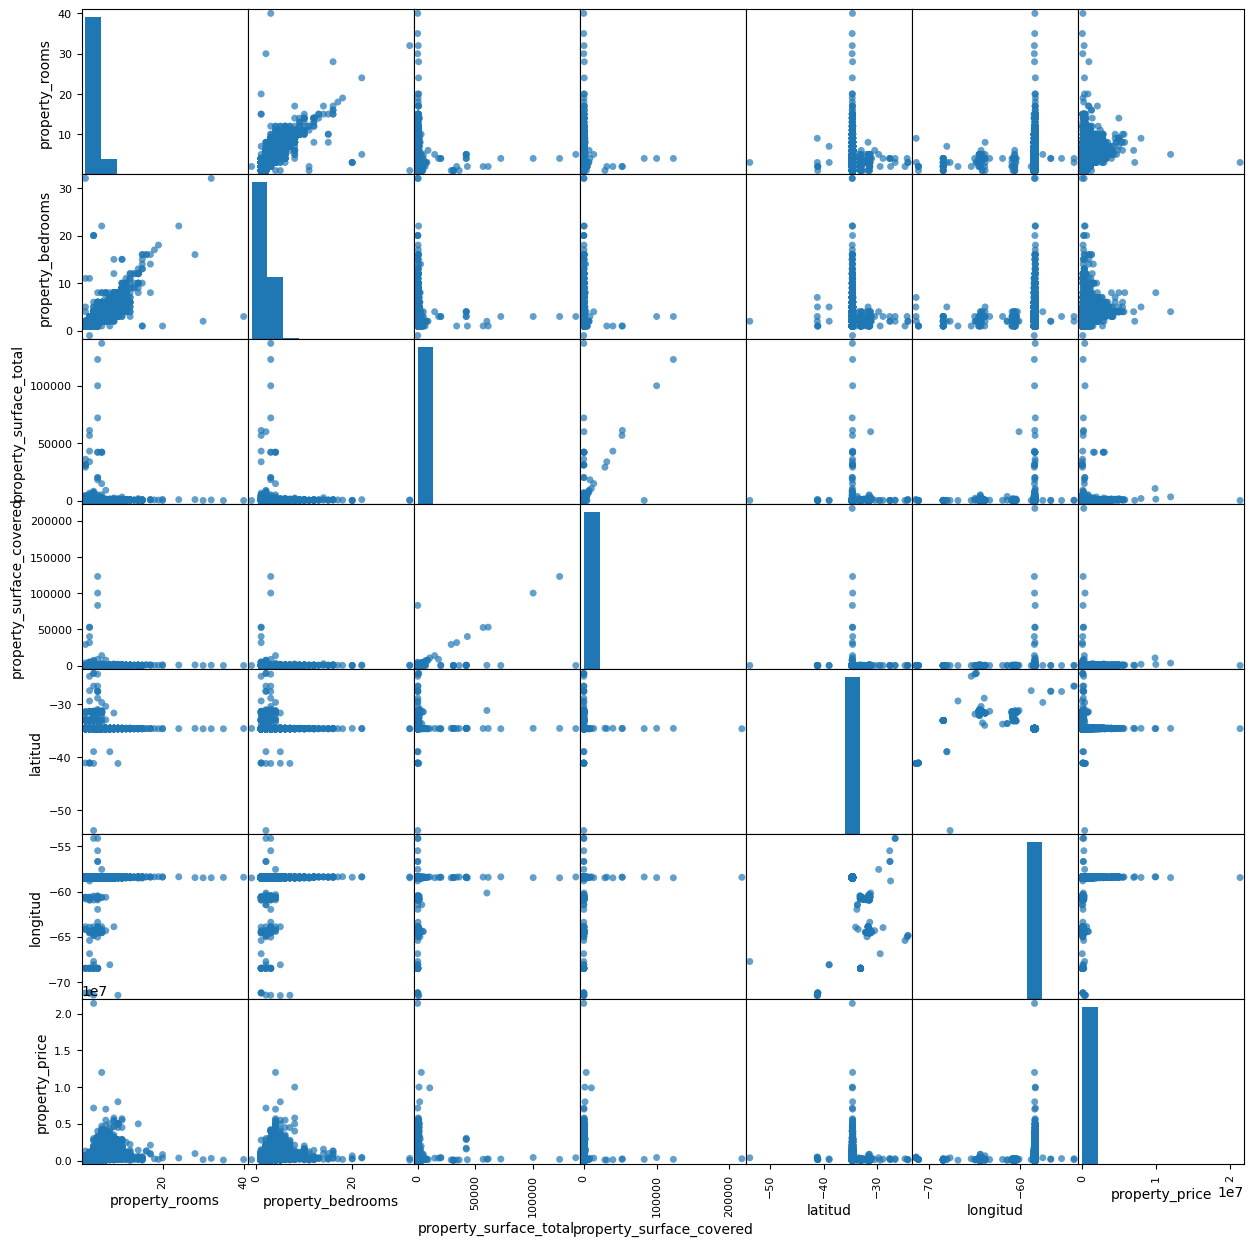

In [29]:
quantitative_dataset = ds_train[cuantitativas_filtradas]
ax = scatter_matrix(quantitative_dataset, alpha=0.7, figsize=(15, 15), s=100)

In [30]:
correlations = quantitative_dataset.corr()
correlations

property_rooms  property_bedrooms  \
property_rooms                  1.000000           0.898870   
property_bedrooms               0.898870           1.000000   
property_surface_total          0.063283           0.062671   
property_surface_covered        0.068798           0.069349   
latitud                         0.003550           0.001047   
longitud                       -0.008044          -0.009113   
property_price                  0.490319           0.441694   

                          property_surface_total  property_surface_covered  \
property_rooms                          0.063283                  0.068798   
property_bedrooms                       0.062671                  0.069349   
property_surface_total                  1.000000                  0.623476   
property_surface_covered                0.623476                  1.000000   
latitud                                 0.027201                  0.001966   
longitud                               -0.016661                 -0.001101   
property_price                          0.077886                  0.051313   

                           latitud  longitud  property_price  
property_rooms            0.003550 -0.008044        0.490319  
property_bedrooms         0.001047 -0.009113        0.441694  
property_surface_total    0.027201 -0.016661        0.077886  
property_surface_covered  0.001966 -0.001101        0.051313  
latitud                   1.000000 -0.218534        0.013300  
longitud                 -0.218534  1.000000        0.023069  
property_price            0.013300  0.023069        1.000000

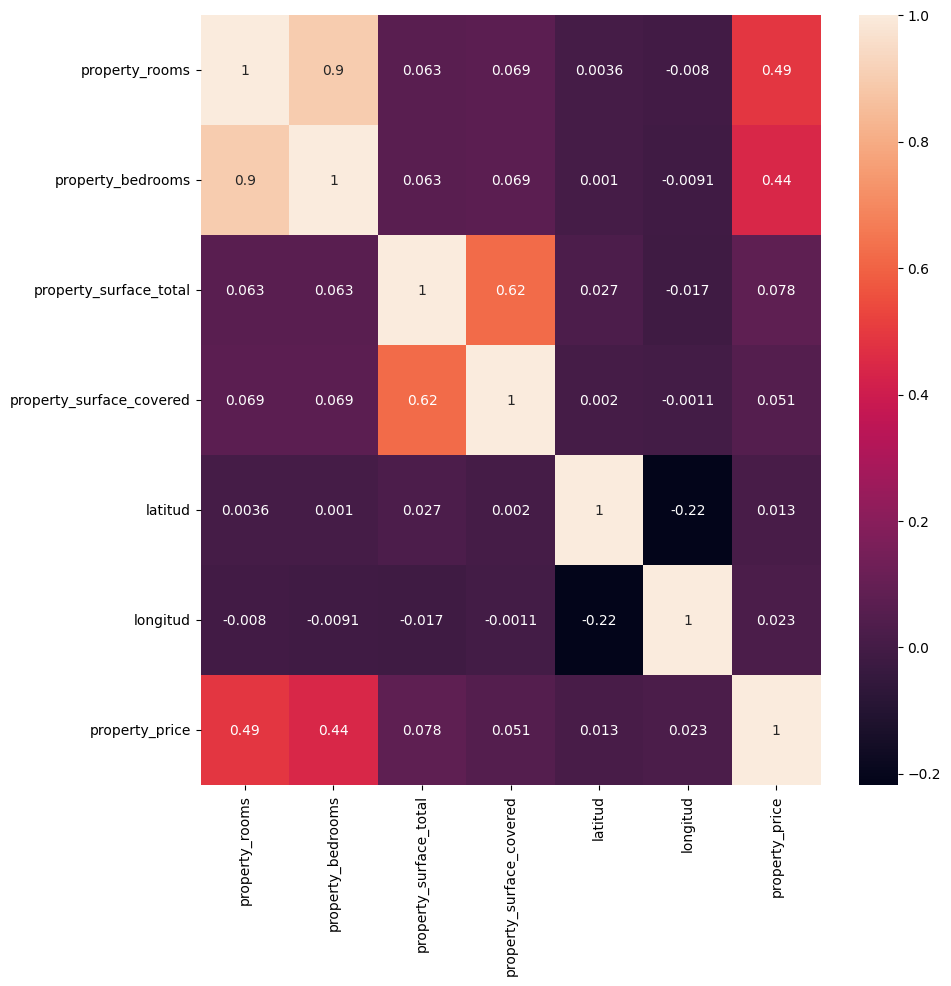

In [31]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(quantitative_dataset.corr(), annot=True)

In [32]:
posible_correlations = [('property_rooms', 'property_bedrooms'), ('property_price', 'property_bedrooms'),
                        ('property_price', 'property_rooms'), ('property_surface_total', 'property_surface_covered'),
                        ('longitud', 'latitud')]
for corr in posible_correlations:
    print(f"Entre {corr[0]} y {corr[1]}:{round(correlations.loc[corr[0], corr[1]], 2)}")

Entre property_rooms y property_bedrooms:0.9
Entre property_price y property_bedrooms:0.44
Entre property_price y property_rooms:0.49
Entre property_surface_total y property_surface_covered:0.62
Entre longitud y latitud:-0.22


### Análisis de valores faltantes

#### Porcentaje de valores faltantes por columna

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.917824
longitud                      3.917824
place_l2                      0.000000
place_l3                      0.441650
place_l4                     96.119312
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.115399
property_bedrooms            11.642064
property_surface_total        5.124736
property_surface_covered      3.562381
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


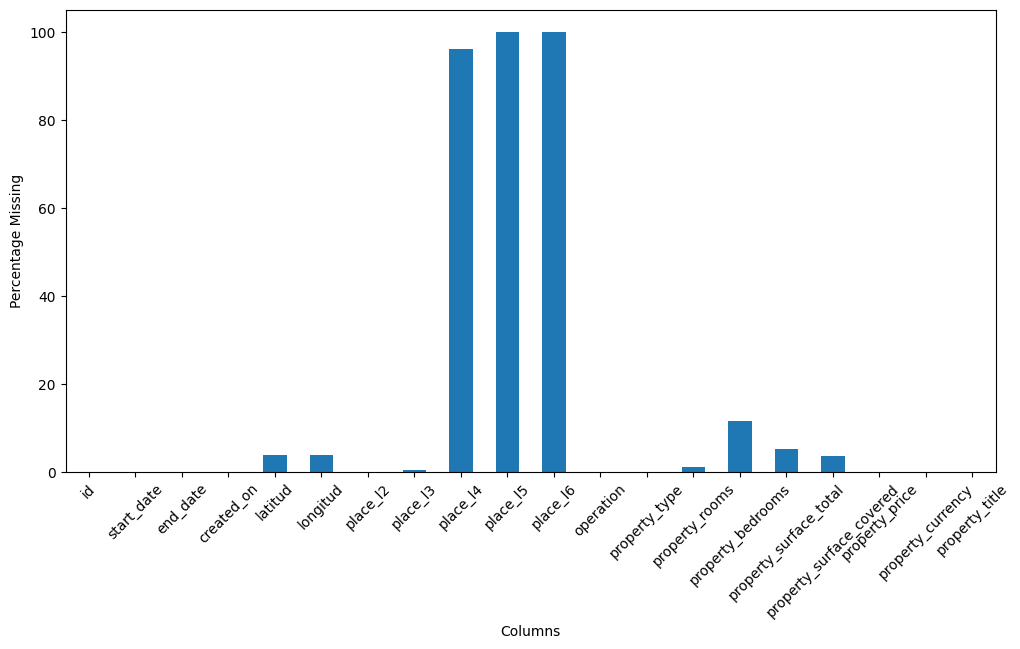

In [33]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

#### Porcentaje de datos faltantes por fila

<AxesSubplot: >

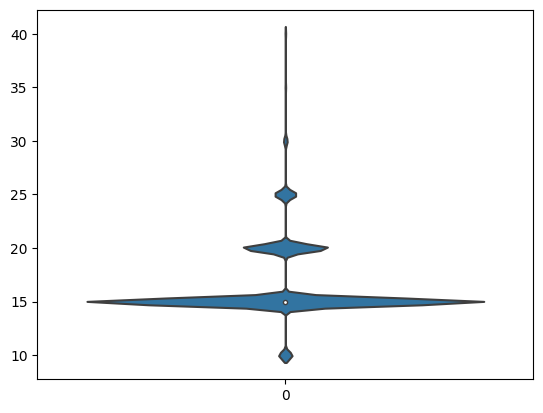

In [34]:
column_count = ds_train.shape[1]
ds_plot = ds_train.T.isna().sum() * 100 / column_count

plt.axvline(ds_plot.mean())
sns.violinplot(ds_plot.values)

In [35]:
def plot_missing_by_column(dataset):
    percent_missing = dataset.isna().sum() * 100 / len(dataset)
    plt.figure(figsize=(12, 6))
    percent_missing.plot.bar(x='index', rot=45)
    plt.xlabel("Columns")
    plt.ylabel("Percentage Missing")
    rows = dataset.shape[0]
    print(dataset.isna().sum() / rows * 100)

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.917824
longitud                      3.917824
place_l2                      0.000000
place_l3                      0.441650
place_l4                     96.119312
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.115399
property_bedrooms            11.642064
property_surface_total        5.124736
property_surface_covered      3.562381
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64


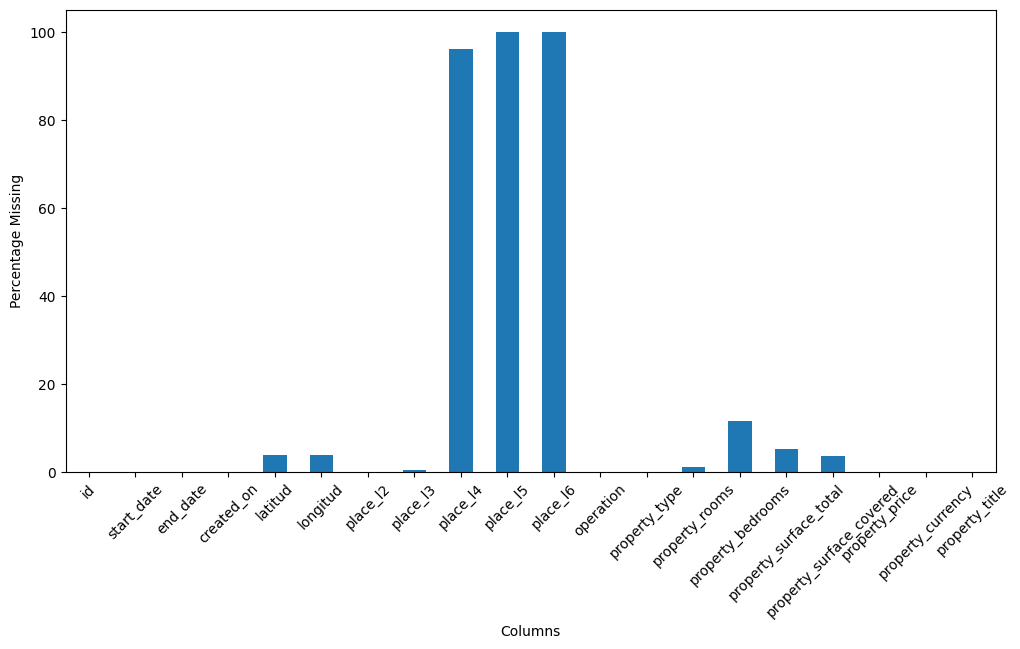

In [36]:
plot_missing_by_column(ds_train)

In [37]:
## Train

ds_train = ds_train.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'], axis=1)

## Test
ds_test = ds_test.drop(['created_on', 'place_l2', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_currency'], axis=1)

### Reparacion de datos faltantes

**Pre Imputacion de latitud y longitud**

latitud    3.917824
dtype: float64


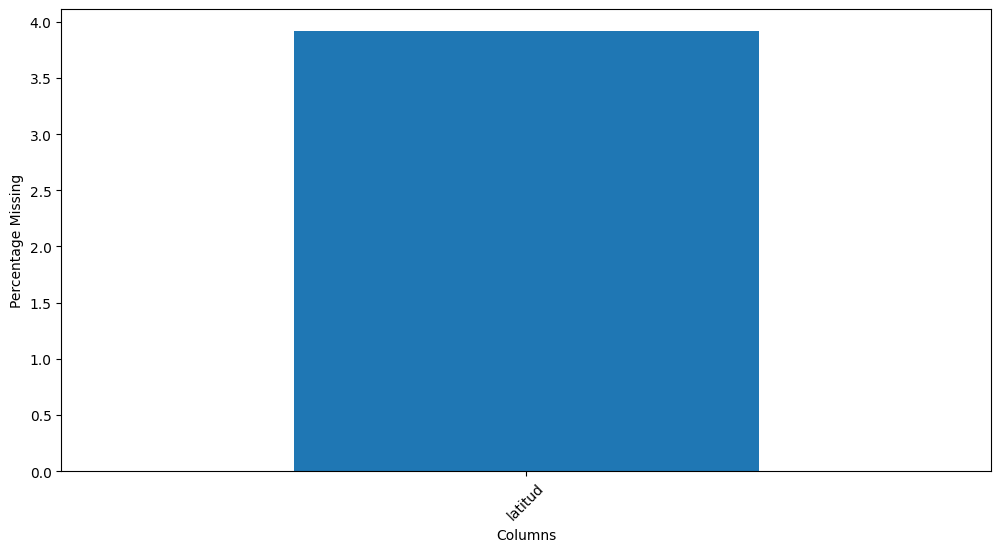

In [38]:
plot_missing_by_column(ds_train[['latitud']])

longitud    3.917824
dtype: float64


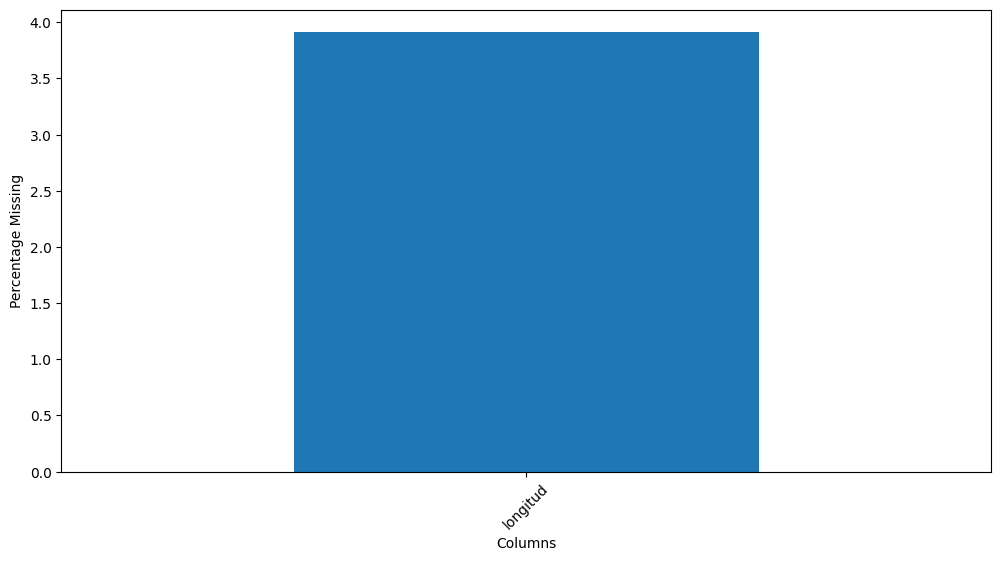

In [39]:
plot_missing_by_column(ds_train[['longitud']])

In [40]:
ds_train[(ds_train.latitud.isna()) & (~ds_train.longitud.isna())]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [41]:
ds_train[(~ds_train.latitud.isna()) & (ds_train.longitud.isna())]


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [42]:
# Train
percentage_train = ds_train[ds_train.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_train[ds_train.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para train representan el {round(percentage_train, 3)}%")

# Test
percentage_test = ds_test[ds_test.latitud.isna()]['place_l3'].isna().sum() / len(
    ds_test[ds_test.latitud.isna()]['place_l3']) * 100
print(f"Los datos faltantes en la columna place_l3 para test representan el {round(percentage_test, 3)}%")

Los datos faltantes en la columna place_l3 para train representan el 4.604%
Los datos faltantes en la columna place_l3 para test representan el 4.381%


In [43]:
# Train
for barrio in ds_train.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.latitud.isna()), ['latitud']] = latitud_media
    ds_train.loc[(ds_train.place_l3 == barrio) & (ds_train.longitud.isna()), ['longitud']] = longitud_media

# Test
for barrio in ds_test.place_l3.unique().tolist():
    latitud_media = ds_train[ds_train.place_l3 == barrio].latitud.mean()
    longitud_media = ds_train[ds_train.place_l3 == barrio].longitud.mean()

    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.latitud.isna()), ['latitud']] = latitud_media
    ds_test.loc[(ds_test.place_l3 == barrio) & (ds_test.longitud.isna()), ['longitud']] = longitud_media

In [44]:
ds_train[ds_train.latitud.isna()]

id  start_date    end_date  latitud  longitud  \
286971  Ofh+oK3y43KJLYsPg0uj4w==  2021-06-16  2021-11-04      NaN       NaN   
364007  49YfRYIx481tyM+DHtFlRQ==  2021-04-10  2021-04-14      NaN       NaN   
435772  ohO8N8/AFg1axmBbwwGkuw==  2021-08-25  2021-10-10      NaN       NaN   
441481  HaLzJ47x5J7a+LN0if6Jug==  2021-05-07  2022-03-29      NaN       NaN   
162837  09+nehdvZvlaKhgBidUgSw==  2021-11-28  2022-01-27      NaN       NaN   
...                          ...         ...         ...      ...       ...   
146411  MbCY2JnbC/KUc446DZLA6w==  2021-08-19  2021-08-27      NaN       NaN   
458696  UxrImoZVU0nEah53uM/NSg==  2021-01-05  2021-03-01      NaN       NaN   
119233  RXiEnxNZYAZm8tEhsv6sxQ==  2021-03-25  2021-11-04      NaN       NaN   
201562  wXF6CbrslY4q4OHdh0q+QQ==  2021-11-15  2022-04-24      NaN       NaN   
389004  CPXCgjqRI/3js9VHc63/ew==  2021-05-05  2021-06-05      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
286971      NaN  Departamento             2.0                NaN   
364007      NaN          Casa             NaN                4.0   
435772      NaN  Departamento             2.0                1.0   
441481      NaN  Departamento             2.0                2.0   
162837      NaN          Casa             NaN                2.0   
...         ...           ...             ...                ...   
146411      NaN          Casa             4.0                3.0   
458696      NaN          Casa             NaN                2.0   
119233      NaN            PH             2.0                NaN   
201562      NaN  Departamento             4.0                3.0   
389004      NaN            PH             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
286971                     NaN                      43.0        110000.0   
364007                     NaN                     167.0        175000.0   
435772                    35.0                      28.0         65000.0   
441481                    36.0                      32.0        110000.0   
162837                   290.0                     200.0        100000.0   
...                        ...                       ...             ...   
146411                   160.0                     140.0        175000.0   
458696                    60.0                      60.0         75000.0   
119233                    70.0                      43.0         75000.0   
201562                   116.0                     105.0        165000.0   
389004                    64.0                      55.0        109000.0   

                                           property_title  
286971  Departamento en Venta Caba / Buenos Aires (B11...  
364007  Venta Casa en Barrio Parque Sakura Zona Exalta...  
435772            Departamento - Centro (Capital Federal)  
441481       DEPARTAMENTO 2 AMBIENTES EN VILLA PUEYRREDON  
162837                            VENTA - Villa Libertad   
...                                                   ...  
146411  Casa en venta Barrio Ecuestre 457 Costa Esmeralda  
458696                       CASA 3 AMBIENTES CON TERRAZA  
119233         PH en Venta CABA / Buenos Aires (B119 394)  
201562  Rodriguez Peña y Corrientes, 3-4 dormitorios, ...  
389004                                  PH - B.Santa Rita  

[136 rows x 13 columns]

In [45]:
ds_test[ds_test.latitud.isna()]

id  start_date    end_date  latitud  longitud  \
445804  BZF7xcpA0wDZYDkuTkn/kA==  2021-01-14  2021-11-04      NaN       NaN   
143134  2t5z2u1Hbn6FHrmZtrLNog==  2021-06-08  2021-11-04      NaN       NaN   
241085  j/qJT+DHmdmfygjem/H1sw==  2021-04-11  2021-04-12      NaN       NaN   
363969  p6PDh9UYBzTc/nWB1Ye2Xw==  2021-04-10  2021-04-13      NaN       NaN   
151726  bdxLUxzjygSn7f0njE0OYQ==  2021-08-05  2021-11-04      NaN       NaN   
318752  kSB4D67fcBa7uQqz5FRKZw==  2021-03-17  2021-06-05      NaN       NaN   
448210  DvLI8uRl2AL9kVavsIxkJQ==  2021-12-16  2022-03-25      NaN       NaN   
348199  9L8mNJdhzxb5vH8bNIKPoQ==  2021-04-16  2021-04-22      NaN       NaN   
144352  sw+PrkXzwMmO2f/FL9fX9w==  2021-07-29  2021-10-30      NaN       NaN   
384799  RbFNzVNNCitS39u7eBRZJg==  2021-02-10  2021-06-08      NaN       NaN   
313804  +pYkycxlnUpcKI6YfV68KQ==  2021-01-06  2021-05-19      NaN       NaN   
220369  lSS8U6TJT9ouSKhaGqyD2A==  2021-06-30  9999-12-31      NaN       NaN   
393092  9EiXFu6SwZ3s0e837avtGQ==  2021-02-13  2021-03-01      NaN       NaN   
309009  lueG6ZNaiqX2qrMCJHFeyg==  2021-09-01  2022-03-09      NaN       NaN   
459199  oYcjmcAXiY+MSWKw0iU28Q==  2021-01-05  2021-03-01      NaN       NaN   
151716  +qSJjZYy7p+mobIddB6WNA==  2021-08-05  2021-11-04      NaN       NaN   
169680  4uu6b2tzOIdwFnsGO1OIzA==  2021-07-28  2021-08-11      NaN       NaN   
308187  UHPrrt0xvMZ+CHRHoq3wFQ==  2021-04-28  2021-08-05      NaN       NaN   
459187  eKBe4k1ocBLyz6ntXQfPiQ==  2021-01-05  2021-03-01      NaN       NaN   
71492   Ur3JttwFZloGubSEDsarDg==  2021-10-18  9999-12-31      NaN       NaN   
44904   FMuIW0cVEZuu00r4iMZGlw==  2021-01-26  2021-11-04      NaN       NaN   
114489  m840XwQvdPOmo1l4HKF73Q==  2021-12-07  2022-01-27      NaN       NaN   
114493  7xfS6WRwwvyB0rgPkEgI1A==  2021-12-07  2022-01-27      NaN       NaN   
384800  5aGy5t5NzOFfGjeiWF0/uw==  2021-02-10  2021-11-04      NaN       NaN   
208079  q5poBFQa4cDEgucDmzEGxA==  2021-02-01  2022-05-13      NaN       NaN   
177602  fGNGYFbRxuKwIidrnXD8EQ==  2021-03-23  2021-04-22      NaN       NaN   
421130  ShOanYvqbyXRLC3X6twa/g==  2021-07-07  2021-10-17      NaN       NaN   
25      CyZu6IaZgmQYGk8jmPajCg==  2021-09-09  2021-09-26      NaN       NaN   
113348  xSgDIxq5cTDtkRJUFK0wsg==  2021-06-09  2021-10-08      NaN       NaN   
286186  4vouwXxdR9jsE/8VHrbQsQ==  2021-06-16  2021-10-26      NaN       NaN   
161698  GhIxeNGs5rOvxRVwOhqxfA==  2021-10-07  2022-03-09      NaN       NaN   
143142  wrCkIm73SkbSvkaT5lI1NQ==  2021-06-08  2021-11-04      NaN       NaN   
443524  oTcZ0R6pAmDTF2PiM3fqJg==  2021-11-09  2022-01-27      NaN       NaN   
25588   7usJZ7GPEzhPIFyuSPrb8Q==  2021-06-24  2022-08-12      NaN       NaN   

       place_l3 property_type  property_rooms  property_bedrooms  \
445804      NaN            PH             4.0                NaN   
143134      NaN  Departamento             1.0                NaN   
241085      NaN          Casa             NaN                2.0   
363969      NaN          Casa             NaN                1.0   
151726      NaN  Departamento             2.0                NaN   
318752      NaN  Departamento             2.0                1.0   
448210      NaN          Casa             6.0                5.0   
348199      NaN          Casa             NaN                4.0   
144352      NaN  Departamento             3.0                2.0   
384799      NaN            PH             3.0                NaN   
313804      NaN          Casa             6.0                NaN   
220369      NaN  Departamento             1.0                1.0   
393092      NaN            PH             2.0                1.0   
309009      NaN          Casa             NaN                6.0   
459199      NaN  Departamento             3.0                2.0   
151716      NaN  Departamento             2.0                NaN   
169680      NaN  Departamento             2.0                NaN   
308187      NaN            PH           

In [46]:
## Train
print(
    f"El porcentaje de valores a eliminar train corresponden a un {round((len(ds_train[ds_train.latitud.isna()]) / len(ds_train)), 4)}%")

## Test
print(
    f"El porcentaje de valores a eliminar en test corresponden a un {round((len(ds_test[ds_test.latitud.isna()]) / len(ds_test)), 4)}%")

El porcentaje de valores a eliminar train corresponden a un 0.0018%
El porcentaje de valores a eliminar en test corresponden a un 0.0018%


In [47]:
## Train

ds_train.drop(ds_train[ds_train.latitud.isna()].index, inplace=True)

## Test
ds_test.drop(ds_test[ds_test.latitud.isna()].index, inplace=True)

**Post Imputacion de latitud y longitud**

latitud    0.0
dtype: float64


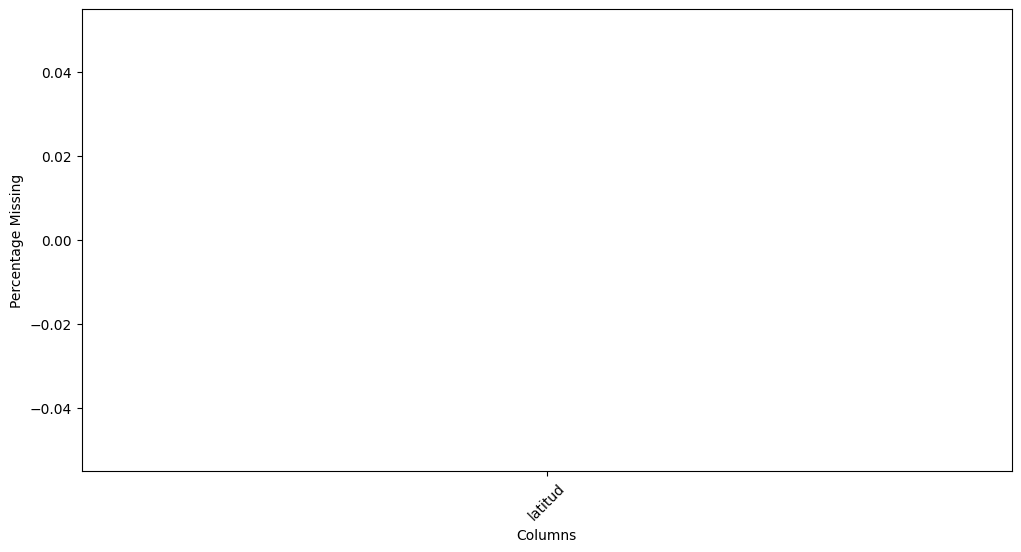

In [48]:
plot_missing_by_column(ds_train[['latitud']])

longitud    0.0
dtype: float64


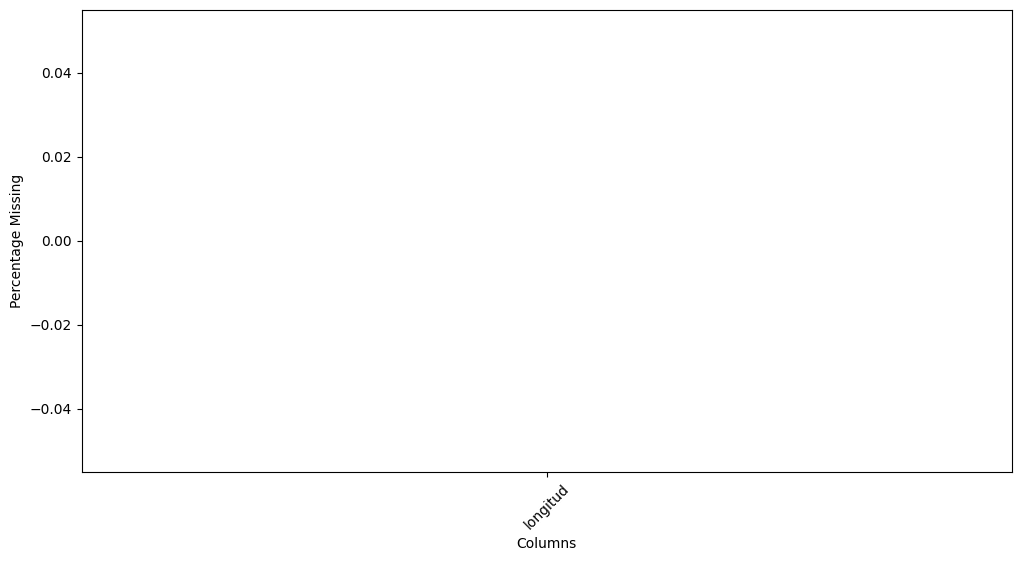

In [49]:
plot_missing_by_column(ds_train[['longitud']])

**Pre imputación de ambientes**

property_rooms    1.085527
dtype: float64


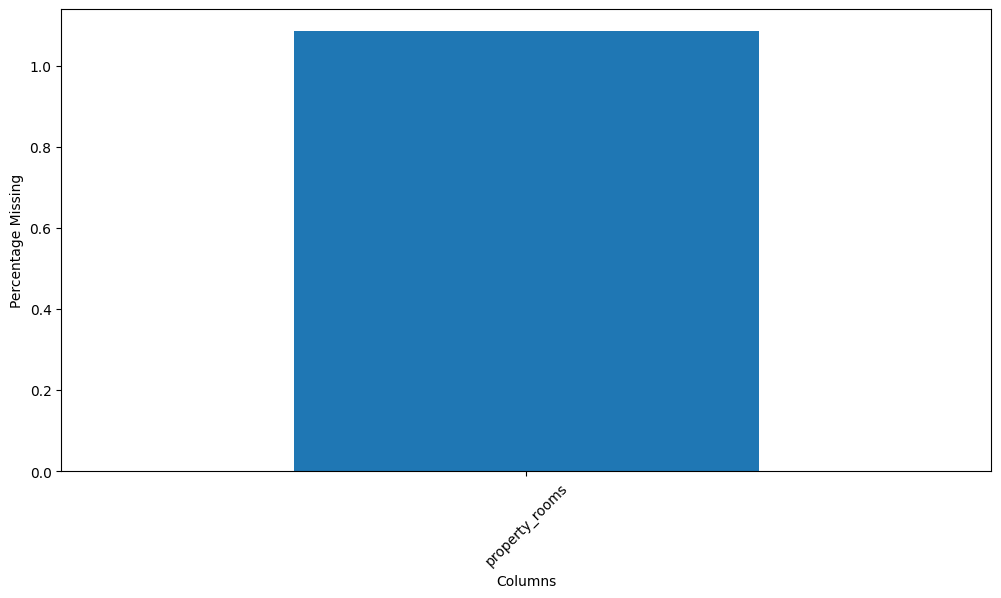

In [50]:
plot_missing_by_column(ds_train[['property_rooms']])

**Reparacion de ambientes faltantes en base al titulo de la propiedad**

In [51]:
def reparacion_amb_por_titulo_prop(ambientes_faltantes, ds):
    print(f"cantidad inicial de ambientes a reparar: {len(ds[ds['property_rooms'].isna()])}")
    regex = re.compile(r"(\d+ \bambientes?\b)")
    regex2 = re.compile(r"(\d+\ \b\bamb\b *)")

    a = {}
    for titulo in ambientes_faltantes.property_title:
        if (len(re.findall(regex, titulo.lower())) > 0):
            a[titulo] = re.findall(regex, titulo.lower())
        if (len(re.findall(regex2, titulo.lower())) > 0):
            a[titulo] = re.findall(regex2, titulo.lower())

    for i in ds.index:
        if ds.loc[i, 'property_title'] in a:
            if len(a[ds.loc[i, 'property_title']]) > 0:
                ds.loc[i, 'property_rooms'] = float("".join(a[ds.loc[i, 'property_title']]).split(" ")[0])
            if ("monoambiente" or "un ambiente" or "mono" or "mono ambiente") in str(
                    ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(1)
            if "dos ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(2)
            if "tres ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(3)
            if "cuatro ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(4)
            if "cinco ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(5)
            if "seis ambientes" in str(ds.loc[i, 'property_title']).lower():
                ds.loc[i, 'property_rooms'] = float(6)

    print(f"cantidad de ambientes faltantes post reparacion: {len(ds[ds['property_rooms'].isna()])}")

In [52]:
datos_a_reparar = ds_train[['property_title', 'property_rooms']].reset_index()

# Train

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_train)

# Test

ambientes_faltantes = datos_a_reparar[datos_a_reparar['property_rooms'].isna()]
reparacion_amb_por_titulo_prop(ambientes_faltantes, ds_test)

cantidad inicial de ambientes a reparar: 817
cantidad de ambientes faltantes post reparacion: 647
cantidad inicial de ambientes a reparar: 197
cantidad de ambientes faltantes post reparacion: 193


**Post Imputacion de ambientes**

property_rooms    0.859652
dtype: float64


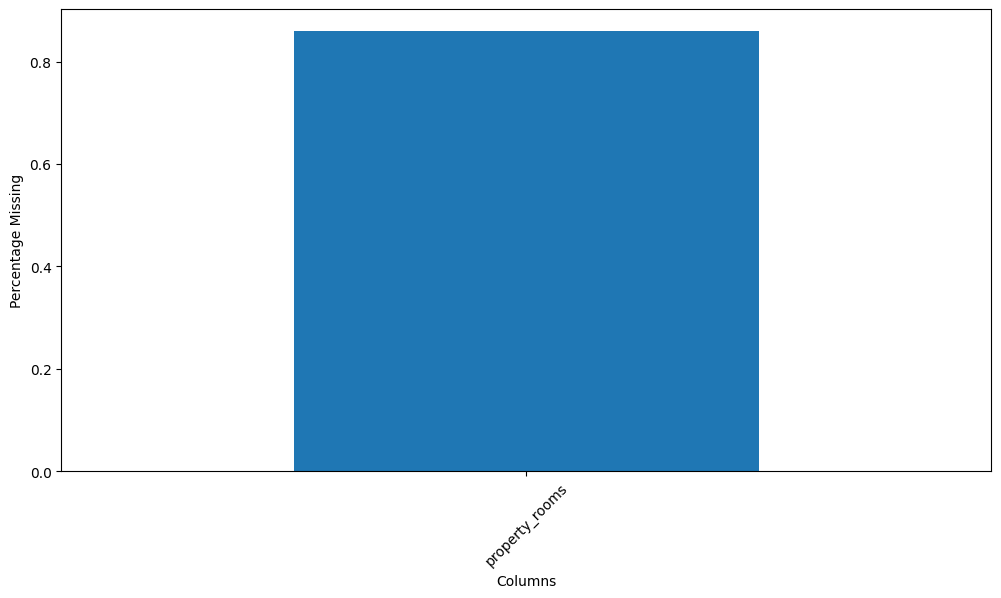

In [53]:
plot_missing_by_column(ds_train[['property_rooms']])

In [54]:
# Train
ds_train.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_train[ds_train.property_rooms.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_rooms'], inplace=True)
ds_test[ds_test.property_rooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

property_rooms    0.0
dtype: float64


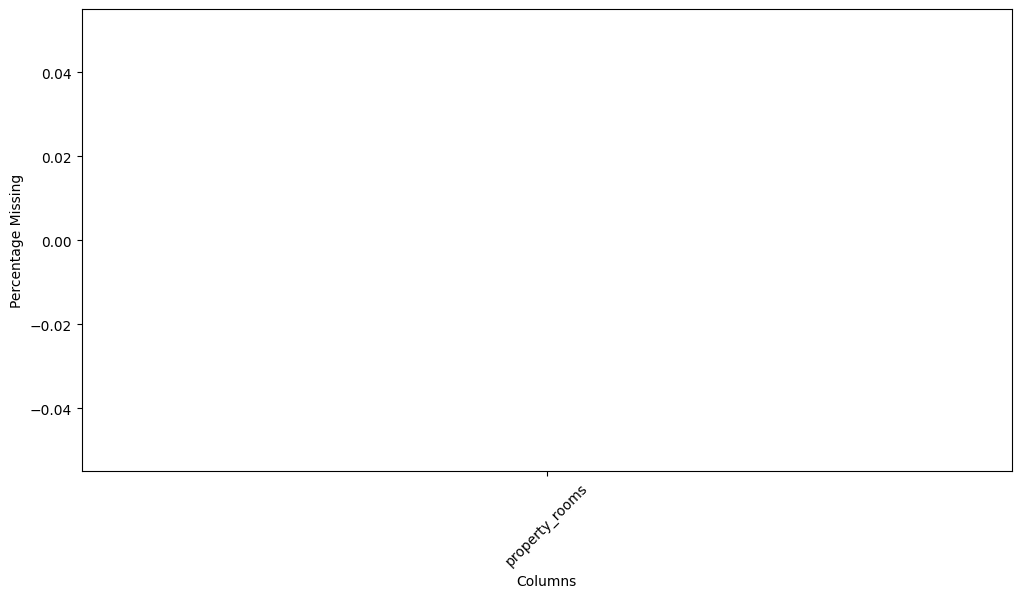

In [55]:
plot_missing_by_column(ds_train[['property_rooms']])

**Pre Imputacion de Habitaciones**

property_bedrooms    11.280422
dtype: float64


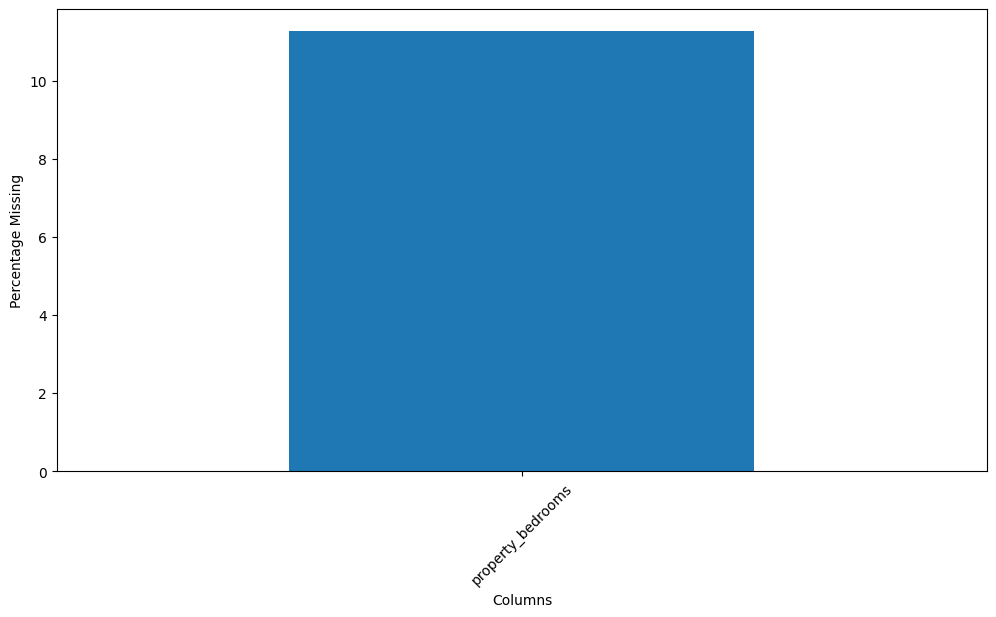

In [56]:
plot_missing_by_column(ds_train[['property_bedrooms']])

**Reparacion de habitaciones faltantes en base a los ambientes**

In [57]:
# Train
print(f"El total de habitaciones en train es: {len(ds_train.property_bedrooms)}")
habitaciones_invalidas = ds_train.loc[(ds_train['property_bedrooms'] > ds_train['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_train.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

# Test
print(f"El total de habitaciones en test es: {len(ds_test.property_bedrooms)}")
habitaciones_invalidas = ds_test.loc[(ds_test['property_bedrooms'] > ds_test['property_rooms'])]
print(
    f"El total de habitaciones invalidas es: {len(habitaciones_invalidas)}. Constituye al {(len(habitaciones_invalidas) * 100) // len(ds_test.property_bedrooms)}% de los datos del ds")
habitaciones_invalidas

El total de habitaciones en train es: 74616
El total de habitaciones invalidas es: 136. Constituye al 0% de los datos del ds
El total de habitaciones en test es: 18623
El total de habitaciones invalidas es: 26. Constituye al 0% de los datos del ds


id  start_date    end_date    latitud  \
115166  +m3+nsAwQ9Us0fjB6pJ8Mg==  2021-12-07  2022-01-27 -34.620586   
115472  8GnXLYvT917uZZQOseeXXw==  2021-12-07  2022-01-27 -34.613037   
27849   indoHQClfn3r0gDuKdqgLQ==  2021-12-03  2022-01-27 -34.592121   
399005  lkk1V15Ag7c2sD0LBrH1/g==  2021-02-13  2022-02-09 -34.611567   
451218  7krE2YAxkwyebVtlLkuFcA==  2021-12-16  2022-01-27 -34.557917   
48279   r3sXlEIiCgBG5TtUkN93mw==  2021-03-14  2021-06-05 -34.608645   
170460  hDvT3AtasnPkHjzJKm4NSA==  2021-07-28  2021-08-26 -34.621530   
126403  ETzg09MPRQDliI9p8PzeBg==  2021-10-05  2022-02-22 -34.564988   
422322  +vPPcdUiRAfJw/r3pJhEDQ==  2021-07-07  9999-12-31 -34.629807   
236624  wNjDuMJwjrMgsHHpZdNidA==  2021-01-20  2021-02-18 -34.626670   
340427  uP+f4jupr3E/oT2T1TNTkg==  2021-09-28  2022-02-09 -34.621660   
127231  wn7j0YSM4rEE0Tfl6S2lIQ==  2021-10-05  2022-02-09 -34.618449   
306146  TomuEJJHnscu02wJs8c9VA==  2021-03-04  2021-03-10 -34.581854   
428097  5Q58aJJXojGC5f6ryqbJjw==  2021-12-16  2022-02-09 -34.595668   
337149  cMA0xBBQnANFa/wNTQtZcw==  2021-04-13  2021-06-05 -34.607409   
214585  C6Qi5kPtL8N7sKt0h7Qu7g==  2021-12-27  9999-12-31 -34.601229   
325449  LZhr2owtQ83MiDi55T7vfA==  2021-08-27  2022-03-29 -34.598801   
115505  7t2vq6m6pNwJXleT2SaFSg==  2021-12-07  2022-01-27 -34.623793   
387679  DkUF65vVg64ocWpyJ+3FIg==  2021-03-30  2021-04-15 -34.650156   
115482  +/GRR4rodHJolrb0SSNIqQ==  2021-12-07  2022-01-27 -34.613261   
116648  rc5FbdGZKitxmRAK7ssCJA==  2021-08-18  2021-08-19 -34.647511   
94998   4TbEkLoqy/0c3zakd66/FQ==  2021-09-24  2022-01-27 -34.646632   
115480  mR0CScRgrmuvUAKSFjWQHA==  2021-12-07  2022-01-27 -34.613261   
115503  xOKrM65pqQHhVKJAvrKJjA==  2021-12-07  2022-01-27 -34.613261   
170461  6sUvmT1xmcR4/jzWUl7Kfw==  2021-07-28  2021-08-26 -34.612712   
86014   pVG9sES9De/1eQ+tB90NjQ==  2021-03-26  2021-06-05 -34.591110   

         longitud           place_l3 property_type  property_rooms  \
115166 -58.439740          Caballito            PH             2.0   
115472 -58.360984      Puerto Madero  Departamento             3.0   
27849  -58.401069           Recoleta  Departamento             2.0   
399005 -58.374021          Monserrat  Departamento             1.0   
451218 -58.459907           Belgrano  Departamento             1.0   
48279  -58.485619   Villa del Parque  Departamento             4.0   
170460 -58.361752      Puerto Madero  Departamento             3.0   
126403 -58.444710           Belgrano  Departamento             5.0   
422322 -58.484938           Floresta  Departamento             3.0   
236624 -58.439150          Caballito          Casa             5.0   
340427 -58.381734       Constitución            PH             4.0   
127231 -58.505422       Monte Castro  Departamento             1.0   
306146 -58.424645            Palermo  Departamento             3.0   
428097 -58.389490           Recoleta  Departamento             4.0   
337149 -58.421965            Almagro  Departamento             3.0   
214585 -58.435750       Villa Crespo  Departamento             3.0   
325449 -58.436084       Villa Crespo          Casa             5.0   
115505 -58.402256      San Cristobal  Departamento             1.0   
387679 -58.473353  Parque Avellaneda          Casa             5.0   
115482 -58.361513      Puerto Madero  Departamento             3.0   
116648 -58.505233          Mataderos            PH             3.0   
94998  -58.497902         Villa Luro  Departamento             3.0   
115480 -58.361513      Puerto Madero  Departamento             3.0   
115503 -58.361513      Puerto Madero  Departamento             3.0   
170461 -58.362700      Puerto Madero  Departamento             4.0   
86014  -58.400685           Recoleta  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
115166                3.0                   140.0                     140.0   
115472                4.0                   170.0              

In [58]:
# Train
habitaciones_con_amb_menos_1_train = ds_train[ds_train.property_rooms == (ds_train.property_bedrooms + 1)]
print(
    f"Las habitaciones que son Ambientes - 1 en train son: {len(habitaciones_con_amb_menos_1_train)}. Constituyen al {(len(habitaciones_con_amb_menos_1_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test
habitaciones_con_amb_menos_1_test = ds_test[ds_test.property_rooms == (ds_test.property_bedrooms + 1)]
print(f"Las habitaciones que son Ambientes - 1 en test son: {len(habitaciones_con_amb_menos_1_test)}. Constituyen al {(len(habitaciones_con_amb_menos_1_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Las habitaciones que son Ambientes - 1 en train son: 55773. Constituyen al 74% de los datos
Las habitaciones que son Ambientes - 1 en test son: 13915. Constituyen al 74% de los datos


In [59]:
print(f"Valor inicial de habitaciones faltantes en el ds de train: {ds_train.property_bedrooms.isna().sum()}")
print(f"Valor inicial de habitaciones faltantes en el ds de test: {ds_test.property_bedrooms.isna().sum()}")

Valor inicial de habitaciones faltantes en el ds de train: 8417
Valor inicial de habitaciones faltantes en el ds de test: 2108


In [60]:
habitaciones_faltantes = ds_train[ds_train.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_train.loc[i, 'property_rooms'] == 1:
        ds_train.loc[i, 'property_bedrooms'] = 1
    else:
        ds_train.loc[i, 'property_bedrooms'] = ds_train.loc[i, 'property_rooms'] - 1
ds_train[ds_train.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

In [61]:
habitaciones_faltantes = ds_test[ds_test.property_bedrooms.isna()]
for i in habitaciones_faltantes.index:
    if ds_test.loc[i, 'property_rooms'] == 1:
        ds_test.loc[i, 'property_bedrooms'] = 1
    else:
        ds_test.loc[i, 'property_bedrooms'] = ds_test.loc[i, 'property_rooms'] - 1
ds_test[ds_test.property_bedrooms.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

**Post Imputacion de habitaciones**

property_bedrooms    0.0
dtype: float64


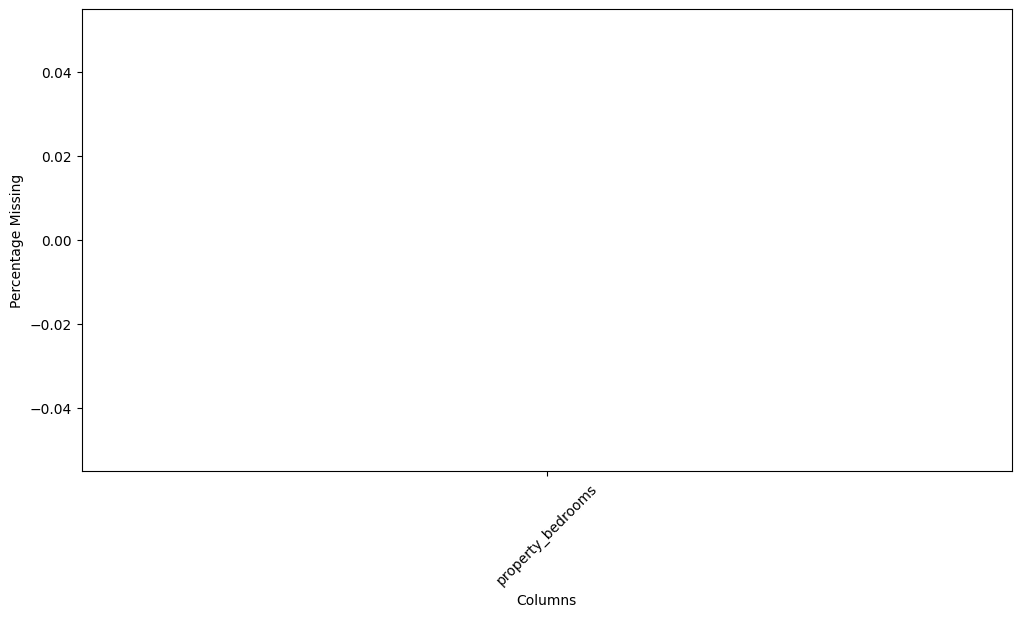

In [62]:
plot_missing_by_column(ds_train[['property_bedrooms']])

**Pre Imputación de Superficie total**

property_surface_total    4.906454
dtype: float64


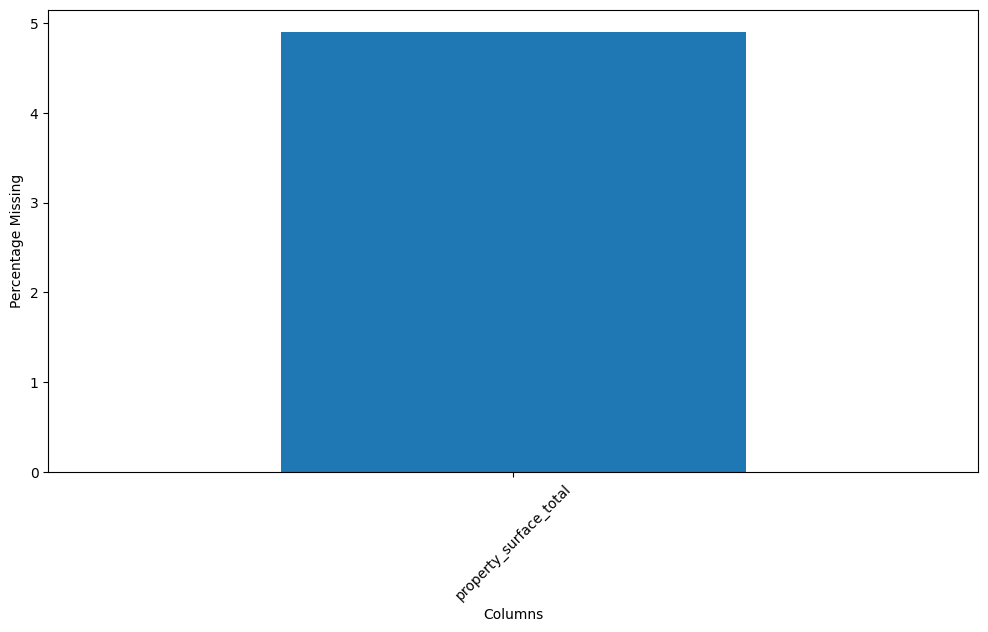

In [63]:
plot_missing_by_column(ds_train[['property_surface_total']])

In [64]:
ds_train[ds_train.property_surface_total.isna()][ds_train.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

**Reparación de datos faltantes en superficie cubierta**

In [65]:
# Train
ds_train.loc[ds_train.property_surface_total.isna(), 'property_surface_total'] = ds_train.loc[
    ds_train.property_surface_total.isna(), 'property_surface_covered']
len(ds_train.loc[ds_train.property_surface_total.isna()])

# Test
ds_test.loc[ds_test.property_surface_total.isna(), 'property_surface_total'] = ds_test.loc[
    ds_test.property_surface_total.isna(), 'property_surface_covered']
len(ds_test.loc[ds_test.property_surface_total.isna()])

0

**Post Imputación de Superficie total**

property_surface_total    0.0
dtype: float64


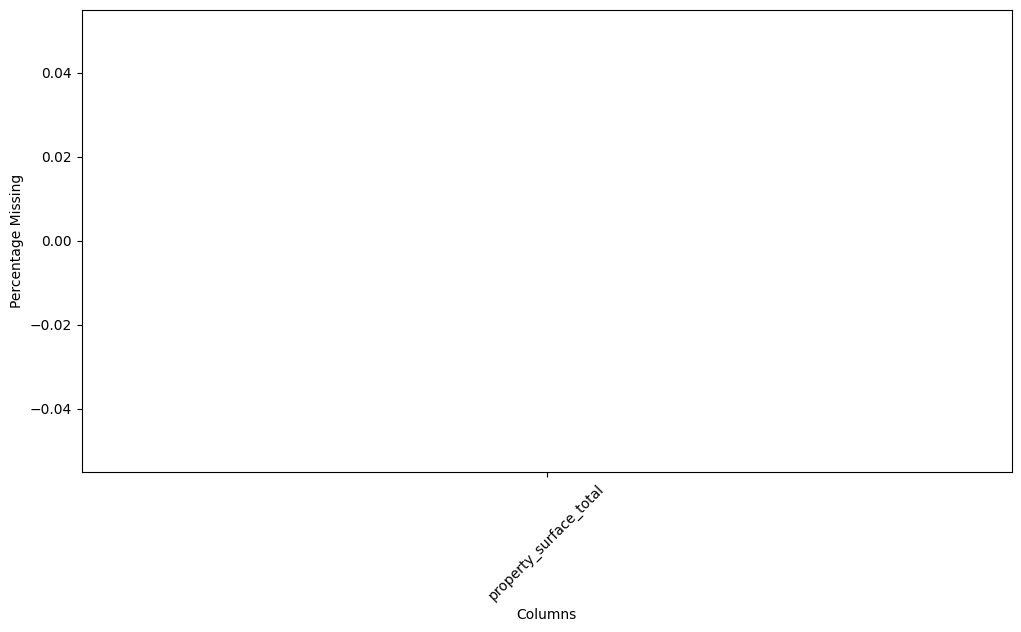

In [66]:
plot_missing_by_column(ds_train[['property_surface_total']])

**Pre Imputación de superficie cubierta**

In [67]:
ds_train[ds_train.property_surface_covered.isna()]

id  start_date    end_date    latitud  \
80644   RcLE3/5XcuIlazOnKnD7Ug==  2021-08-17  2022-09-15 -34.659147   
317957  lG+BZ5ASTZ71W+B4qdzGlg==  2021-02-28  2021-06-05 -34.591182   
104005  LrSKRk102G4UEizwSUKH/g==  2021-05-28  2021-06-05 -34.604359   
280293  Zt/Gr3K9UF3kED3Ux8Kbtw==  2021-07-12  9999-12-31 -34.599421   
218423  Hp2AIatzD2qUf+Avozyp3g==  2021-11-30  2021-12-12 -34.566750   
...                          ...         ...         ...        ...   
412447  7+mSkNapd2eulOhEGz5Gbg==  2021-09-18  2022-03-09 -34.626321   
153395  TNRRRjiav7OMT6ruvd3EqQ==  2021-12-09  2022-01-19 -34.621333   
5153    /nvdtWsjafAOhcb7rQrXKw==  2021-09-20  2022-01-28 -34.603261   
420811  INndJYlQ3+Mgba2dajOABQ==  2021-12-01  2022-01-27 -34.574255   
239902  jYzfp5d9hTbqiAni9WgGnA==  2021-05-21  2021-05-26 -34.604060   

         longitud      place_l3 property_type  property_rooms  \
80644  -58.491698     Mataderos  Departamento             1.0   
317957 -58.378620        Retiro  Departamento             5.0   
104005 -58.389999   San Nicolás  Departamento             1.0   
280293 -58.386867  Barrio Norte  Departamento             5.0   
218423 -58.435925       Palermo  Departamento             5.0   
...           ...           ...           ...             ...   
412447 -58.439016     Caballito  Departamento             4.0   
153395 -58.434743     Caballito  Departamento             2.0   
5153   -58.383002   San Nicolás  Departamento             1.0   
420811 -58.460924    Colegiales  Departamento             2.0   
239902 -58.414811       Almagro  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
80644                 1.0                    27.0                       NaN   
317957                4.0                   260.0                       NaN   
104005                1.0                    23.0                       NaN   
280293                3.0                   137.0                       NaN   
218423                4.0                   184.0                       NaN   
...                   ...                     ...                       ...   
412447                3.0                   232.0                       NaN   
153395                1.0                    25.0                       NaN   
5153                  1.0                    22.0                       NaN   
420811                1.0                    55.0                       NaN   
239902                2.0                   127.0                       NaN   

        property_price                                     property_title  
80644          55000.0                           Departamento - Mataderos  
317957        800000.0  Departamento - Retiro 5 ambientes amenities co...  
104005         59000.0                         Departamento - San Nicolas  
280293        390000.0                        Departamento - Barrio Norte  
218423        448000.0  Excelente departamento de 4 dormitorios   Play...  
...                ...                                                ...  
412447        750000.0        Piso Premium  a estrenar sobre Pedro Goyena  
153395         56000.0      HERMOSO 2 AMB EN PARQUE RIVADAVIA (CABALLITO)  
5153           43000.0                         Departamento - San Nicolas  
420811        122000.0                          Departamento - Colegiales  
239902        198000.0  Almagro Av Corrientes 3500 3 amplios amb con b...  

[2611 rows x 13 columns]

property_surface_covered    3.499249
dtype: float64


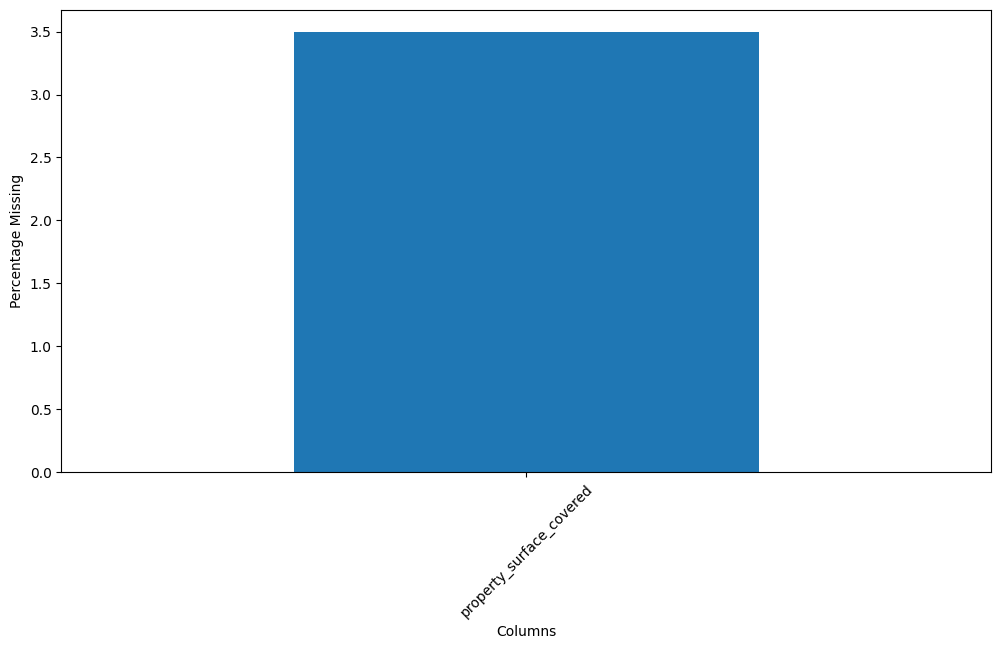

In [68]:
plot_missing_by_column(ds_train[['property_surface_covered']])

**Reparación de datos faltantes en Superficie cubierta**

In [69]:
ds_train[ds_train.property_surface_covered.isna()].property_type.value_counts()

Departamento    2346
PH               184
Casa              81
Name: property_type, dtype: int64

In [70]:
# Test
ds_test.loc[(ds_test.property_surface_covered.isna()) & (
        ds_test.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_test.loc[(ds_test.property_surface_covered.isna()) & (ds_test.property_type == 'Departamento')])

# Train
ds_train.loc[(ds_train.property_surface_covered.isna()) & (
        ds_train.property_type == 'Departamento'), 'property_surface_covered'] = ds_train.loc[
    (ds_train.property_surface_covered.isna()) & (
            ds_train.property_type == 'Departamento'), 'property_surface_total']

len(ds_train.loc[(ds_train.property_surface_covered.isna()) & (ds_train.property_type == 'Departamento')])

0

In [71]:
print(f"Registros Train: {ds_train.property_surface_covered.isna().sum()}")

Registros Train: 265


In [72]:
print(f"Registros Test: {ds_test.property_surface_covered.isna().sum()}")

Registros Test: 654


In [73]:
# Train
ds_train.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_train[ds_train.property_surface_covered.isna()]

# Test
ds_test.dropna(axis='index', subset=['property_surface_covered'], inplace=True)
ds_test[ds_test.property_surface_covered.isna()]

Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []

id                          0.000000
start_date                  0.000000
end_date                    0.000000
latitud                     0.000000
longitud                    0.000000
place_l3                    0.207126
property_type               0.000000
property_rooms              0.000000
property_bedrooms           0.000000
property_surface_total      0.000000
property_surface_covered    0.000000
property_price              0.000000
property_title              0.000000
dtype: float64


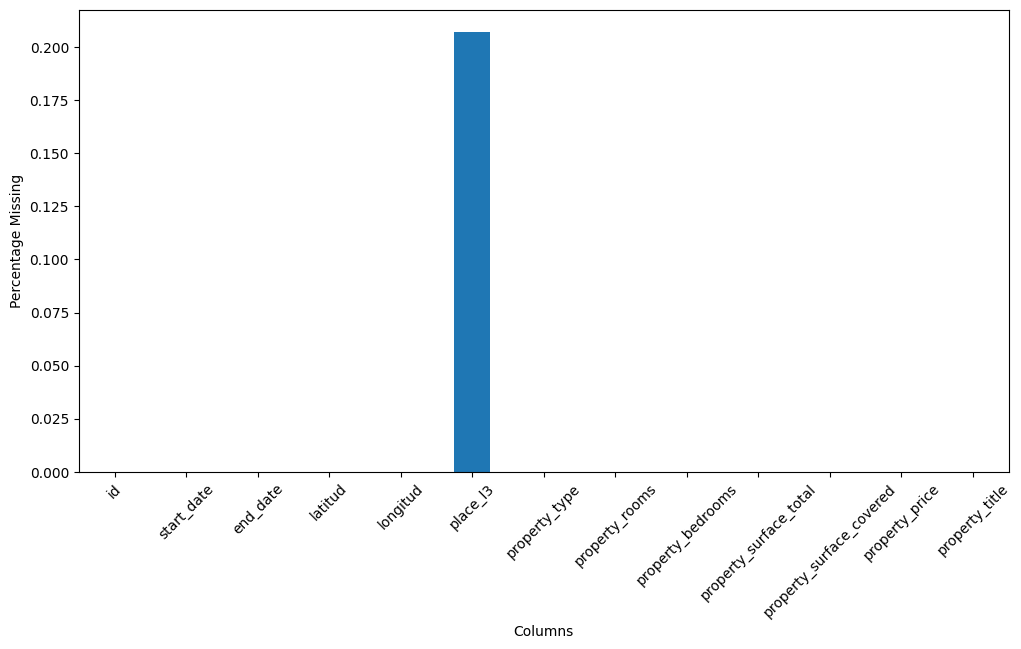

In [74]:
percent_missing = ds_train.isna().sum() * 100 / len(ds_train)
plt.figure(figsize=(12, 6))
percent_missing.plot.bar(x='index', rot=45)
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
rows = ds_train.shape[0]
print(ds_train.isna().sum() / rows * 100)

### Analisis de Valores Atipicos

#### Univariados

**Metodo IQR**

In [75]:
def calculate_univariate_iqr(column, dataset):
    print(f"cantidad de datos del ds: {len(dataset)}")

    # 1er cuartil para property_rooms
    q1 = column.quantile(0.25)

    # 3er cuartil para property_rooms
    q3 = column.quantile(0.75)
    med = column.median()

    # region IQR
    iqr = q3 - q1

    # Bigotes altos y bajos
    limite_superior = q3 + (1.5 * iqr)
    limite_inferior = q1 - (1.5 * iqr)

    outliers = dataset[(column <= limite_inferior) | (column >= limite_superior)]
    print(f"outliers encontrados para los {column.name}: {len(outliers)}")
    print(f"hay {len(outliers) * 100 // len(dataset)}% de outliers de {column.name} sobre el ds")
    print(f"limit sup: {limite_superior}, limite inf: {limite_inferior}")

    outliers_grafico = dataset[(column >= limite_inferior) & (column <= limite_superior)][column.name]

    plt.figure(figsize=(5, 5))
    plt.boxplot(outliers_grafico)
    plt.title(f"Boxplot de IQR para {column.name}")
    plt.show()

In [76]:
def boxplot_outliers_edges(series, moderated_outliers=True):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    if moderated_outliers:
        value = 1.5
    else:
        value = 3

    max = q3 + (value * iqr)
    min = q1 - (value * iqr)

    return min, max


In [77]:
def boxplot_with_outliers(dataset, column_name):
    column = dataset[column_name]
    moderated_min, moderated_max = boxplot_outliers_edges(column)
    severe_min, severe_max = boxplot_outliers_edges(column, moderated_outliers=False)

    print(f"Moderated outliers limits [min: {moderated_min},max: {moderated_max}]")
    print(f"Severe outliers limits [min: {severe_min},max: {severe_max}]")

    plt.figure(figsize=(5, 10))
    column.plot.box()

    plt.axhline(moderated_min, label="Moderated")
    plt.axhline(moderated_max)
    plt.axhline(severe_min, color="r", label="Severe")
    plt.axhline(severe_max, color="r")
    #plt.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
    plt.legend(title="Limites")

**Ambientes**

cantidad de datos del ds: 74351
outliers encontrados para los property_rooms: 1206
hay 1% de outliers de property_rooms sobre el ds
limit sup: 7.0, limite inf: -1.0


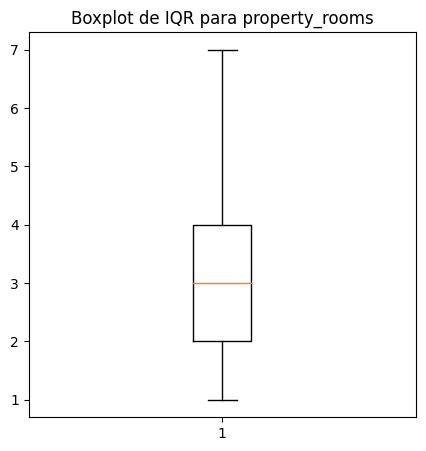

In [78]:
calculate_univariate_iqr(ds_train.property_rooms, ds_train)

In [79]:
# Train
outlier_inf_rooms_iqr_train = ds_train[ds_train['property_rooms'] < 0]
outlier_sup_rooms_iqr_train = ds_train[ds_train['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en train son: {len(outlier_inf_rooms_iqr_train)}. Constituyen al {(len(outlier_inf_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en train son: {len(outlier_sup_rooms_iqr_train)}. Constituyen al {(len(outlier_sup_rooms_iqr_train) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test
outlier_inf_rooms_iqr_test = ds_test[ds_test['property_rooms'] < 0]
outlier_sup_rooms_iqr_test = ds_test[ds_test['property_rooms'] > 7]

print(
    f"Los outliers inf de rooms en test son: {len(outlier_inf_rooms_iqr_test)}. Constituyen al {(len(outlier_inf_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers sup de rooms en test son: {len(outlier_sup_rooms_iqr_test)}. Constituyen al {(len(outlier_sup_rooms_iqr_test) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en train son: 604. Constituyen al 0% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 123. Constituyen al 0% de los datos


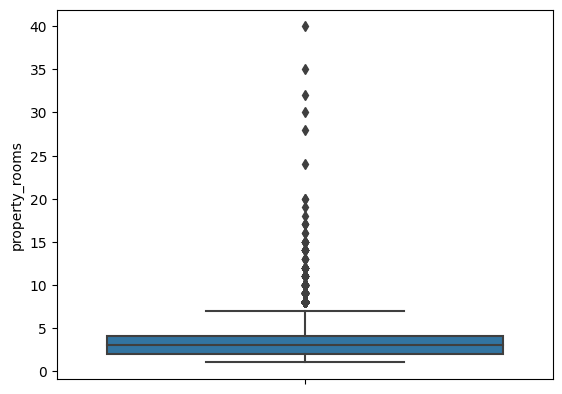

In [80]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

In [81]:
# Train
ds_train.drop(outlier_sup_rooms_iqr_train.index, inplace=True)
print(f"Los outliers sup de rooms en train post eliminacion son: {len(ds_train[ds_train['property_rooms'] > 7])}")

# Test
ds_test.drop(outlier_sup_rooms_iqr_test.index, inplace=True)
print(f"Los outliers sup de rooms en test post eliminacion son: {len(ds_test[ds_test['property_rooms'] > 7])}")

Los outliers sup de rooms en train post eliminacion son: 0
Los outliers sup de rooms en test post eliminacion son: 0


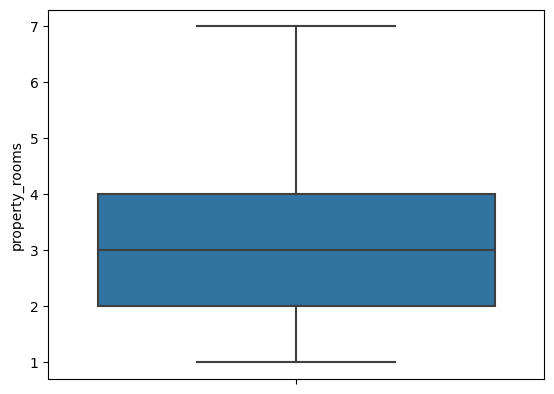

In [82]:
sns.boxplot(y=ds_train.property_rooms)
plt.show()

**Habitaciones**

Moderated outliers limits [min: -2.0,max: 6.0]
Severe outliers limits [min: -5.0,max: 9.0]


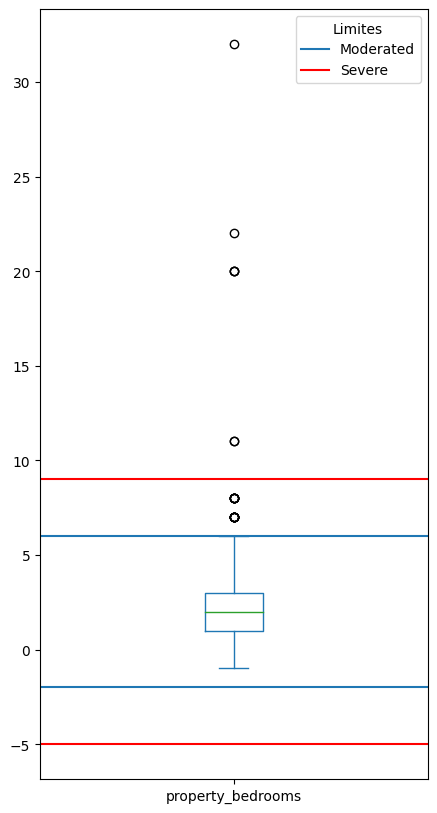

In [83]:
boxplot_with_outliers(ds_train, 'property_bedrooms')

cantidad de datos del ds: 73747
outliers encontrados para los property_bedrooms: 139
hay 0% de outliers de property_bedrooms sobre el ds
limit sup: 6.0, limite inf: -2.0


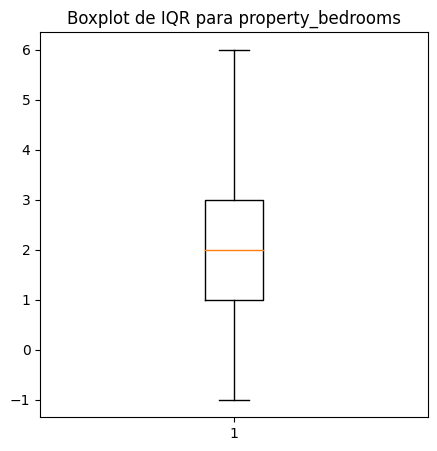

In [84]:
calculate_univariate_iqr(ds_train.property_bedrooms, ds_train)

In [85]:
# Train
outlier_inf_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_train = ds_train[ds_train['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_train)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_train)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_train) * 100) // len(ds_train.property_bedrooms)}% de los datos")

# Test

outlier_inf_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] < 0]
outlier_sup_bedrooms_iqr_test = ds_test[ds_test['property_bedrooms'] > 6]
print(
    f"Los outliers inf de bedrooms son: {len(outlier_inf_bedrooms_iqr_test)}. Constituyen al {(len(outlier_inf_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")
print(
    f"Los outliers sup de bedrooms son: {len(outlier_sup_bedrooms_iqr_test)}. Constituyen al {(len(outlier_sup_bedrooms_iqr_test) * 100) // len(ds_test.property_bedrooms)}% de los datos")

Los outliers inf de bedrooms son: 1. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 23. Constituyen al 0% de los datos
Los outliers inf de bedrooms son: 0. Constituyen al 0% de los datos
Los outliers sup de bedrooms son: 11. Constituyen al 0% de los datos


In [86]:
# Train

print(f"fila a eliminar: {ds_train[ds_train['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_train.index
ds_train.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en train")

# Test

print(f"filas a eliminar: {ds_test[ds_test['property_bedrooms'] < 0]}")
indice_outlier = outlier_inf_bedrooms_iqr_test.index
ds_test.drop(indice_outlier, inplace=True)
print(f"Se han eliminado: {len(indice_outlier)} registros en test")

fila a eliminar:                               id  start_date    end_date    latitud  \
406880  3WI+zCCMeb9TR5kOBm7rhg==  2021-01-07  2021-03-18 -34.577595   

         longitud       place_l3 property_type  property_rooms  \
406880 -58.495185  Villa Urquiza  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
406880               -1.0                    61.0                      43.0   

        property_price                                     property_title  
406880        125000.0  Jardines de Roosevelt - Hermoso 3 ambientes co...  
Se han eliminado: 1 registros en train
filas a eliminar: Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title]
Index: []
Se han eliminado: 0 registros en test


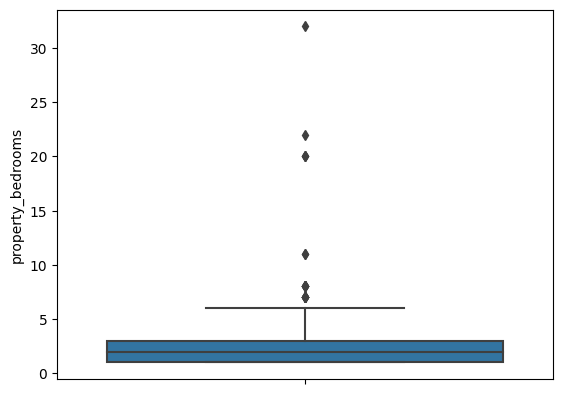

In [87]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

In [88]:
print("Ejemplos: ")
len(f"AMB < HAB = {len(outlier_sup_bedrooms_iqr_train[outlier_sup_bedrooms_iqr_train.property_rooms < outlier_sup_bedrooms_iqr_train.property_rooms])}")

Ejemplos: 


13

In [89]:
# Train

indice_outlier_train = outlier_sup_bedrooms_iqr_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_bedrooms_iqr_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 23 registros en train
Se han eliminado: 11 registros en test


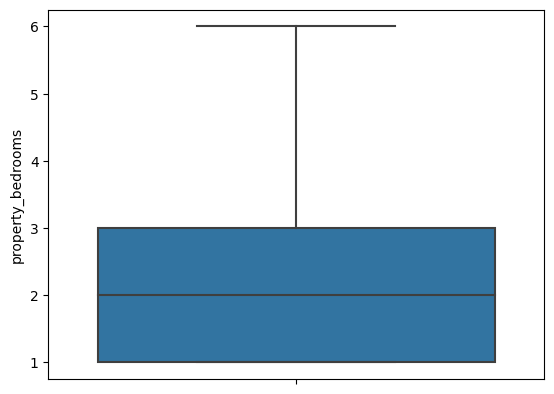

In [90]:
sns.boxplot(y=ds_train.property_bedrooms)
plt.show()

**Superficie Total**

cantidad de datos del ds: 73723
outliers encontrados para los property_surface_total: 5865
hay 7% de outliers de property_surface_total sobre el ds
limit sup: 186.5, limite inf: -41.5


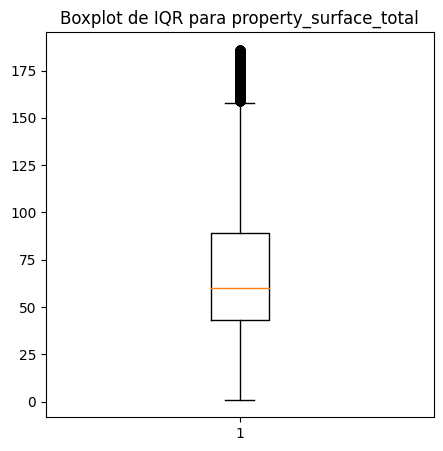

In [91]:
calculate_univariate_iqr(ds_train.property_surface_total, ds_train)

In [92]:
# Train

indice_outlier_train = ds_train[ds_train.property_surface_total < 18].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = ds_test[ds_test.property_surface_total < 18].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 75 registros en train
Se han eliminado: 20 registros en test


In [93]:
inf, sup = boxplot_outliers_edges(ds_train.property_surface_total, False)
print(f"Nuestro rango intercuartil está comprendido entre: {inf}, {sup}")

Nuestro rango intercuartil está comprendido entre: -127.0, 272.0


In [94]:
# Train

outlier_inf_total_iqr_train = ds_train[ds_train['property_surface_total'] < -44]
outlier_sup_total_iqr_train = ds_train[ds_train['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en train son: {len(outlier_inf_total_iqr_train)}. Constituyen al {(len(outlier_inf_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en train son: {len(outlier_sup_total_iqr_train)}. Constituyen al {(len(outlier_sup_total_iqr_train) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_inf_total_iqr_test = ds_test[ds_test['property_surface_total'] < -44]
outlier_sup_total_iqr_test = ds_test[ds_test['property_surface_total'] > 191]
print(
    f"Los outliers inf de sup total en test son: {len(outlier_inf_total_iqr_test)}. Constituyen al {(len(outlier_inf_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")
print(
    f"Los outliers sup de sup total en test son: {len(outlier_sup_total_iqr_test)}. Constituyen al {(len(outlier_sup_total_iqr_test) * 100) // len(ds_test.property_surface_total)}% de los datos")

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en train son: 5542. Constituyen al 7% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup total en test son: 1375. Constituyen al 7% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


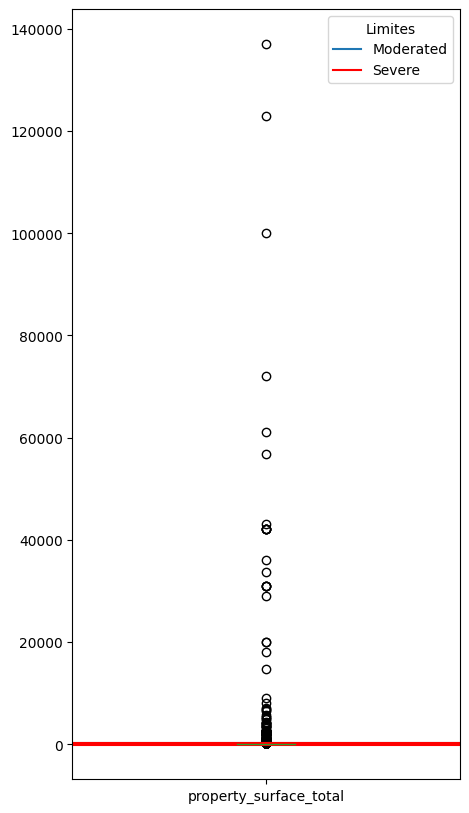

In [95]:
boxplot_with_outliers(ds_train, ds_train.property_surface_total.name)

0-272       3207
272-500     2024
500-750      194
1000-inf      90
750-1000      27
Name: property_surface_total, dtype: int64


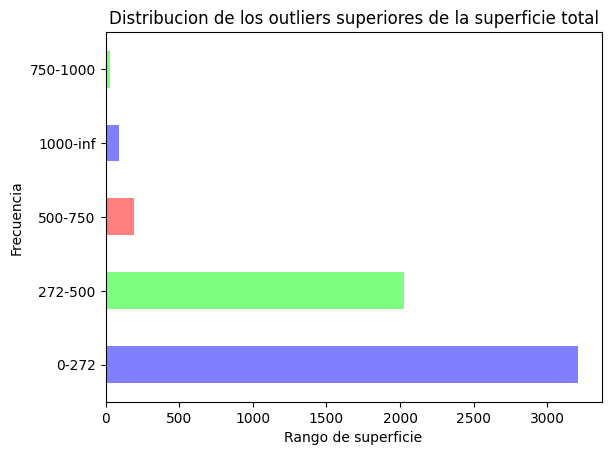

In [96]:
property_surface_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_total,
                                  bins=[0, 272, 500, 750, 1000, float("inf")],
                                  labels=["0-272", "272-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(property_surface_grouped.value_counts())
ax = property_surface_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                       title="Distribucion de los outliers superiores de la superficie total",
                                                       xlabel="Rango de superficie", ylabel="Frecuencia")

In [97]:
surface_median = ds_train[ds_train.property_type == 'Casa'].property_surface_total.median()
print(
    f"Si bien la mediana de la superficite total es {surface_median} y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500")
    
    
    

Si bien la mediana de la superficite total es 220.0 y limite superior de outliers severos es 272, consideramos que sigue siendo un valor válido, por lo tanto, descartaremos los valores mayores a 500


In [98]:
# Train

outlier_sup_total_500_train = ds_train[ds_train['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en train son: {len(ds_train[ds_train['property_surface_total'] > 500])}. Constituyen al {(len(ds_train[ds_train['property_surface_total'] > 500]) * 100) // len(ds_train.property_surface_total)}% de los datos")

# Test

outlier_sup_total_500_test = ds_test[ds_test['property_surface_total'] > 500]
print(
    f"Los outliers superiores de sup total en test son: {len(ds_test[ds_test['property_surface_total'] > 500])}. Constituyen al {(len(ds_test[ds_test['property_surface_total'] > 500]) * 100) // len(ds_test.property_surface_total)}% de los datos")




Los outliers superiores de sup total en train son: 311. Constituyen al 0% de los datos
Los outliers superiores de sup total en test son: 55. Constituyen al 0% de los datos


Moderated outliers limits [min: -41.5,max: 186.5]
Severe outliers limits [min: -127.0,max: 272.0]


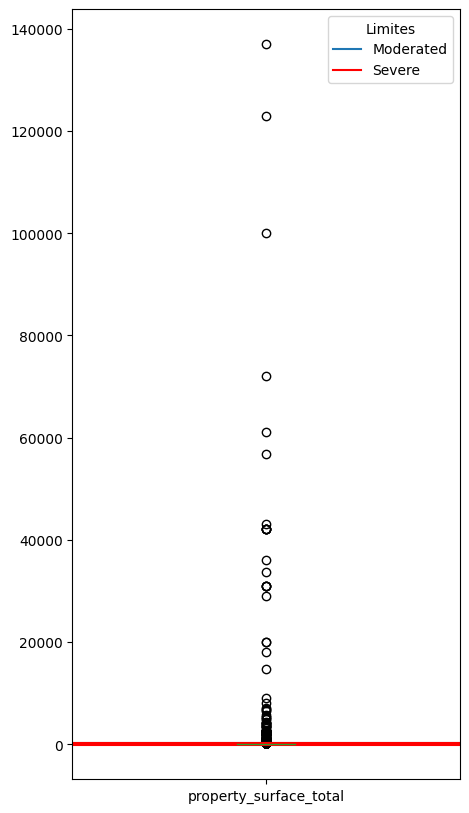

In [99]:
boxplot_with_outliers(ds_train, 'property_surface_total')

In [100]:
# Train

indice_outlier_train = outlier_sup_total_500_train.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = outlier_sup_total_500_test.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 311 registros en train
Se han eliminado: 55 registros en test


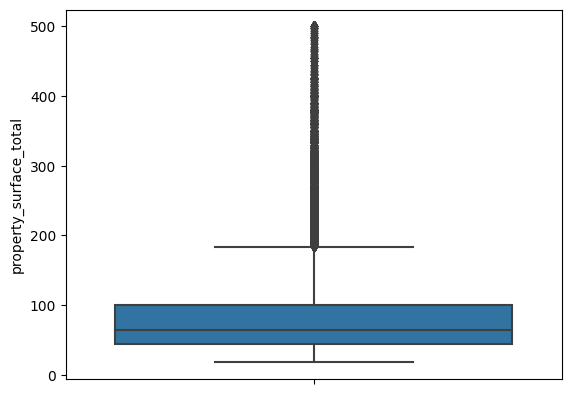

In [101]:
sns.boxplot(y=ds_train.property_surface_total)
plt.show()

**Superficie cubierta**

cantidad de datos del ds: 73337
outliers encontrados para los property_surface_covered: 5800
hay 7% de outliers de property_surface_covered sobre el ds
limit sup: 155.0, limite inf: -29.0


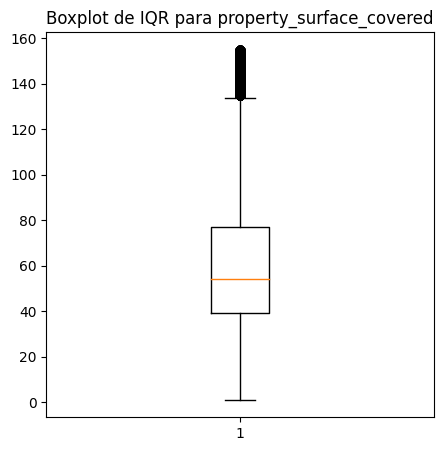

In [102]:
calculate_univariate_iqr(ds_train.property_surface_covered, ds_train)

In [103]:
# Train

outlier_inf_covered_iqr_train = ds_train[ds_train['property_surface_covered'] < 0]
outlier_sup_covered_iqr_train = ds_train[ds_train['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en train son: {len(outlier_inf_covered_iqr_train)}. Constituyen al {(len(outlier_inf_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en train son: {len(outlier_sup_covered_iqr_train)}. Constituyen al {(len(outlier_sup_covered_iqr_train) * 100) // len(ds_train.property_surface_covered)}% de los datos")

# Test

outlier_inf_covered_iqr_test = ds_test[ds_test['property_surface_covered'] < 0]
outlier_sup_covered_iqr_test = ds_test[ds_test['property_surface_covered'] > 155]
print(
    f"Los outliers inf de sup cubierta en test son: {len(outlier_inf_covered_iqr_test)}. Constituyen al {(len(outlier_inf_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")
print(
    f"Los outliers sup de sup cubierta en test son: {len(outlier_sup_covered_iqr_test)}. Constituyen al {(len(outlier_sup_covered_iqr_test) * 100) // len(ds_test.property_surface_covered)}% de los datos")

Los outliers inf de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en train son: 5710. Constituyen al 7% de los datos
Los outliers inf de sup cubierta en test son: 0. Constituyen al 0% de los datos
Los outliers sup de sup cubierta en test son: 1359. Constituyen al 7% de los datos


Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


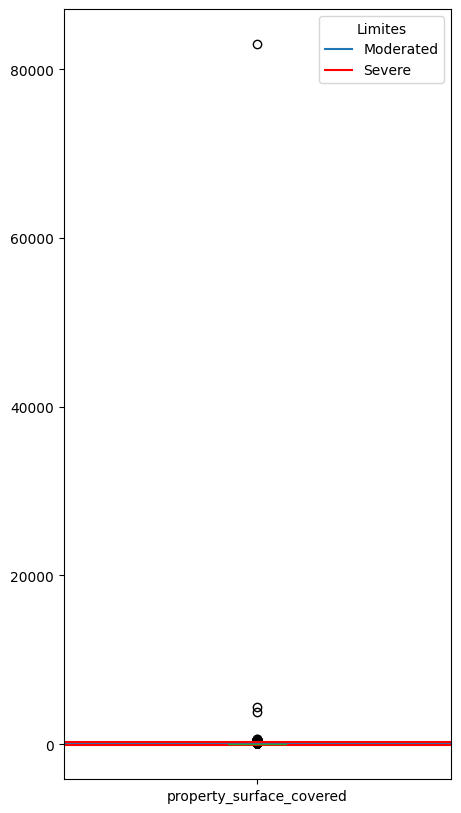

In [104]:
boxplot_with_outliers(ds_train, 'property_surface_covered')

Moderated outliers limits [min: -29.0,max: 155.0]
Severe outliers limits [min: -98.0,max: 224.0]


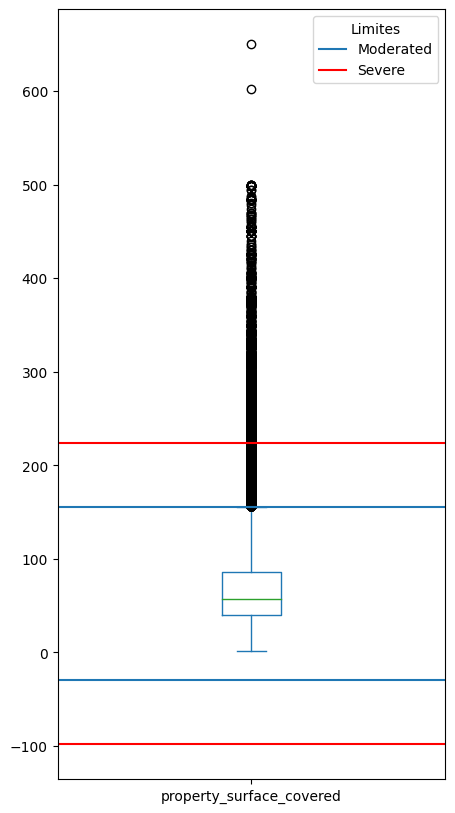

In [105]:
boxplot_with_outliers(ds_train[ds_train.property_surface_covered < 750], 'property_surface_covered')

0-224       3149
224-500     2303
500-750       61
1000-inf      20
750-1000       9
Name: property_surface_covered, dtype: int64


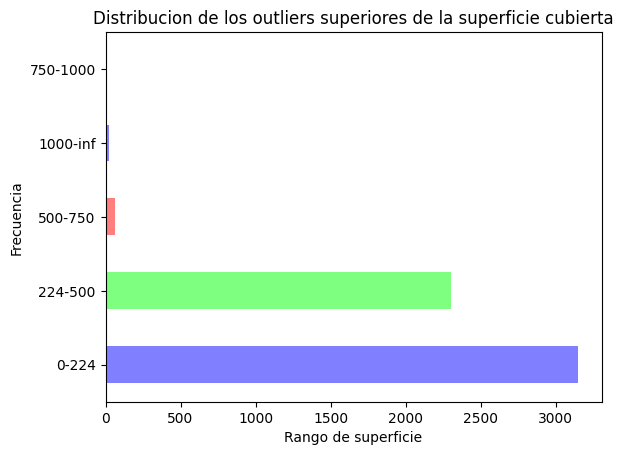

In [106]:
surface_total_grouped = pd.cut(outlier_sup_total_iqr_train.property_surface_covered,
                               bins=[0, 224, 500, 750, 1000, float("inf")],
                               labels=["0-224", "224-500", "500-750", "750-1000", "1000-inf"], include_lowest=True)
print(surface_total_grouped.value_counts())
ax = surface_total_grouped.value_counts().plot.barh(alpha=0.5, color=colores,
                                                    title="Distribucion de los outliers superiores de la superficie cubierta",
                                                    xlabel="Rango de superficie", ylabel="Frecuencia")

In [107]:
# Train

outlier_sup_cubierta_500 = ds_train[ds_train['property_surface_covered'] > 500]
indice_outlier_train = outlier_sup_cubierta_500.index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

outlier_sup_cubierta_500 = ds_test[ds_test['property_surface_covered'] > 500]
indice_outlier_test = outlier_sup_cubierta_500.index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 5 registros en train
Se han eliminado: 2 registros en test


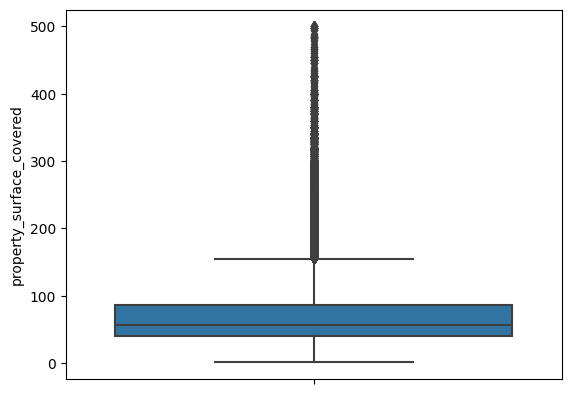

In [108]:
sns.boxplot(y=ds_train.property_surface_covered)
plt.show()

**Latitud y longitud**

cantidad de datos del ds: 73332
outliers encontrados para los latitud: 429
hay 0% de outliers de latitud sobre el ds
limit sup: -34.52018607500001, limite inf: -34.67244807499999


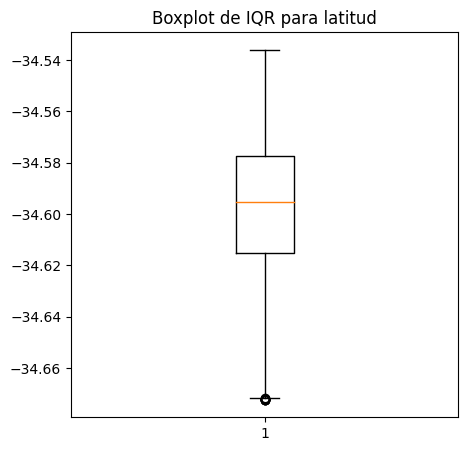

In [109]:
calculate_univariate_iqr(ds_train.latitud, ds_train)

cantidad de datos del ds: 73332
outliers encontrados para los longitud: 84
hay 0% de outliers de longitud sobre el ds
limit sup: -58.3248227261875, limite inf: -58.5497409242875


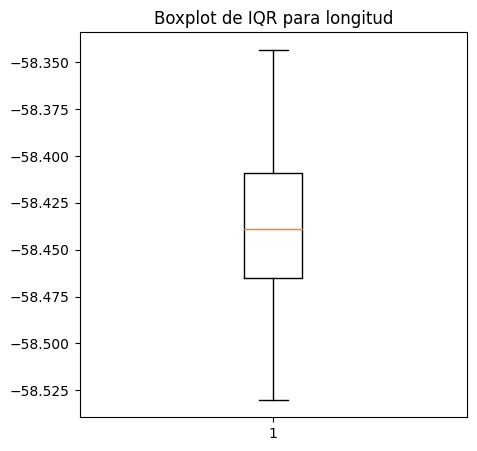

In [110]:
calculate_univariate_iqr(ds_train.longitud, ds_train)

In [111]:
# Train

outlier_inf_latitud_iqr_train = ds_train[ds_train['latitud'] < -34]
outlier_sup_latitud_iqr_train = ds_train[ds_train['latitud'] > -34]
print(
    f"Los outliers inf de latitud en train son: {len(outlier_inf_latitud_iqr_train)}. Constituyen al {(len(outlier_inf_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en train son: {len(outlier_sup_latitud_iqr_train)}. Constituyen al {(len(outlier_sup_latitud_iqr_train) * 100) // len(ds_train.latitud)}% de los datos")

# Test

outlier_inf_latitud_iqr_test = ds_test[ds_test['latitud'] < -34]
outlier_sup_latitud_iqr_test = ds_test[ds_test['latitud'] > -34]
print(
    f"Los outliers inf de latitud en test son: {len(outlier_inf_latitud_iqr_test)}. Constituyen al {(len(outlier_inf_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")
print(
    f"Los outliers sup de latitud en test son: {len(outlier_sup_latitud_iqr_test)}. Constituyen al {(len(outlier_sup_latitud_iqr_test) * 100) // len(ds_test.latitud)}% de los datos")

Los outliers inf de latitud en train son: 73258. Constituyen al 99% de los datos
Los outliers sup de latitud en train son: 74. Constituyen al 0% de los datos
Los outliers inf de latitud en test son: 17736. Constituyen al 99% de los datos
Los outliers sup de latitud en test son: 22. Constituyen al 0% de los datos


#### Metodo Z score

In [112]:
def calculate_zscore_st(dataset, column):
    dataset_copy = dataset.copy()
    media = np.mean(column)
    std = np.std(column)
    dataset_copy[f'z_{column.name}'] = (column - media) / std
    return dataset_copy

**Ambientes**

In [113]:
z_rooms_ds = calculate_zscore_st(ds_train, ds_train.property_rooms)

In [114]:
# Train

print(
    f"Los outliers sup de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_train.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en train son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3]) * 100) // len(ds_train.property_rooms)}% de los datos")

# Test

print(
    f"Los outliers sup de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")
print(
    f"Los outliers inf de rooms en test son: {len(z_rooms_ds[z_rooms_ds['z_property_rooms'] < -3])}. Constituyen al {(len(z_rooms_ds[z_rooms_ds['z_property_rooms'] > 3]) * 100) // len(ds_test.property_rooms)}% de los datos")

Los outliers sup de rooms en train son: 540. Constituyen al 0% de los datos
Los outliers inf de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers sup de rooms en test son: 540. Constituyen al 3% de los datos
Los outliers inf de rooms en test son: 0. Constituyen al 3% de los datos


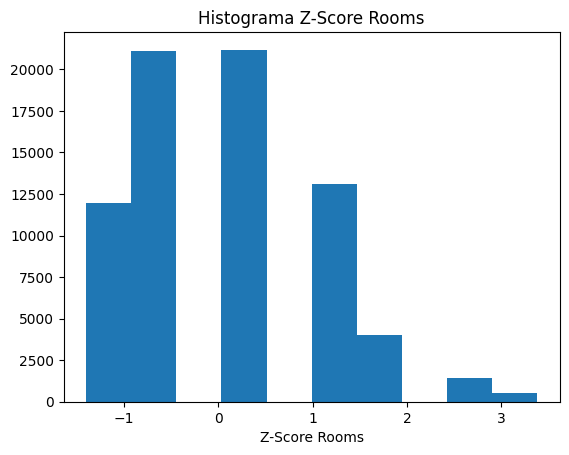

In [115]:
plt.hist(z_rooms_ds.z_property_rooms)
plt.title('Histograma Z-Score Rooms')
plt.xlabel('Z-Score Rooms')
plt.show()

**Habitaciones**

In [116]:
z_bedrooms_ds = calculate_zscore_st(ds_train, ds_train.property_bedrooms)

In [117]:
# Train

print(
    f"Los outliers sup de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

print(
    f"Los outliers sup de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] > 3]

Los outliers sup de bedrooms en train son: 660.Constituyen al 0% de los datos
Los outliers sup de bedrooms en test son: 660.Constituyen al 3% de los datos


id  start_date    end_date    latitud  \
381146  8CDnFn8mnt8adBaJKQAqhQ==  2021-07-08  2021-07-23 -34.629640   
428098  GVRyox6PrWjmcXkyIs1MEg==  2021-12-16  2022-01-27 -34.595470   
450059  nWbjcLoalgCc4UXe9LqOXw==  2021-12-16  2022-03-25 -34.647990   
260580  uK5zDn5lg9vD/tVHRRkxYA==  2021-04-14  2021-04-30 -34.564461   
277464  qGeYR3EqVzlW+W58+nBc0w==  2021-12-23  2022-01-27 -34.594519   
...                          ...         ...         ...        ...   
265780  Jgix5BeXMcQt1TKJb2yEiA==  2021-11-19  2022-01-27 -34.568252   
136233  YI0kUdU9NEDQSAKKp1Nl2g==  2021-10-06  2022-03-09 -34.592106   
155754  xk5P0kO2C3l/CTrMxpynJA==  2021-04-05  2021-04-15 -34.568480   
440989  JPNWB5YyWWrbGbgz8AE5ng==  2021-07-20  2021-10-13 -34.613688   
219211  yZ1q8SipMwHAKNK0xa1ApQ==  2021-10-23  2022-05-05 -34.628091   

         longitud   place_l3 property_type  property_rooms  property_bedrooms  \
381146 -58.460432     Flores  Departamento             7.0                6.0   
428098 -58.384464   Recoleta  Departamento             7.0                5.0   
450059 -58.516038    Liniers          Casa             6.0                6.0   
260580 -58.437362   Belgrano  Departamento             6.0                5.0   
277464 -58.397019   Recoleta  Departamento             6.0                5.0   
...           ...        ...           ...             ...                ...   
265780 -58.446695   Belgrano  Departamento             6.0                5.0   
136233 -58.396012   Recoleta  Departamento             7.0                5.0   
155754 -58.448195   Belgrano  Departamento             6.0                5.0   
440989 -58.388822  Monserrat  Departamento             7.0                5.0   
219211 -58.416832      Boedo          Casa             6.0                5.0   

        property_surface_total  property_surface_covered  property_price  \
381146                   190.0                     176.0        390000.0   
428098                   380.0                     320.0        690000.0   
450059                   236.0                     216.0        189000.0   
260580                   423.0                     325.0        730000.0   
277464                   436.0                     418.0       1100000.0   
...                        ...                       ...             ...   
265780                   320.0                     280.0        790000.0   
136233                   467.0                     463.0       1750000.0   
155754                   121.0                     121.0        295000.0   
440989                   170.0                     166.0        239000.0   
219211                   165.0                     165.0        280000.0   

                                           property_title  z_property_bedrooms  
381146             ESPECTACULAR DEPARTAMENTO 7 AMBIENTES              4.332476  
428098  OPORTUNIDAD UNICA! MARAVILLOSO PISO DE 380 M2 ...             3.285079  
450059   VENTA LOTE / OFICINA / CASA 6 AMBIENTES LINIERS              4.332476  
260580                            Departamento - Belgrano             3.285079  
277464  Excelente Departamento en Duplex - Edificio de...             3.285079  
...                                                   ...                  ...  
265780                            Departamento - Belgrano             3.285079  
136233  Edificio Frances antiguo. Gran recepción. Fren...             3.285079  
155754                            Departamento - Belgrano             3.285079  
440989    Venta Departamento 7 Ambientes Balcón Monserrat             3.285079  
219211                                       Casa - Boedo             3.285079  

[660 rows x 14 columns]

In [118]:
# Train

print(
    f"Los outliers inf de bedrooms en train son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

# Test

print(
    f"Los outliers inf de bedrooms en test son: {len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3])}.Constituyen al {(len(z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
z_bedrooms_ds[z_bedrooms_ds['z_property_bedrooms'] < -3]

Los outliers inf de bedrooms en train son: 0.Constituyen al 0% de los datos
Los outliers inf de bedrooms en test son: 0.Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_bedrooms]
Index: []

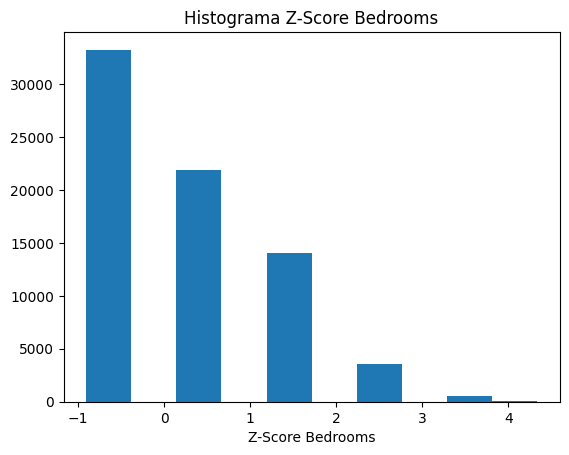

In [119]:
plt.hist(z_bedrooms_ds.z_property_bedrooms)
plt.title('Histograma Z-Score Bedrooms')
plt.xlabel('Z-Score Bedrooms')
plt.show()

**Superficie Total**

In [120]:
z_total_ds = calculate_zscore_st(ds_train, ds_train.property_surface_total)

In [121]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] > 3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] > 3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] > 3].head()

Los outliers superiores de sup total en train son: 1817. Constituyen al 2% de los datos
Los outliers superiores de sup total en test son: 1817. Constituyen al 10% de los datos


id  start_date    end_date    latitud  \
411520  z1qM15jZhqAOt74rOMjIQg==  2021-03-02  2021-03-11 -34.590568   
138570  +fXBII+/QAkmy/OEKIi3Uw==  2021-07-15  2021-08-24 -34.563884   
207593  8jstOUZlF/j2hKDoZRq6zg==  2021-02-15  2021-03-11 -34.596275   
301217  Jpxmesqoj2ier2qdHM6+bw==  2021-08-10  2021-09-11 -34.613289   
428098  GVRyox6PrWjmcXkyIs1MEg==  2021-12-16  2022-01-27 -34.595470   

         longitud       place_l3 property_type  property_rooms  \
411520 -58.384887       Recoleta  Departamento             6.0   
138570 -58.483613  Villa Urquiza          Casa             5.0   
207593 -58.394813       Recoleta  Departamento             6.0   
301217 -58.362148  Puerto Madero  Departamento             3.0   
428098 -58.384464       Recoleta  Departamento             7.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
411520                4.0                   313.0                     243.0   
138570                4.0                   350.0                     216.0   
207593                3.0                   312.0                     264.0   
301217                2.0                   466.0                     319.0   
428098                5.0                   380.0                     320.0   

        property_price                                     property_title  \
411520       1050000.0  Venta Departamento Recoleta semipiso sobre Alv...   
138570        355000.0  CASA en venta VILLA URQUIZA 5 Ambientes C/COCHERA   
207593        580000.0  VENTA DEPARTAMENTO DUPLEX CON TERRAZAS 6 AMBIE...   
301217       3000000.0                       Departamento - Puerto Madero   
428098        690000.0  OPORTUNIDAD UNICA! MARAVILLOSO PISO DE 380 M2 ...   

        z_property_surface_total  
411520                  3.463723  
138570                  4.027644  
207593                  3.448482  
301217                  5.795611  
428098                  4.484877

In [122]:
# Train

print(
    f"Los outliers inf de sup total en train son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_train.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

# Test

print(
    f"Los outliers inf de sup total en test son: {len(z_total_ds[z_total_ds['z_property_surface_total'] < -3])}. Constituyen al {(len(z_total_ds[z_total_ds['z_property_surface_total'] < -3]) * 100) // len(ds_test.property_surface_total)}% de los datos")
z_total_ds[z_total_ds['z_property_surface_total'] < -3]

Los outliers inf de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inf de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_total]
Index: []

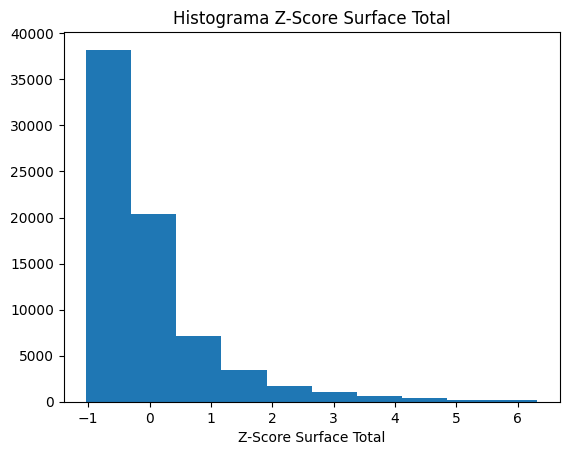

In [123]:
plt.hist(z_total_ds.z_property_surface_total)
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

**Superficie Cubierta**

In [124]:
z_covered_ds = calculate_zscore_st(ds_train, ds_train.property_surface_covered)

In [125]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] > 3]

Los outliers superiores de sup cubierta en train son: 1752. Constituyen al 2% de los datos
Los outliers superiores de sup cubierta en test son: 1752. Constituyen al 9% de los datos


id  start_date    end_date    latitud  \
35764   h1P0tQzKJSfoRPMgLFg9Og==  2021-02-08  2021-03-16 -34.636179   
317957  lG+BZ5ASTZ71W+B4qdzGlg==  2021-02-28  2021-06-05 -34.591182   
411520  z1qM15jZhqAOt74rOMjIQg==  2021-03-02  2021-03-11 -34.590568   
71281   NMtOaLppqJjjOwNx41Fhew==  2021-01-10  2021-05-09 -34.565572   
207593  8jstOUZlF/j2hKDoZRq6zg==  2021-02-15  2021-03-11 -34.596275   
...                          ...         ...         ...        ...   
136233  YI0kUdU9NEDQSAKKp1Nl2g==  2021-10-06  2022-03-09 -34.592106   
438608  4TGK8ycXwdGa6GSh8kocig==  2021-04-23  2021-07-17 -34.569078   
206076  4IHUinz/gMcT2/LDgal0ug==  2021-03-09  2021-06-05 -34.547926   
101946  gB74DypGoLJfZ0nCqEF6Gg==  2021-05-28  2021-06-18 -34.546798   
84099   OLA4jKUkGxUeBXVjCqA0Yw==  2021-02-05  2021-06-18 -34.592899   

         longitud          place_l3 property_type  property_rooms  \
35764  -58.437402  Parque Chacabuco          Casa             5.0   
317957 -58.378620            Retiro  Departamento             5.0   
411520 -58.384887          Recoleta  Departamento             6.0   
71281  -58.433364          Belgrano  Departamento             5.0   
207593 -58.394813          Recoleta  Departamento             6.0   
...           ...               ...           ...             ...   
136233 -58.396012          Recoleta  Departamento             7.0   
438608 -58.444288           Palermo  Departamento             5.0   
206076 -58.456212             Nuñez  Departamento             4.0   
101946 -58.480526          Saavedra          Casa             5.0   
84099  -58.387719          Recoleta  Departamento             6.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
35764                 3.0                   280.0                     280.0   
317957                4.0                   260.0                     260.0   
411520                4.0                   313.0                     243.0   
71281                 3.0                   250.0                     250.0   
207593                3.0                   312.0                     264.0   
...                   ...                     ...                       ...   
136233                5.0                   467.0                     463.0   
438608                4.0                   340.0                     340.0   
206076                3.0                   411.0                     270.0   
101946                4.0                   328.0                     257.0   
84099                 3.0                   343.0                     263.0   

        property_price                                     property_title  \
35764         310000.0              Casa y Local, Venta, Parque Chacabuco   
317957        800000.0  Departamento - Retiro 5 ambientes amenities co...   
411520       1050000.0  Venta Departamento Recoleta semipiso sobre Alv...   
71281         790000.0                            Departamento - Belgrano   
207593        580000.0  VENTA DEPARTAMENTO DUPLEX CON TERRAZAS 6 AMBIE...   
...                ...                                                ...   
136233       1750000.0  Edificio Frances antiguo. Gran recepción. Fren...   
438608        750000.0             5 AMB CON COCHERA TOTALMENTE RECICLADO   
206076       2100000.0  Espectacular Duplex 411m2 - Chateau Libertador...   
101946        330000.0   VENTA CASA 5 AMBIENTES SAAVEDRA A REFACC-PERMUTA   
84099         995000.0                                   Juncal y Uruguay   

        z_property_surface_covered  
35764                     3.678884  
317957                    3.320564  
411520                    3.015992  
71281                     3.141404  
207593                    3.392228  
...                            ...  
136233                    6.957509  
438608                    4.753843  
206076                    3.499724  
101946                    3.266816  
84099                     3.374312  

[1752 rows x 14 columns]

In [126]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3])}. Constituyen al {(len(z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
z_covered_ds[z_covered_ds['z_property_surface_covered'] < -3]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, z_property_surface_covered]
Index: []

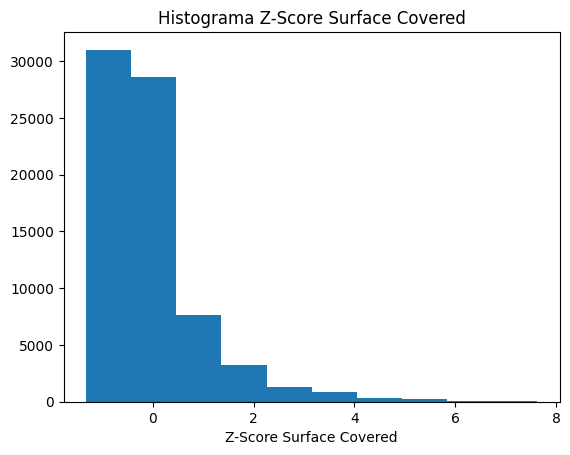

In [127]:
plt.hist(z_covered_ds.z_property_surface_covered)
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

**Latitud y Longitud**

In [128]:
z_latitud_ds = calculate_zscore_st(ds_train, ds_train.latitud)

In [129]:
# Train

print(
    f"Los outliers superiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

# Test

print(
    f"Los outliers superiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] > 3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] > 3]

Los outliers superiores de latitud en train son: 75. Constituyen al 0% de los datos
Los outliers superiores de latitud en test son: 75. Constituyen al 0% de los datos


id  start_date    end_date    latitud  \
25574   5AF0wjAb/TIyttOJjURixw==  2021-06-24  2022-02-09 -33.081030   
9156    pY/8UqUbnzAmyeHnEDPDIQ==  2021-05-18  2021-11-04 -31.390431   
234297  sb4Ig0U4gDt4iOEpTW4R9w==  2021-06-02  2021-06-05 -31.302107   
234899  wW3sjHf50MGk2LR+CzvLTQ==  2021-06-02  2021-06-13 -33.081689   
190751  7o/0rc85DcjL/u3bj88vzg==  2021-11-01  2022-01-27 -31.355688   
...                          ...         ...         ...        ...   
134196  s3z8Y8u6UYiGamjl7GKWUA==  2021-04-06  2021-04-25 -27.581620   
288009  1TJ0s3IktNaEYX2+hRurSw==  2021-02-25  2021-03-01 -33.081030   
190864  y77imFw2Qpe40Ah1ez0Q9g==  2021-11-01  2022-01-27 -31.668812   
190837  lbkcXjbTF75T6OaMET9cTA==  2021-11-01  2022-01-27 -31.363175   
308524  5gULcuCymCY+LG4gkqts3w==  2021-04-28  2021-07-17 -33.081030   

         longitud place_l3 property_type  property_rooms  property_bedrooms  \
25574  -68.468140      NaN  Departamento             3.0                2.0   
9156   -64.179004      NaN  Departamento             1.0                1.0   
234297 -64.254654      NaN          Casa             4.0                3.0   
234899 -68.468828      NaN  Departamento             1.0                1.0   
190751 -64.312929      NaN            PH             2.0                1.0   
...           ...      ...           ...             ...                ...   
134196 -56.682310      NaN          Casa             4.0                2.0   
288009 -68.468140      NaN          Casa             4.0                3.0   
190864 -63.881342      NaN          Casa             3.0                2.0   
190837 -64.341195      NaN          Casa             3.0                2.0   
308524 -68.468140      NaN  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
25574                     66.0                      60.0         75000.0   
9156                      38.0                      38.0         55000.0   
234297                   360.0                     145.0        155000.0   
234899                    42.0                      37.0         54000.0   
190751                    55.0                      50.0         35000.0   
...                        ...                       ...             ...   
134196                   105.0                     105.0        200000.0   
288009                   108.0                     108.0        220000.0   
190864                   135.0                      73.0         30000.0   
190837                   300.0                     125.0         91900.0   
308524                    49.0                      44.0         57000.0   

                                           property_title  z_latitud  
25574     Venta 3 ambientes San Martín Centro Gran VISTA    9.939771  
9156    Depto en VENTA 1 dormitorio + cochera - Merlo ...  21.049095  
234297    Comarca de Allende , escritura , Recibo menor !  21.629494  
234899  MONOAMBIENTE A ESTRENAR C/AMENITIES. VISTA ABI...   9.935438  
190751                        Housing  en Cuesta Colorada  21.277401  
...                                                   ...        ...  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación  46.077683  
288009         VENTA  CASA  4  AMB  CON  PATIO / PLAYROOM   9.939771  
190864          Imperdibles duplex! Financiación propia!!  19.219789  
190837           HERMOSA CASA 2 DORM EN BARRIO LOS PRADOS  21.228200  
308524  Oportunidad, dpto.  3 amb en condominio c/cochera   9.939771  

[75 rows x 14 columns]

In [130]:
# Train

print(
    f"Los outliers inferiores de latitud en train son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_train.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

# Test

print(
    f"Los outliers inferiores de latitud en test son: {len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3])}. Constituyen al {(len(z_latitud_ds[z_latitud_ds['z_latitud'] < -3]) * 100) // len(ds_test.latitud)}% de los datos")
z_latitud_ds[z_latitud_ds['z_latitud'] < -3]

Los outliers inferiores de latitud en train son: 9. Constituyen al 0% de los datos
Los outliers inferiores de latitud en test son: 9. Constituyen al 0% de los datos


id  start_date    end_date    latitud  \
106297  oqSIUrrkBRMakJoEW/hYPg==  2021-03-11  2021-06-05 -41.086352   
324200  SSbx+/6MNgxE6rIDYPA0+A==  2021-03-03  2021-06-05 -38.940227   
10486   urWyn9L7ma60VBO8Ru6Xew==  2021-01-13  9999-12-31 -41.163826   
155333  j+0Iyd6D8YGQxE3u+nJiQQ==  2021-04-05  2021-04-15 -41.164123   
208085  2Xn6RKpg2Fps+wLCsSJavw==  2021-02-01  9999-12-31 -41.085373   
410404  KeQ40Z6VTXMHoq4j8oOp+A==  2021-03-02  2021-06-05 -38.964493   
131188  Qmi68tFcN9DiyOJjVmGvYg==  2021-05-27  2021-06-05 -41.083002   
105792  LHDYXTfhEERw7S90k5WA+Q==  2021-03-11  2021-06-05 -41.084900   
457631  ZskNGaMaM9MxJ4seQfgjtg==  2021-05-08  2021-08-08 -53.788624   

         longitud place_l3 property_type  property_rooms  property_bedrooms  \
106297 -71.185720      NaN  Departamento             2.0                1.0   
324200 -68.073865      NaN  Departamento             3.0                2.0   
10486  -71.438923      NaN          Casa             4.0                3.0   
155333 -71.415420      NaN          Casa             3.0                2.0   
208085 -71.185766      NaN  Departamento             2.0                1.0   
410404 -68.075830      NaN          Casa             7.0                5.0   
131188 -71.182747      NaN  Departamento             2.0                1.0   
105792 -71.187159      NaN  Departamento             1.0                1.0   
457631 -67.718089      NaN  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
106297                    53.0                      53.0        145000.0   
324200                    55.0                      55.0        120000.0   
10486                    100.0                     100.0        410000.0   
155333                    70.0                      70.0        380000.0   
208085                    60.0                      50.0        142000.0   
410404                   218.0                     218.0        230000.0   
131188                    66.0                      56.0        135000.0   
105792                    53.0                      53.0        145000.0   
457631                   121.0                     100.0        375000.0   

                                           property_title   z_latitud  
106297  POSIBLE PERMUTA-Villa Huapi - Dina Huapi - Río...  -42.665076  
324200  DEPTO 2 DORM EN COMPLEJO CALLE LOS LIRIOS BARR...  -28.562385  
10486   BAJO EL PRECIO!! CASA 4 AMB. EN LA LOMA - CERR...  -43.174173  
155333  HERMOSO LOTE CON CABAÑA EN BARILOCHE, V. LOS C...  -43.176129  
208085  Excelente departamento en venta en Dina Huapi ...  -42.658645  
410404  CASA 5 DORM BARRIO VILLA FLORENCIA CALLE REMIG...  -28.721844  
131188  VENDO MUY LINDO DEPARTAMENTO EN COMPLEJO CERRADO   -42.643061  
105792  Villa Huapi - Dina Huapi - Río Negro - APTO CR...  -42.655531  
457631                Depto 3 ambientes Arboris Las Lomas -126.134681

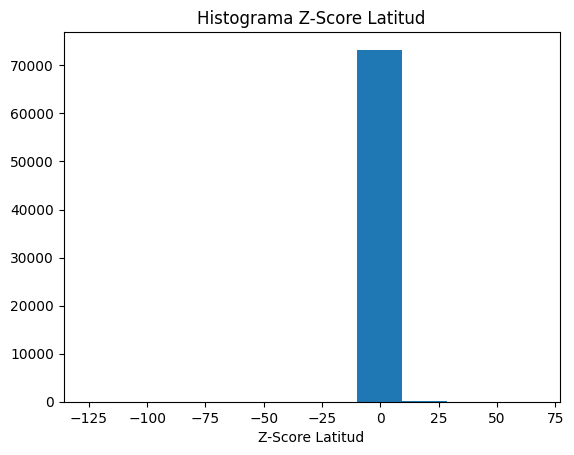

In [131]:
plt.hist(z_latitud_ds.z_latitud)
plt.title('Histograma Z-Score Latitud')
plt.xlabel('Z-Score Latitud')
plt.show()

In [132]:
z_longitud_ds = calculate_zscore_st(ds_train, ds_train.longitud)
z_latitud_ds.head()

id  start_date    end_date    latitud  \
398876  T2FRplBuQeDugP19ZRgAPA==  2021-02-13  2021-03-03 -34.605539   
147805  g8aVOW2Z17bZJR1e6g4t3A==  2021-08-19  2021-09-02 -34.609767   
318917  XoCYZbNzXTjmPygod5MNSQ==  2021-03-17  2021-06-05 -34.583755   
204125  0jVg3F5shORKa7kKi1Z+9Q==  2021-05-10  2021-06-05 -34.591590   
295805  G+PIgKq69d7VmKc9kqyjZQ==  2021-07-23  2021-08-23 -34.609359   

         longitud   place_l3 property_type  property_rooms  property_bedrooms  \
398876 -58.458807  Caballito  Departamento             1.0                1.0   
147805 -58.446246  Caballito  Departamento             2.0                1.0   
318917 -58.443697    Palermo  Departamento             1.0                1.0   
204125 -58.385946   Recoleta  Departamento             4.0                4.0   
295805 -58.383336  Monserrat  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
398876                    51.0                      46.0         82080.0   
147805                    43.0                      40.0         92000.0   
318917                    35.0                      31.0         93913.0   
204125                   171.0                     163.0        598000.0   
295805                    24.0                      24.0         47000.0   

                                           property_title  z_latitud  
398876         Departamento 120 Cuotas en Pesos Caballito  -0.078134  
147805  Depto,2 Amb.,Villa Crespo,Cid.Balcon,Pileta,Se...  -0.105918  
318917                   Departamento - Palermo Hollywood   0.065013  
204125    SEMIPISO ALTO AL FRENTE TODO LUZ Y SOL. COCHERA   0.013526  
295805         Av. DE MAYO 1200- MONOAMB. C/BALCÓN 28mts2  -0.103234

In [133]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

# Test

print(
    f"Los outliers superiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] > 3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] > 3]

Los outliers superiores de longitud en train son: 6. Constituyen al 0% de los datos
Los outliers superiores de longitud en test son: 6. Constituyen al 0% de los datos


id  start_date    end_date   latitud   longitud  \
220851  /4CiKZFK0D3wJRClv4OO8Q==  2021-06-30  2021-07-02 -27.58162 -56.682310   
405382  C7g/npsqWoeBtBCNr0injg==  2021-01-07  2021-01-09 -26.61667 -54.133330   
234893  FmDOCgqTy/T9iZXvORmyuw==  2021-06-02  2021-06-18 -27.63119 -55.496357   
187631  kQaGoFd//JEG6YJEilDGzg==  2021-06-05  2021-08-26 -29.68992 -57.556660   
241662  MKUbLxaAzotEHRijSe9a0w==  2021-04-01  2021-04-19 -26.61667 -54.133330   
134196  s3z8Y8u6UYiGamjl7GKWUA==  2021-04-06  2021-04-25 -27.58162 -56.682310   

       place_l3 property_type  property_rooms  property_bedrooms  \
220851      NaN          Casa             4.0                2.0   
405382      NaN          Casa             3.0                2.0   
234893      NaN  Departamento             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   
241662      NaN          Casa             4.0                3.0   
134196      NaN          Casa             4.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
220851                   105.0                     105.0        190000.0   
405382                   205.0                     102.0        125000.0   
234893                    98.0                      88.0        269000.0   
187631                   158.0                     150.0        380000.0   
241662                   230.0                     200.0        255000.0   
134196                   105.0                     105.0        200000.0   

                                           property_title  z_longitud  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.042466  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   17.223746  
234893  Venta departamento 4 amb Vicente Lopez con cochea   11.779466  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    3.550088  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   17.223746  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    7.042466

In [134]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_train.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3])}. Constituyen al {(len(z_longitud_ds[z_longitud_ds['z_longitud'] < -3]) * 100) // len(ds_test.longitud)}% de los datos")
z_longitud_ds[z_longitud_ds['z_longitud'] < -3]

Los outliers inferiores de longitud en train son: 77. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 77. Constituyen al 0% de los datos


id  start_date    end_date    latitud  \
25574   5AF0wjAb/TIyttOJjURixw==  2021-06-24  2022-02-09 -33.081030   
9156    pY/8UqUbnzAmyeHnEDPDIQ==  2021-05-18  2021-11-04 -31.390431   
234297  sb4Ig0U4gDt4iOEpTW4R9w==  2021-06-02  2021-06-05 -31.302107   
234899  wW3sjHf50MGk2LR+CzvLTQ==  2021-06-02  2021-06-13 -33.081689   
190751  7o/0rc85DcjL/u3bj88vzg==  2021-11-01  2022-01-27 -31.355688   
...                          ...         ...         ...        ...   
288009  1TJ0s3IktNaEYX2+hRurSw==  2021-02-25  2021-03-01 -33.081030   
190864  y77imFw2Qpe40Ah1ez0Q9g==  2021-11-01  2022-01-27 -31.668812   
190837  lbkcXjbTF75T6OaMET9cTA==  2021-11-01  2022-01-27 -31.363175   
457631  ZskNGaMaM9MxJ4seQfgjtg==  2021-05-08  2021-08-08 -53.788624   
308524  5gULcuCymCY+LG4gkqts3w==  2021-04-28  2021-07-17 -33.081030   

         longitud place_l3 property_type  property_rooms  property_bedrooms  \
25574  -68.468140      NaN  Departamento             3.0                2.0   
9156   -64.179004      NaN  Departamento             1.0                1.0   
234297 -64.254654      NaN          Casa             4.0                3.0   
234899 -68.468828      NaN  Departamento             1.0                1.0   
190751 -64.312929      NaN            PH             2.0                1.0   
...           ...      ...           ...             ...                ...   
288009 -68.468140      NaN          Casa             4.0                3.0   
190864 -63.881342      NaN          Casa             3.0                2.0   
190837 -64.341195      NaN          Casa             3.0                2.0   
457631 -67.718089      NaN  Departamento             3.0                2.0   
308524 -68.468140      NaN  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
25574                     66.0                      60.0         75000.0   
9156                      38.0                      38.0         55000.0   
234297                   360.0                     145.0        155000.0   
234899                    42.0                      37.0         54000.0   
190751                    55.0                      50.0         35000.0   
...                        ...                       ...             ...   
288009                   108.0                     108.0        220000.0   
190864                   135.0                      73.0         30000.0   
190837                   300.0                     125.0         91900.0   
457631                   121.0                     100.0        375000.0   
308524                    49.0                      44.0         57000.0   

                                           property_title  z_longitud  
25574     Venta 3 ambientes San Martín Centro Gran VISTA   -40.033162  
9156    Depto en VENTA 1 dormitorio + cochera - Merlo ...  -22.901253  
234297    Comarca de Allende , escritura , Recibo menor !  -23.203418  
234899  MONOAMBIENTE A ESTRENAR C/AMENITIES. VISTA ABI...  -40.035910  
190751                        Housing  en Cuesta Colorada  -23.436183  
...                                                   ...         ...  
288009         VENTA  CASA  4  AMB  CON  PATIO / PLAYROOM  -40.033162  
190864          Imperdibles duplex! Financiación propia!!  -21.712314  
190837           HERMOSA CASA 2 DORM EN BARRIO LOS PRADOS  -23.549085  
457631                Depto 3 ambientes Arboris Las Lomas  -37.037265  
308524  Oportunidad, dpto.  3 amb en condominio c/cochera  -40.033162  

[77 rows x 14 columns]

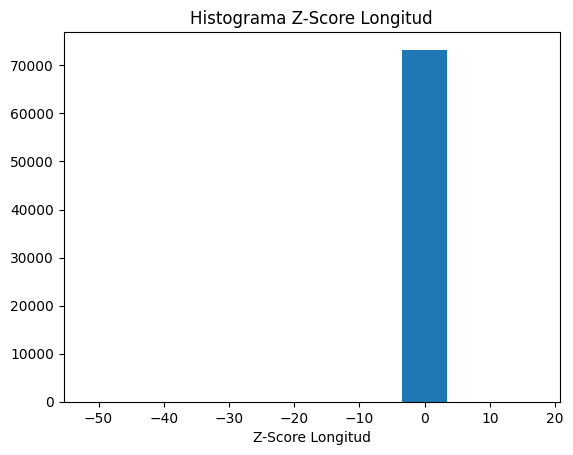

In [135]:
plt.hist(z_longitud_ds.z_longitud)
plt.title('Histograma Z-Score Longitud')
plt.xlabel('Z-Score Longitud')
plt.show()

**Metodo Z Score modificado**

In [136]:
def calculate_modified_zscore_st(dataset, column):
    new_df = dataset.copy()
    mediana = column.median()
    MAD = np.absolute(column - mediana).median()

    new_df[f'zm_{column.name}'] = (column - mediana) * 0.6745 / MAD
    return new_df

**Ambientes**

In [137]:
zm_rooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_rooms)

In [138]:
# Train

print(
    f"Los outliers superiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de rooms en test son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] > 3.5]

Los outliers superiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de rooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

In [139]:
# Train

print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_train.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

# Test


print(
    f"Los outliers inferiores de rooms en train son: {len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5])}. Constituyen al {(len(zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]) * 100) // len(ds_test.property_rooms)}% de los datos")
zm_rooms_ds[zm_rooms_ds['zm_property_rooms'] < -3.5]

Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de rooms en train son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_rooms]
Index: []

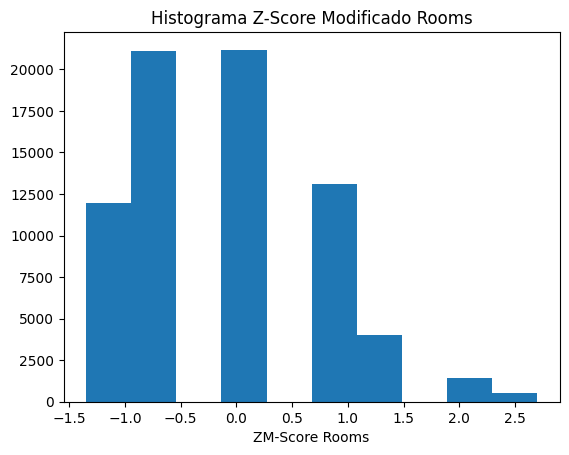

In [140]:
plt.hist(zm_rooms_ds.zm_property_rooms)
plt.title('Histograma Z-Score Modificado Rooms')
plt.xlabel('ZM-Score Rooms')
plt.show()

**Habitaciones**

In [141]:
zm_bedrooms_ds = calculate_modified_zscore_st(ds_train, ds_train.property_bedrooms)

In [142]:
# Train

print(
    f"Los outliers superiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

# Test

print(
    f"Los outliers superiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] > 3.5]

Los outliers superiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers superiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

In [143]:
# Train

print(
    f"Los outliers inferiores de bedrooms en train son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_train.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

# Test

print(
    f"Los outliers inferiores de bedrooms en test son: {len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5])}. Constituyen al {(len(zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]) * 100) // len(ds_test.property_bedrooms)}% de los datos")
zm_bedrooms_ds[zm_bedrooms_ds['zm_property_bedrooms'] < -3.5]

Los outliers inferiores de bedrooms en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de bedrooms en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_bedrooms]
Index: []

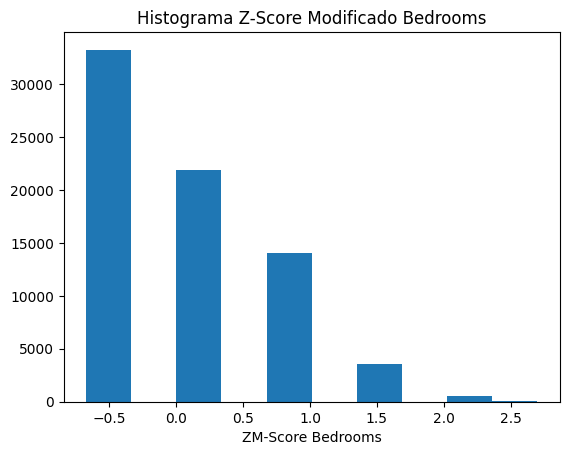

In [144]:
plt.hist(zm_bedrooms_ds.zm_property_bedrooms)
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.xlabel('ZM-Score Bedrooms')
plt.show()

**Superficie Total**

In [145]:
zm_total_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_total)
zm_total_ds.head()

id  start_date    end_date    latitud  \
398876  T2FRplBuQeDugP19ZRgAPA==  2021-02-13  2021-03-03 -34.605539   
147805  g8aVOW2Z17bZJR1e6g4t3A==  2021-08-19  2021-09-02 -34.609767   
318917  XoCYZbNzXTjmPygod5MNSQ==  2021-03-17  2021-06-05 -34.583755   
204125  0jVg3F5shORKa7kKi1Z+9Q==  2021-05-10  2021-06-05 -34.591590   
295805  G+PIgKq69d7VmKc9kqyjZQ==  2021-07-23  2021-08-23 -34.609359   

         longitud   place_l3 property_type  property_rooms  property_bedrooms  \
398876 -58.458807  Caballito  Departamento             1.0                1.0   
147805 -58.446246  Caballito  Departamento             2.0                1.0   
318917 -58.443697    Palermo  Departamento             1.0                1.0   
204125 -58.385946   Recoleta  Departamento             4.0                4.0   
295805 -58.383336  Monserrat  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
398876                    51.0                      46.0         82080.0   
147805                    43.0                      40.0         92000.0   
318917                    35.0                      31.0         93913.0   
204125                   171.0                     163.0        598000.0   
295805                    24.0                      24.0         47000.0   

                                           property_title  \
398876         Departamento 120 Cuotas en Pesos Caballito   
147805  Depto,2 Amb.,Villa Crespo,Cid.Balcon,Pileta,Se...   
318917                   Departamento - Palermo Hollywood   
204125    SEMIPISO ALTO AL FRENTE TODO LUZ Y SOL. COCHERA   
295805         Av. DE MAYO 1200- MONOAMB. C/BALCÓN 28mts2   

        zm_property_surface_total  
398876                  -0.393458  
147805                  -0.618292  
318917                  -0.843125  
204125                   2.979042  
295805                  -1.152271

In [146]:
# Train

print(
    f"Los outliers superiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] > 3.5]

Los outliers superiores de sup total en train son: 5384. Constituyen al 7% de los datos
Los outliers superiores de sup total en test son: 5384. Constituyen al 30% de los datos


id  start_date    end_date    latitud  \
133599  BXS66QYr8h+E6T8f9vbFYw==  2021-02-18  2021-08-12 -34.592798   
35764   h1P0tQzKJSfoRPMgLFg9Og==  2021-02-08  2021-03-16 -34.636179   
317957  lG+BZ5ASTZ71W+B4qdzGlg==  2021-02-28  2021-06-05 -34.591182   
411520  z1qM15jZhqAOt74rOMjIQg==  2021-03-02  2021-03-11 -34.590568   
71281   NMtOaLppqJjjOwNx41Fhew==  2021-01-10  2021-05-09 -34.565572   
...                          ...         ...         ...        ...   
206076  4IHUinz/gMcT2/LDgal0ug==  2021-03-09  2021-06-05 -34.547926   
101946  gB74DypGoLJfZ0nCqEF6Gg==  2021-05-28  2021-06-18 -34.546798   
252001  8Vg3lYAepaNzxo7oZth1yg==  2021-06-18  2022-06-03 -34.628774   
84099   OLA4jKUkGxUeBXVjCqA0Yw==  2021-02-05  2021-06-18 -34.592899   
391738  liluDkjRYQmoYG9aECoZ2g==  2021-10-28  2022-01-27 -34.631337   

         longitud          place_l3 property_type  property_rooms  \
133599 -58.406262          Recoleta  Departamento             4.0   
35764  -58.437402  Parque Chacabuco          Casa             5.0   
317957 -58.378620            Retiro  Departamento             5.0   
411520 -58.384887          Recoleta  Departamento             6.0   
71281  -58.433364          Belgrano  Departamento             5.0   
...           ...               ...           ...             ...   
206076 -58.456212             Nuñez  Departamento             4.0   
101946 -58.480526          Saavedra          Casa             5.0   
252001 -58.501759          Floresta          Casa             5.0   
84099  -58.387719          Recoleta  Departamento             6.0   
391738 -58.419145             Boedo          Casa             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
133599                3.0                   212.0                     107.0   
35764                 3.0                   280.0                     280.0   
317957                4.0                   260.0                     260.0   
411520                4.0                   313.0                     243.0   
71281                 3.0                   250.0                     250.0   
...                   ...                     ...                       ...   
206076                3.0                   411.0                     270.0   
101946                4.0                   328.0                     257.0   
252001                3.0                   333.0                     148.0   
84099                 3.0                   343.0                     263.0   
391738                3.0                   200.0                     200.0   

        property_price                                     property_title  \
133599        370000.0  Venta semipiso único en Recoleta, 4 ambientes,...   
35764         310000.0              Casa y Local, Venta, Parque Chacabuco   
317957        800000.0  Departamento - Retiro 5 ambientes amenities co...   
411520       1050000.0  Venta Departamento Recoleta semipiso sobre Alv...   
71281         790000.0                            Departamento - Belgrano   
...                ...                                                ...   
206076       2100000.0  Espectacular Duplex 411m2 - Chateau Libertador...   
101946        330000.0   VENTA CASA 5 AMBIENTES SAAVEDRA A REFACC-PERMUTA   
252001        334900.0                             Casa - Velez Sarsfield   
84099         995000.0                                   Juncal y Uruguay   
391738        225000.0                                       Casa - Boedo   

        zm_property_surface_total  
133599                   4.131312  
35764                    6.042396  
317957                   5.480313  
411520                   6.969833  
71281                    5.199271  
...                           ...  
206076                   9.724042  
101946                   7.391396  
252001                   7.531917  
84099                    7.812958  
391738                   3.794063  

[5384 rows x 14 columns]

In [147]:
# Train

print(
    f"Los outliers inferiores de sup total en train son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_train.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup total en test son: {len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5])}. Constituyen al {(len(zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]) * 100) // len(ds_test.property_surface_total)}% de los datos")
zm_total_ds[zm_total_ds['zm_property_surface_total'] < -3.5]

Los outliers inferiores de sup total en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup total en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_total]
Index: []

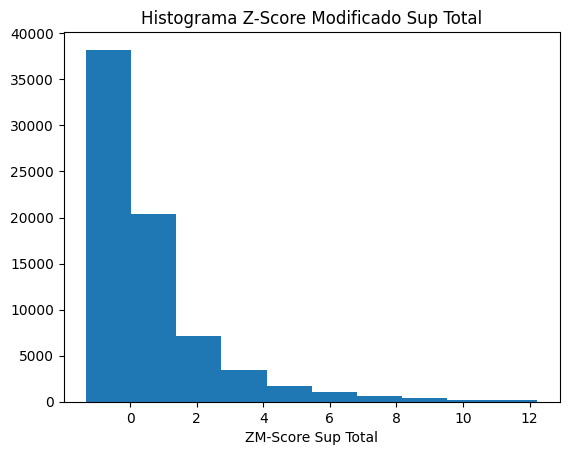

In [148]:
plt.hist(zm_total_ds.zm_property_surface_total)
plt.title('Histograma Z-Score Modificado Sup Total')
plt.xlabel('ZM-Score Sup Total')
plt.show()

**Superficie Cubierta**

In [149]:
zm_covered_ds = calculate_modified_zscore_st(ds_train, ds_train.property_surface_covered)

In [150]:
# Train

print(
    f"Los outliers superiores de sup cubierta en train son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

# Test

print(
    f"Los outliers superiores de sup cubierta en test son: {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] > 3.5]

Los outliers superiores de sup cubierta en train son: 7% de los datos
Los outliers superiores de sup cubierta en test son: 29% de los datos


id  start_date    end_date    latitud  \
204125  0jVg3F5shORKa7kKi1Z+9Q==  2021-05-10  2021-06-05 -34.591590   
35764   h1P0tQzKJSfoRPMgLFg9Og==  2021-02-08  2021-03-16 -34.636179   
317957  lG+BZ5ASTZ71W+B4qdzGlg==  2021-02-28  2021-06-05 -34.591182   
411520  z1qM15jZhqAOt74rOMjIQg==  2021-03-02  2021-03-11 -34.590568   
71281   NMtOaLppqJjjOwNx41Fhew==  2021-01-10  2021-05-09 -34.565572   
...                          ...         ...         ...        ...   
101946  gB74DypGoLJfZ0nCqEF6Gg==  2021-05-28  2021-06-18 -34.546798   
84099   OLA4jKUkGxUeBXVjCqA0Yw==  2021-02-05  2021-06-18 -34.592899   
401396  pkFsJqG0D6FfHn+lHeeVjw==  2021-06-17  2021-08-20 -34.587121   
219211  yZ1q8SipMwHAKNK0xa1ApQ==  2021-10-23  2022-05-05 -34.628091   
391738  liluDkjRYQmoYG9aECoZ2g==  2021-10-28  2022-01-27 -34.631337   

         longitud          place_l3 property_type  property_rooms  \
204125 -58.385946          Recoleta  Departamento             4.0   
35764  -58.437402  Parque Chacabuco          Casa             5.0   
317957 -58.378620            Retiro  Departamento             5.0   
411520 -58.384887          Recoleta  Departamento             6.0   
71281  -58.433364          Belgrano  Departamento             5.0   
...           ...               ...           ...             ...   
101946 -58.480526          Saavedra          Casa             5.0   
84099  -58.387719          Recoleta  Departamento             6.0   
401396 -58.417044           Palermo  Departamento             5.0   
219211 -58.416832             Boedo          Casa             6.0   
391738 -58.419145             Boedo          Casa             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
204125                4.0                   171.0                     163.0   
35764                 3.0                   280.0                     280.0   
317957                4.0                   260.0                     260.0   
411520                4.0                   313.0                     243.0   
71281                 3.0                   250.0                     250.0   
...                   ...                     ...                       ...   
101946                4.0                   328.0                     257.0   
84099                 3.0                   343.0                     263.0   
401396                4.0                   185.0                     164.0   
219211                5.0                   165.0                     165.0   
391738                3.0                   200.0                     200.0   

        property_price                                     property_title  \
204125        598000.0    SEMIPISO ALTO AL FRENTE TODO LUZ Y SOL. COCHERA   
35764         310000.0              Casa y Local, Venta, Parque Chacabuco   
317957        800000.0  Departamento - Retiro 5 ambientes amenities co...   
411520       1050000.0  Venta Departamento Recoleta semipiso sobre Alv...   
71281         790000.0                            Departamento - Belgrano   
...                ...                                                ...   
101946        330000.0   VENTA CASA 5 AMBIENTES SAAVEDRA A REFACC-PERMUTA   
84099         995000.0                                   Juncal y Uruguay   
401396        415000.0    Increíble Dúplex de 185m2 en Corazón de Palermo   
219211        280000.0                                       Casa - Boedo   
391738        225000.0                                       Casa - Boedo   

        zm_property_surface_covered  
204125                     3.574850  
35764                      7.520675  
317957                     6.846175  
411520                     6.272850  
71281                      6.508925  
...                             ...  
101946                     6.745000  
84099                      6.947350  
401396                     3.608575  
219211                     3.642300  
391738                     4.822675  

[5231 rows x 14 c

In [151]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_train.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5])}. Constituyen al {(len(zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]) * 100) // len(ds_test.property_surface_covered)}% de los datos")
zm_covered_ds[zm_covered_ds['zm_property_surface_covered'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 0. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 0. Constituyen al 0% de los datos


Empty DataFrame
Columns: [id, start_date, end_date, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, property_title, zm_property_surface_covered]
Index: []

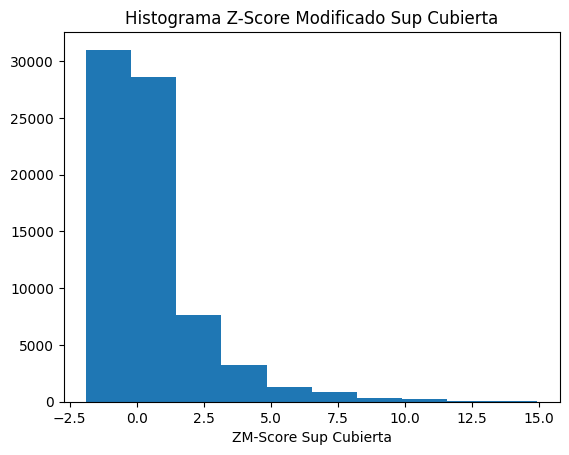

In [152]:
plt.hist(zm_covered_ds.zm_property_surface_covered)
plt.title('Histograma Z-Score Modificado Sup Cubierta')
plt.xlabel('ZM-Score Sup Cubierta')
plt.show()

**Latitud y longitud**

In [153]:
zm_latitud_ds = calculate_modified_zscore_st(ds_train, ds_train.latitud)

In [154]:
# Train

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de latitud son: {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] > 3.5]

Los outliers superiores de latitud son: 0% de los datos
Los outliers superiores de latitud son: 0% de los datos


id  start_date    end_date    latitud  \
25574   5AF0wjAb/TIyttOJjURixw==  2021-06-24  2022-02-09 -33.081030   
9156    pY/8UqUbnzAmyeHnEDPDIQ==  2021-05-18  2021-11-04 -31.390431   
234297  sb4Ig0U4gDt4iOEpTW4R9w==  2021-06-02  2021-06-05 -31.302107   
234899  wW3sjHf50MGk2LR+CzvLTQ==  2021-06-02  2021-06-13 -33.081689   
190751  7o/0rc85DcjL/u3bj88vzg==  2021-11-01  2022-01-27 -31.355688   
...                          ...         ...         ...        ...   
134196  s3z8Y8u6UYiGamjl7GKWUA==  2021-04-06  2021-04-25 -27.581620   
288009  1TJ0s3IktNaEYX2+hRurSw==  2021-02-25  2021-03-01 -33.081030   
190864  y77imFw2Qpe40Ah1ez0Q9g==  2021-11-01  2022-01-27 -31.668812   
190837  lbkcXjbTF75T6OaMET9cTA==  2021-11-01  2022-01-27 -31.363175   
308524  5gULcuCymCY+LG4gkqts3w==  2021-04-28  2021-07-17 -33.081030   

         longitud place_l3 property_type  property_rooms  property_bedrooms  \
25574  -68.468140      NaN  Departamento             3.0                2.0   
9156   -64.179004      NaN  Departamento             1.0                1.0   
234297 -64.254654      NaN          Casa             4.0                3.0   
234899 -68.468828      NaN  Departamento             1.0                1.0   
190751 -64.312929      NaN            PH             2.0                1.0   
...           ...      ...           ...             ...                ...   
134196 -56.682310      NaN          Casa             4.0                2.0   
288009 -68.468140      NaN          Casa             4.0                3.0   
190864 -63.881342      NaN          Casa             3.0                2.0   
190837 -64.341195      NaN          Casa             3.0                2.0   
308524 -68.468140      NaN  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
25574                     66.0                      60.0         75000.0   
9156                      38.0                      38.0         55000.0   
234297                   360.0                     145.0        155000.0   
234899                    42.0                      37.0         54000.0   
190751                    55.0                      50.0         35000.0   
...                        ...                       ...             ...   
134196                   105.0                     105.0        200000.0   
288009                   108.0                     108.0        220000.0   
190864                   135.0                      73.0         30000.0   
190837                   300.0                     125.0         91900.0   
308524                    49.0                      44.0         57000.0   

                                           property_title  zm_latitud  
25574     Venta 3 ambientes San Martín Centro Gran VISTA    53.695766  
9156    Depto en VENTA 1 dormitorio + cochera - Merlo ...  113.644044  
234297    Comarca de Allende , escritura , Recibo menor !  116.776001  
234899  MONOAMBIENTE A ESTRENAR C/AMENITIES. VISTA ABI...   53.672381  
190751                        Housing  en Cuesta Colorada  114.876032  
...                                                   ...         ...  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación  248.703641  
288009         VENTA  CASA  4  AMB  CON  PATIO / PLAYROOM   53.695766  
190864          Imperdibles duplex! Financiación propia!!  103.772719  
190837           HERMOSA CASA 2 DORM EN BARRIO LOS PRADOS  114.610536  
308524  Oportunidad, dpto.  3 amb en condominio c/cochera   53.695766  

[75 rows x 14 columns]

In [155]:
# Train

print(
    f"Los outliers inferiores de sup cubierta en train son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_train.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de sup cubierta en test son: {len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5])}. Constituyen al {(len(zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]) * 100) // len(ds_test.latitud)}% de los datos")
zm_latitud_ds[zm_latitud_ds['zm_latitud'] < -3.5]

Los outliers inferiores de sup cubierta en train son: 28. Constituyen al 0% de los datos
Los outliers inferiores de sup cubierta en test son: 28. Constituyen al 0% de los datos


id  start_date    end_date    latitud  \
146879  d25d7RgaAYPDgDV2L7hxiA==  2021-08-19  2021-08-27 -34.694062   
213454  VclxezEG7N4h+PBg5Dg5jA==  2021-06-03  2021-06-18 -34.694062   
171545  2IMMhWMUVZd6htI0Xo9m8Q==  2021-04-19  2021-06-05 -34.694322   
270589  tQfZpYXLoOwWd990nrLpBg==  2021-07-13  2021-10-16 -34.694451   
106297  oqSIUrrkBRMakJoEW/hYPg==  2021-03-11  2021-06-05 -41.086352   
250707  n/VGq/lp+AH1XRd4RSHphg==  2021-04-29  2021-05-15 -34.698989   
15816   Lqn4md2saTIqk1nSZ8+MXg==  2021-04-22  2021-04-25 -34.694062   
25281   z1w0RvkvD+O+9fEwEU65KQ==  2021-06-24  2021-07-03 -34.694062   
65844   0tGMaOsXgkOAnx8GSH1pmA==  2021-05-15  2021-05-25 -34.698989   
333366  aN+caRwr6laNeGIm8iZd9Q==  2021-09-17  2021-09-18 -34.694062   
324200  SSbx+/6MNgxE6rIDYPA0+A==  2021-03-03  2021-06-05 -38.940227   
411779  jt4VEm3y2Ktb573eFDHQUw==  2021-03-02  2021-03-12 -34.698989   
10486   urWyn9L7ma60VBO8Ru6Xew==  2021-01-13  9999-12-31 -41.163826   
155333  j+0Iyd6D8YGQxE3u+nJiQQ==  2021-04-05  2021-04-15 -41.164123   
208085  2Xn6RKpg2Fps+wLCsSJavw==  2021-02-01  9999-12-31 -41.085373   
208451  r5h8YGMTL3OG6u8wekYDWg==  2021-02-01  2021-05-02 -34.694366   
308365  j4l0DxeSfN6KnNMYSo6bSg==  2021-04-28  2021-05-01 -34.694900   
317537  x1BlLb49Up0aSX9yuzhrMw==  2021-09-29  2022-03-25 -34.698989   
410404  KeQ40Z6VTXMHoq4j8oOp+A==  2021-03-02  2021-06-05 -38.964493   
8802    Bvx15ijE/oSwZrBaowoSaQ==  2021-05-18  2021-05-19 -34.694062   
271609  pMxqmA1WxzslUoiQPG4qFg==  2021-06-19  2021-07-05 -34.694451   
131188  Qmi68tFcN9DiyOJjVmGvYg==  2021-05-27  2021-06-05 -41.083002   
105792  LHDYXTfhEERw7S90k5WA+Q==  2021-03-11  2021-06-05 -41.084900   
431958  KcYM9EqNffHbcXZT+GcNaQ==  2021-12-16  2022-02-09 -34.694062   
82540   j0CggSFoqC9J+F1N9h91wg==  2021-03-12  2021-03-13 -34.698989   
161352  GsZ5hegnoxnRL4wSr7DRag==  2021-10-07  2021-11-02 -34.694062   
457631  ZskNGaMaM9MxJ4seQfgjtg==  2021-05-08  2021-08-08 -53.788624   
351916  BKk+pz+G7Tajvr6LE+9UZw==  2021-06-25  2021-07-17 -34.694900   

         longitud         place_l3 property_type  property_rooms  \
146879 -58.466105  Villa Riachuelo          Casa             4.0   
213454 -58.466105  Villa Riachuelo          Casa             4.0   
171545 -58.469549     Villa Lugano            PH             3.0   
270589 -58.467532     Villa Lugano          Casa             3.0   
106297 -71.185720              NaN  Departamento             2.0   
250707 -58.469994  Villa Riachuelo  Departamento             4.0   
15816  -58.466105  Villa Riachuelo          Casa             4.0   
25281  -58.466105  Villa Riachuelo          Casa             4.0   
65844  -58.469994  Villa Riachuelo  Departamento             4.0   
333366 -58.466105  Villa Riachuelo          Casa             5.0   
324200 -68.073865              NaN  Departamento             3.0   
411779 -58.469994  Villa Riachuelo  Departamento             4.0   
10486  -71.438923              NaN          Casa             4.0   
155333 -71.415420              NaN          Casa             3.0   
208085 -71.185766              NaN  Departamento             2.0   
208451 -58.468208     Villa Lugano  Departamento             2.0   
308365 -58.469161     Villa Lugano          Casa             2.0   
317537 -58.469994  Villa Riachuelo  Departamento             4.0   
410404 -68.075830              NaN          Casa             7.0   
8802   -58.466105  Villa Riachuelo          Casa             4.0   
271609 -58.467532     Villa Lugano          Casa             3.0   
131188 -71.182747              NaN  Departamento             2.0   
105792 -71.187159              NaN  Departamento             1.0   
431958 -58.466105  Villa Riachuelo          Casa             5.0   
82540  -58.469994  Villa Riachuelo  Departamento             4.0   
161352 -58.466105  Villa Riachuelo          Casa             5.0   
457631 -67.718089              NaN  Departamento             3.0   
351916 -58.469161     Villa Lugano          Casa             2.0  

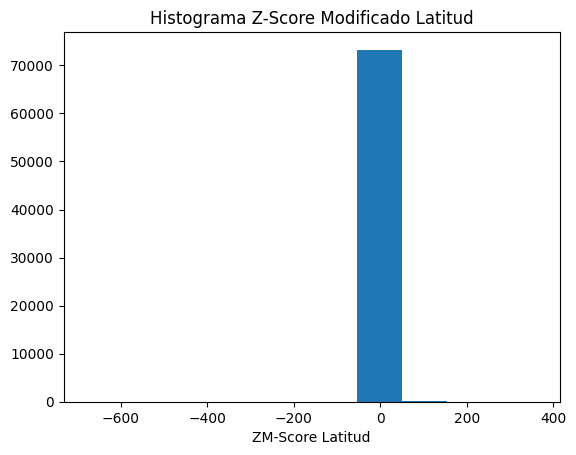

In [156]:
plt.hist(zm_latitud_ds.zm_latitud)
plt.title('Histograma Z-Score Modificado Latitud')
plt.xlabel('ZM-Score Latitud')
plt.show()

In [157]:
zm_longitud_ds = calculate_modified_zscore_st(ds_train, ds_train.longitud)

In [158]:
# Train

print(
    f"Los outliers superiores de longitud en train son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

# Test

print(
    f"Los outliers superiores de longitud en test son: {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] > 3.5]

Los outliers superiores de longitud en train son: 0% de los datos
Los outliers superiores de longitud en test son: 0% de los datos


id  start_date    end_date   latitud   longitud  \
220851  /4CiKZFK0D3wJRClv4OO8Q==  2021-06-30  2021-07-02 -27.58162 -56.682310   
405382  C7g/npsqWoeBtBCNr0injg==  2021-01-07  2021-01-09 -26.61667 -54.133330   
234893  FmDOCgqTy/T9iZXvORmyuw==  2021-06-02  2021-06-18 -27.63119 -55.496357   
187631  kQaGoFd//JEG6YJEilDGzg==  2021-06-05  2021-08-26 -29.68992 -57.556660   
241662  MKUbLxaAzotEHRijSe9a0w==  2021-04-01  2021-04-19 -26.61667 -54.133330   
134196  s3z8Y8u6UYiGamjl7GKWUA==  2021-04-06  2021-04-25 -27.58162 -56.682310   

       place_l3 property_type  property_rooms  property_bedrooms  \
220851      NaN          Casa             4.0                2.0   
405382      NaN          Casa             3.0                2.0   
234893      NaN  Departamento             4.0                3.0   
187631      NaN  Departamento             5.0                4.0   
241662      NaN          Casa             4.0                3.0   
134196      NaN          Casa             4.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
220851                   105.0                     105.0        190000.0   
405382                   205.0                     102.0        125000.0   
234893                    98.0                      88.0        269000.0   
187631                   158.0                     150.0        380000.0   
241662                   230.0                     200.0        255000.0   
134196                   105.0                     105.0        200000.0   

                                           property_title  zm_longitud  
220851       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.415051  
405382      Depto Venta, Fincas de San Vicente II,  3 amb   103.967533  
234893  Venta departamento 4 amb Vicente Lopez con cochea    71.053310  
187631  5 Ambientes, 4 baños, AMENITIES, Talar de Mart...    21.301345  
241662  Venta casa  barrio  cerrado Santa Rita 4 ambie...   103.967533  
134196       Casa jardín 2 dorm escrit. a 1 cdra Estación    42.415051

In [159]:
# Train

print(
    f"Los outliers inferiores de longitud en train son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_train.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

# Test

print(
    f"Los outliers inferiores de longitud en test son: {len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5])}. Constituyen al {(len(zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]) * 100) // len(ds_test.longitud)}% de los datos")
zm_longitud_ds[zm_longitud_ds['zm_longitud'] < -3.5]

Los outliers inferiores de longitud en train son: 78. Constituyen al 0% de los datos
Los outliers inferiores de longitud en test son: 78. Constituyen al 0% de los datos


id  start_date    end_date    latitud  \
25574   5AF0wjAb/TIyttOJjURixw==  2021-06-24  2022-02-09 -33.081030   
9156    pY/8UqUbnzAmyeHnEDPDIQ==  2021-05-18  2021-11-04 -31.390431   
234297  sb4Ig0U4gDt4iOEpTW4R9w==  2021-06-02  2021-06-05 -31.302107   
234899  wW3sjHf50MGk2LR+CzvLTQ==  2021-06-02  2021-06-13 -33.081689   
190751  7o/0rc85DcjL/u3bj88vzg==  2021-11-01  2022-01-27 -31.355688   
...                          ...         ...         ...        ...   
288009  1TJ0s3IktNaEYX2+hRurSw==  2021-02-25  2021-03-01 -33.081030   
190864  y77imFw2Qpe40Ah1ez0Q9g==  2021-11-01  2022-01-27 -31.668812   
190837  lbkcXjbTF75T6OaMET9cTA==  2021-11-01  2022-01-27 -31.363175   
457631  ZskNGaMaM9MxJ4seQfgjtg==  2021-05-08  2021-08-08 -53.788624   
308524  5gULcuCymCY+LG4gkqts3w==  2021-04-28  2021-07-17 -33.081030   

         longitud place_l3 property_type  property_rooms  property_bedrooms  \
25574  -68.468140      NaN  Departamento             3.0                2.0   
9156   -64.179004      NaN  Departamento             1.0                1.0   
234297 -64.254654      NaN          Casa             4.0                3.0   
234899 -68.468828      NaN  Departamento             1.0                1.0   
190751 -64.312929      NaN            PH             2.0                1.0   
...           ...      ...           ...             ...                ...   
288009 -68.468140      NaN          Casa             4.0                3.0   
190864 -63.881342      NaN          Casa             3.0                2.0   
190837 -64.341195      NaN          Casa             3.0                2.0   
457631 -67.718089      NaN  Departamento             3.0                2.0   
308524 -68.468140      NaN  Departamento             3.0                2.0   

        property_surface_total  property_surface_covered  property_price  \
25574                     66.0                      60.0         75000.0   
9156                      38.0                      38.0         55000.0   
234297                   360.0                     145.0        155000.0   
234899                    42.0                      37.0         54000.0   
190751                    55.0                      50.0         35000.0   
...                        ...                       ...             ...   
288009                   108.0                     108.0        220000.0   
190864                   135.0                      73.0         30000.0   
190837                   300.0                     125.0         91900.0   
457631                   121.0                     100.0        375000.0   
308524                    49.0                      44.0         57000.0   

                                           property_title  zm_longitud  
25574     Venta 3 ambientes San Martín Centro Gran VISTA   -242.187846  
9156    Depto en VENTA 1 dormitorio + cochera - Merlo ...  -138.614275  
234297    Comarca de Allende , escritura , Recibo menor !  -140.441060  
234899  MONOAMBIENTE A ESTRENAR C/AMENITIES. VISTA ABI...  -242.204464  
190751                        Housing  en Cuesta Colorada  -141.848278  
...                                                   ...          ...  
288009         VENTA  CASA  4  AMB  CON  PATIO / PLAYROOM  -242.187846  
190864          Imperdibles duplex! Financiación propia!!  -131.426365  
190837           HERMOSA CASA 2 DORM EN BARRIO LOS PRADOS  -142.530842  
457631                Depto 3 ambientes Arboris Las Lomas  -224.075699  
308524  Oportunidad, dpto.  3 amb en condominio c/cochera  -242.187846  

[78 rows x 14 columns]

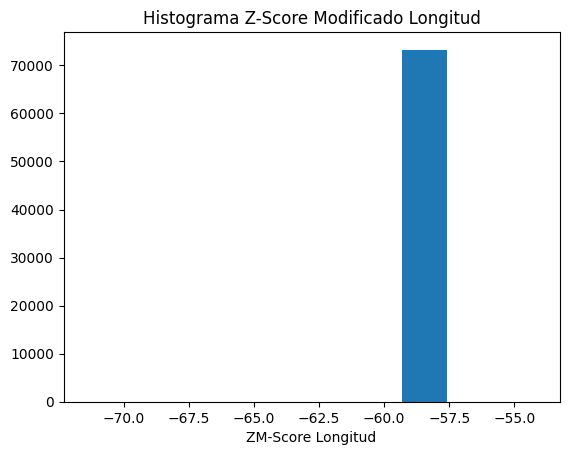

In [160]:
plt.hist(zm_longitud_ds.longitud)
plt.title('Histograma Z-Score Modificado Longitud')
plt.xlabel('ZM-Score Longitud')
plt.show()

#### Multivariados

**Clustering - Mahalanobis**

In [161]:
def calculate_mahalanobis_distance(dataset, col1, col2):
    X = dataset[[f'{col1}', f'{col2}']].copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]

    return X

In [162]:
def create_scatter_plot(dataset, col1, col2):
    #Scatter Plot
    plt.scatter(dataset[col1], dataset[col2])
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

In [163]:
def create_scattergram(dataset, col1, col2, outlier_limit):
    #Grafico scatter
    es_outlier = (dataset['mahalanobis'] > outlier_limit)

    sns.scatterplot(x=dataset[col1], y=dataset[col2], hue=es_outlier)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
    plt.title(f'Dispersograma {col1} vs {col2}')
    plt.show()

**Analisis entre ambientes y habitaciones de valores atipicos**

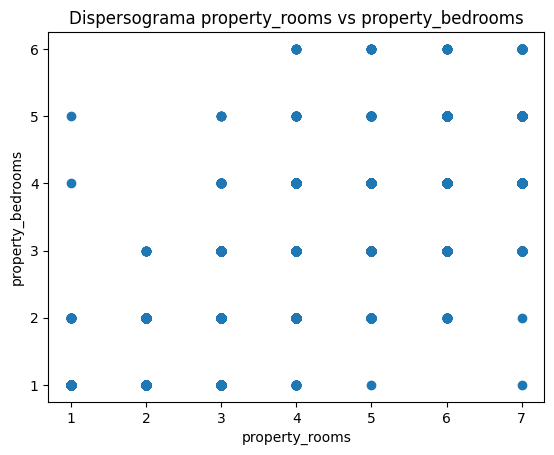

In [164]:
create_scatter_plot(ds_train, 'property_rooms', 'property_bedrooms')

In [165]:
mahalanobis_rooms_bedrooms_train = calculate_mahalanobis_distance(ds_train, 'property_rooms', 'property_bedrooms')
mahalanobis_rooms_bedrooms_test = calculate_mahalanobis_distance(ds_test, 'property_rooms', 'property_bedrooms')

mahalanobis_rooms_bedrooms_train.head()

property_rooms  property_bedrooms  mahalanobis
398876             1.0                1.0     2.918887
147805             2.0                1.0     1.153687
318917             1.0                1.0     2.918887
204125             4.0                4.0    12.096274
295805             1.0                1.0     2.918887

<AxesSubplot: ylabel='mahalanobis'>

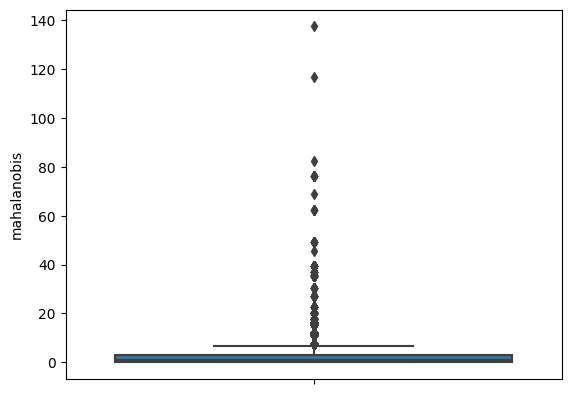

In [166]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train.mahalanobis)

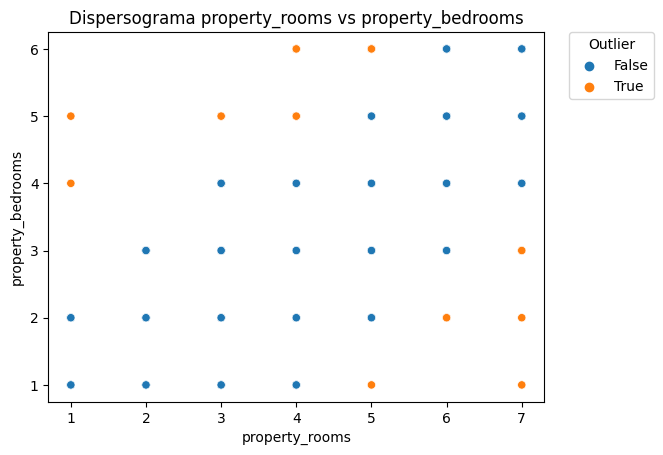

Los outliers para mahalanobis con un umbral de 35 son: 150. Constituyen el 0% de los datos


In [167]:
umbral = 35
create_scattergram(mahalanobis_rooms_bedrooms_train, 'property_rooms', 'property_bedrooms', umbral)

print(
    f"Los outliers para mahalanobis con un umbral de {umbral} son: {len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral])}. Constituyen el {(len(mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]) * 100) // len(ds_train)}% de los datos")

<AxesSubplot: ylabel='mahalanobis'>

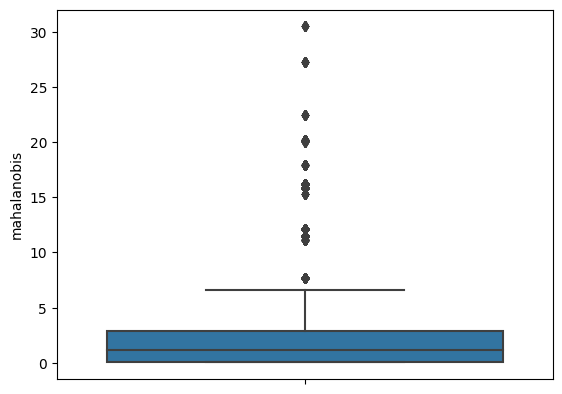

In [168]:
sns.boxplot(y=mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] < umbral].mahalanobis)

In [169]:
mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral]

property_rooms  property_bedrooms  mahalanobis
329904             7.0                3.0    35.466444
107724             6.0                2.0    39.261225
4274               7.0                3.0    35.466444
366235             7.0                3.0    35.466444
357165             7.0                3.0    35.466444
...                ...                ...          ...
337805             5.0                6.0    49.112229
150143             3.0                5.0    62.137159
226188             7.0                2.0    68.886381
304998             7.0                3.0    35.466444
350780             7.0                3.0    35.466444

[150 rows x 3 columns]

In [170]:
# Train

indice_outlier_train = mahalanobis_rooms_bedrooms_train[mahalanobis_rooms_bedrooms_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 150 registros en train
Se han eliminado: 14 registros en test


Dispersograma sin los outliers mencionados


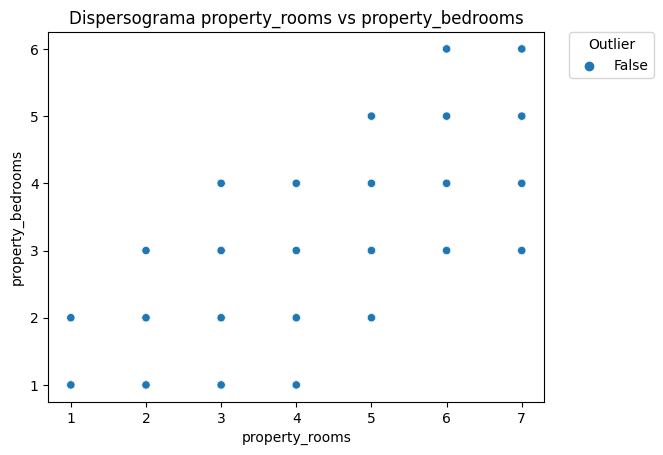

In [171]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_rooms_bedrooms_test[mahalanobis_rooms_bedrooms_test.mahalanobis < umbral],
                   'property_rooms',
                   'property_bedrooms', umbral)

**Analisis entre superficie total y superificie cubierta de valores atipicos**

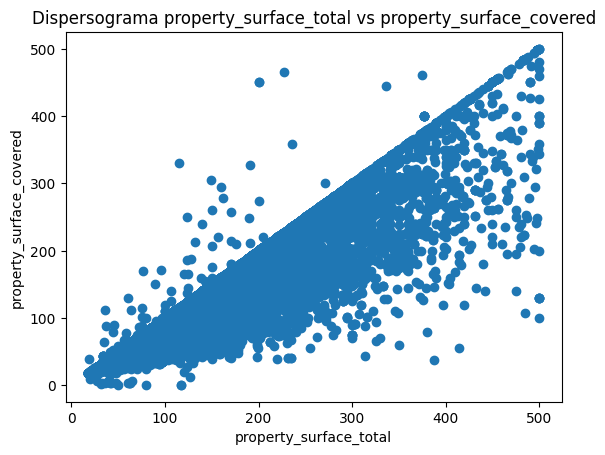

In [172]:
create_scatter_plot(ds_train, 'property_surface_total', 'property_surface_covered')

In [173]:
mahalanobis_surfaces_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total',
                                                            'property_surface_covered')
mahalanobis_surfaces_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total',
                                                           'property_surface_covered')

mahalanobis_surfaces_train.head()

property_surface_total  property_surface_covered  mahalanobis
398876                    51.0                      46.0     0.280482
147805                    43.0                      40.0     0.428563
318917                    35.0                      31.0     0.636174
204125                   171.0                     163.0     3.162370
295805                    24.0                      24.0     0.914685

<AxesSubplot: ylabel='mahalanobis'>

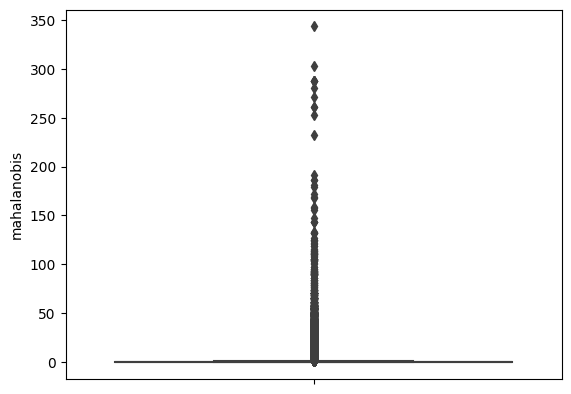

In [174]:
sns.boxplot(y=mahalanobis_surfaces_train.mahalanobis)

In [175]:
mahalanobis_surfaces_train.isna().sum()

property_surface_total      0
property_surface_covered    0
mahalanobis                 0
dtype: int64

In [176]:
#Defino umbral
umbral = 175  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral]

property_surface_total  property_surface_covered  mahalanobis
52066                    380.0                      80.0   191.279656
97055                    500.0                     130.0   287.304203
45540                    420.0                     120.0   186.086251
104359                   200.0                     450.0   260.737128
61175                    500.0                     200.0   179.303072
32735                    485.0                     108.0   302.197090
104592                   200.0                     450.0   260.737128
393711                   414.0                      56.0   280.380726
310407                   388.0                      38.0   271.199425
445383                   500.0                     130.0   287.304203
394706                   227.0                     466.0   252.353411
121279                   500.0                     130.0   287.304203
450430                   442.0                     140.0   186.540434
430838                   350.0                      60.0   181.186357
138208                   500.0                     100.0   343.172294
97083                    500.0                     130.0   287.304203
387598                   475.0                     140.0   232.104763

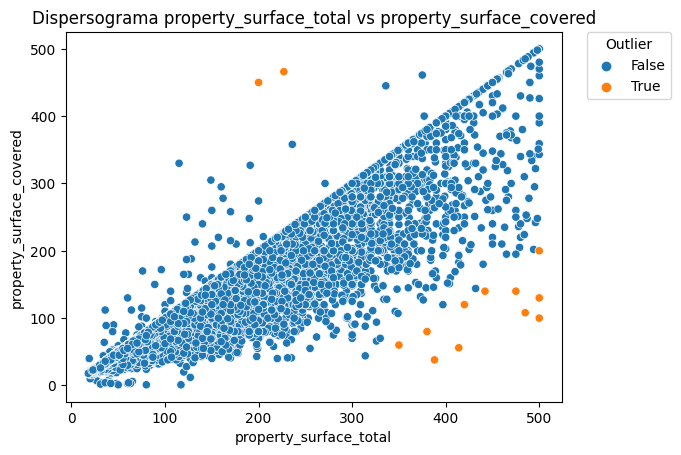

In [177]:
create_scattergram(mahalanobis_surfaces_train, 'property_surface_total', 'property_surface_covered', umbral)

In [178]:
# Train

indice_outlier_train = mahalanobis_surfaces_train[mahalanobis_surfaces_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test

indice_outlier_test = mahalanobis_surfaces_test[mahalanobis_surfaces_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 17 registros en train
Se han eliminado: 2 registros en test


Dispersograma sin los outliers mencionados


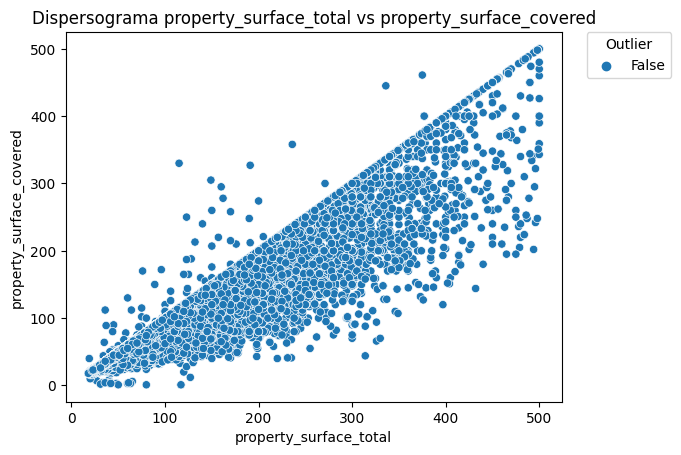

In [179]:
print(f"Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_surfaces_train[mahalanobis_surfaces_train.mahalanobis < umbral],
                   'property_surface_total',
                   'property_surface_covered', umbral)

**Analisis entre latitud y logitud de valores atipicos**

In [180]:
mahalanobis_lat_long_train = calculate_mahalanobis_distance(ds_train, 'latitud', 'longitud')
mahalanobis_lat_long_test = calculate_mahalanobis_distance(ds_test, 'latitud', 'longitud')

In [181]:
#Defino umbral
umbral = 1  # elegimos este umbral de varias pruebas hasta llegar a un grafico de dispersion razonable

#Observaciones anómalas
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]

El mínimo según el umbral es de: 142.35250467739118


latitud   longitud   mahalanobis
25574  -33.081030 -68.468140   2609.194646
9156   -31.390431 -64.179004    873.850027
234297 -31.302107 -64.254654    901.312627
234899 -33.081689 -68.468828   2609.649756
190751 -31.355688 -64.312929    911.530050
...           ...        ...           ...
288009 -33.081030 -68.468140   2609.194646
190864 -31.668812 -63.881342    776.399285
190837 -31.363175 -64.341195    918.290242
457631 -53.788624 -67.718089  19360.542706
308524 -33.081030 -68.468140   2609.194646

[80 rows x 3 columns]

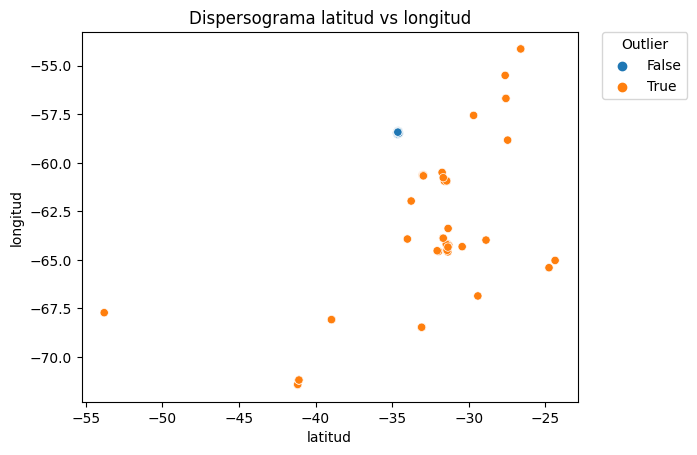

El grafico muestra 80 outliers
El mínimo según el umbral es de: 142.35250467739118


In [182]:
create_scattergram(mahalanobis_lat_long_train, 'latitud', 'longitud', umbral)
print(
    f"El grafico muestra {len(mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral]['mahalanobis'].min()}")

Dispersograma sin los outliers mencionados


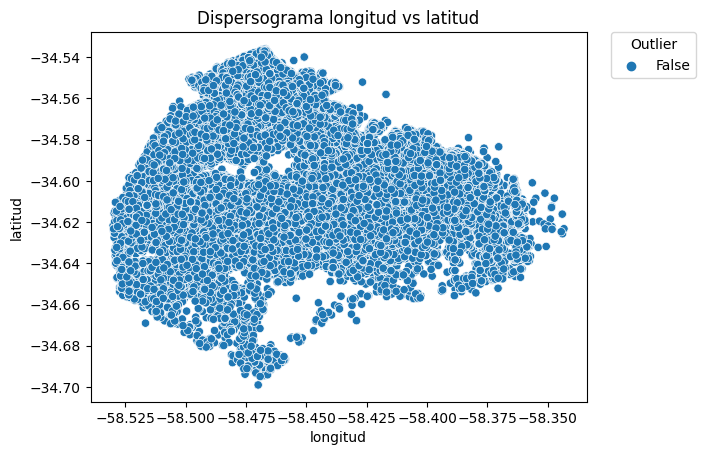

In [183]:
print("Dispersograma sin los outliers mencionados")
create_scattergram(mahalanobis_lat_long_train[mahalanobis_lat_long_train.mahalanobis < umbral], 'longitud', 'latitud',
                   umbral)

In [184]:
# Train

indice_outlier_train = mahalanobis_lat_long_train[mahalanobis_lat_long_train['mahalanobis'] > umbral].index
ds_train.drop(indice_outlier_train, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_train)} registros en train")

# Test


indice_outlier_test = mahalanobis_lat_long_test[mahalanobis_lat_long_test['mahalanobis'] > umbral].index
ds_test.drop(indice_outlier_test, inplace=True)
print(f"Se han eliminado: {len(indice_outlier_test)} registros en test")

Se han eliminado: 80 registros en train
Se han eliminado: 568 registros en test


In [185]:
ds_train.place_l3.isna().sum()

39

In [186]:
ds_train.dropna(subset='place_l3', inplace=True)
ds_train.place_l3.isna().sum()

0

**Analisis entre superficie total y precio**

In [187]:
mahalanobis_price_surface_train = calculate_mahalanobis_distance(ds_train, 'property_surface_total', 'property_price')
mahalanobis_price_surface_test = calculate_mahalanobis_distance(ds_test, 'property_surface_total', 'property_price')

mahalanobis_price_surface_train['mahalanobis'].describe()

count    73046.000000
mean         2.377633
std         59.024621
min          0.000008
25%          0.195080
50%          0.418673
75%          0.738091
max      15591.882182
Name: mahalanobis, dtype: float64

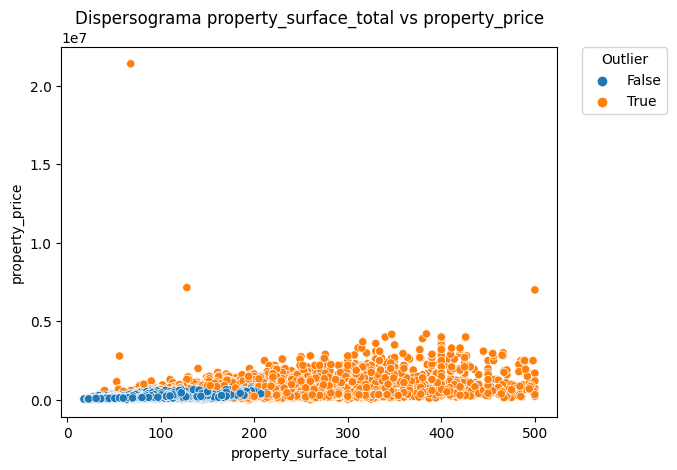

El grafico muestra 5284 outliers
El mínimo según el umbral es de: 5.0070338101242795
Los outliers representan un 7.233797880787449%


In [188]:
umbral = 5
create_scattergram(mahalanobis_price_surface_train, 'property_surface_total', 'property_price', umbral)
print(
    f"El grafico muestra {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral])} outliers")
print(
    f"El mínimo según el umbral es de: {mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]['mahalanobis'].min()}")
print(
    f"Los outliers representan un {len(mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] > umbral]) * 100 / len(ds_train)}%")

<AxesSubplot: ylabel='mahalanobis'>

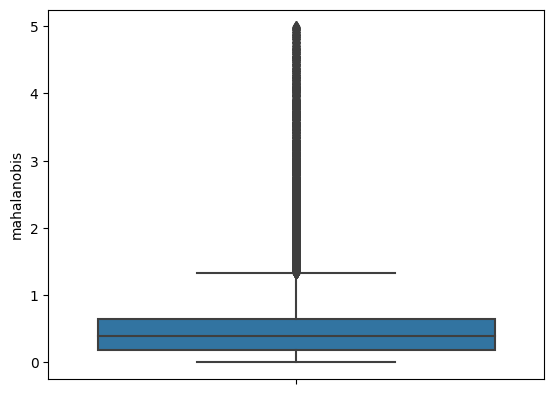

In [189]:
sns.boxplot(y=mahalanobis_price_surface_train[mahalanobis_price_surface_train['mahalanobis'] < umbral].mahalanobis)

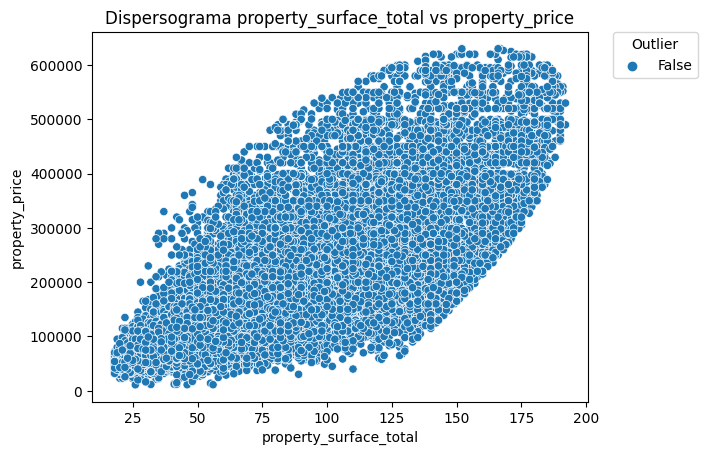

In [190]:
create_scattergram(mahalanobis_price_surface_train[mahalanobis_price_surface_train.mahalanobis < 3],
                   'property_surface_total',
                   'property_price', 3)

In [191]:
mahalanobis_price_surface_train[
    'price_m2'] = mahalanobis_price_surface_train.property_price / mahalanobis_price_surface_train.property_surface_total

mahalanobis_price_surface_test[
    'price_m2'] = mahalanobis_price_surface_test.property_price / mahalanobis_price_surface_test.property_surface_total

cantidad de datos del ds: 73046
outliers encontrados para los price_m2: 3371
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4281.25, limite inf: 331.25


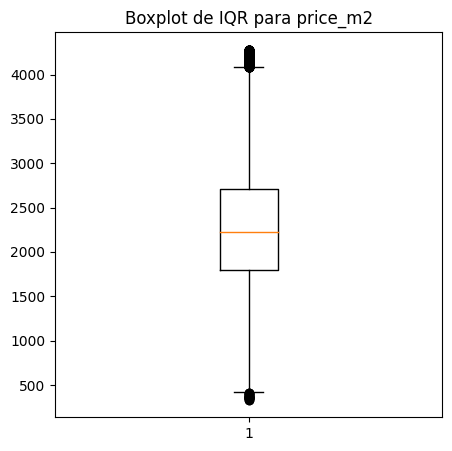

cantidad de datos del ds: 17174
outliers encontrados para los price_m2: 841
hay 4% de outliers de price_m2 sobre el ds
limit sup: 4280.1633298208635, limite inf: 354.9789251844047


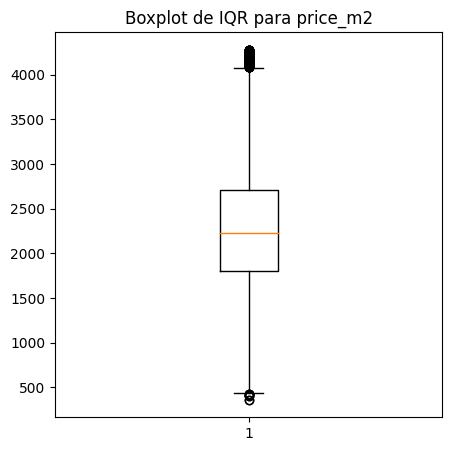

In [192]:
calculate_univariate_iqr(mahalanobis_price_surface_train['price_m2'], mahalanobis_price_surface_train)
calculate_univariate_iqr(mahalanobis_price_surface_test['price_m2'], mahalanobis_price_surface_test)

Hay 3348 registros en train por encima del límite superior en train (4.58341319168743)
Hay 23 registros en train por debajo del límite inferior en train  (0.03148700818662213)
Hay 829 registros en train por encima del límite superior en train (1.1349012950743367)%
Hay 12 registros en train por debajo del límite inferior en train  (0.01642800427128111%)


Text(0.5, 1.0, 'Distribución sin outliers')

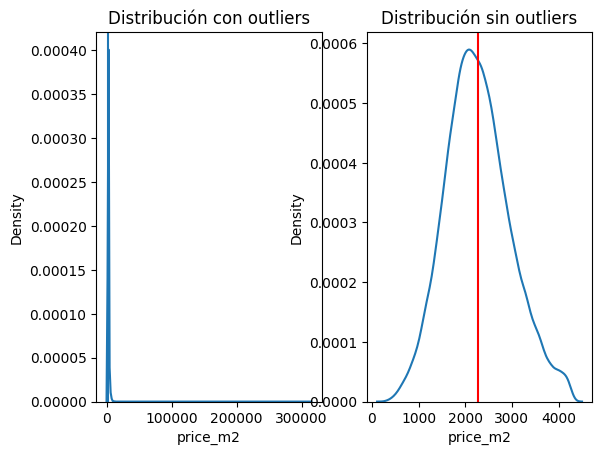

In [193]:
limites = boxplot_outliers_edges(mahalanobis_price_surface_train['price_m2'])
limite_inf = limites[0]
limite_sup = limites[1]
outliers_sup_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 > limite_sup)]
outliers_inf_price_m2_train = mahalanobis_price_surface_train[(mahalanobis_price_surface_train.price_m2 < limite_inf)]

outliers_sup_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 > limite_sup)]
outliers_inf_price_m2_test = mahalanobis_price_surface_test[(mahalanobis_price_surface_test.price_m2 < limite_inf)]

print(
    f"Hay {len(outliers_sup_price_m2_train)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_train) * 100 / len(ds_train)})")
print(
    f"Hay {len(outliers_inf_price_m2_train)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_train) * 100 / len(ds_train)})")

print(
    f"Hay {len(outliers_sup_price_m2_test)} registros en train por encima del límite superior en train ({len(outliers_sup_price_m2_test) * 100 / len(ds_train)})%")
print(
    f"Hay {len(outliers_inf_price_m2_test)} registros en train por debajo del límite inferior en train  ({len(outliers_inf_price_m2_test) * 100 / len(ds_train)}%)")

fig, axs = plt.subplots(ncols=2)

ds_plot = mahalanobis_price_surface_train[
    (mahalanobis_price_surface_train.price_m2 > limite_inf) & (mahalanobis_price_surface_train.price_m2 < limite_sup)]

sns.kdeplot(mahalanobis_price_surface_train.price_m2, ax=axs[0])
sns.kdeplot(ds_plot.price_m2, ax=axs[1])

axs[0].axvline(mahalanobis_price_surface_train.price_m2.mean())
axs[1].axvline(ds_plot.price_m2.mean(), color='red')

axs[0].set_title("Distribución con outliers")
axs[1].set_title("Distribución sin outliers")

In [194]:
# Train

ds_train.drop(outliers_sup_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_sup_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_sup_price_m2_test)} registros en test")

Se han eliminado: 3348 registros en train
Se han eliminado: 829 registros en test


In [195]:
# Train

ds_train.drop(outliers_inf_price_m2_train.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_train)} registros en train")

# Test

ds_test.drop(outliers_inf_price_m2_test.index, inplace=True)
print(f"Se han eliminado: {len(outliers_inf_price_m2_test)} registros en test")

Se han eliminado: 23 registros en train
Se han eliminado: 12 registros en test


#### LOF

In [196]:
def create_scores_based_on_training(dataset, col1, col2):
    #Conjunto de entrenamiento
    dataset = dataset[~(dataset[f'{col1}'].isna())]  # que hago con los NAN? Para la preddicion necesito sacarlos.
    dataset = dataset[~(dataset[f'{col2}'].isna())]

    X = dataset[[f'{col1}', f'{col2}']].values

    #Creo el clasificador
    clf = LocalOutlierFactor(n_neighbors=20)

    #Genero prediccion
    y_pred = clf.fit_predict(X)

    #Guardo los scores
    dataset['scores'] = clf.negative_outlier_factor_

    return dataset.copy()

In [197]:
def create_dispersion_diagram(dataset, col1, col2):
    new_lof_ds = dataset.copy()
    new_lof_ds['target'] = 0
    new_col_ds = new_lof_ds
    new_col_ds[[f'{col1}', f'{col2}', 'target']]

    sns.scatterplot(x=new_col_ds[f'{col1}'], y=new_col_ds[f'{col2}'], hue=new_col_ds['target'])
    plt.title(f'Diagrama de Dispersión {col1} vs {col2}')
    plt.show()
    return new_lof_ds

In [198]:
def create_lof_graph(dataset, col1, col2):
    #Calculo radio para plotear score
    radius = (dataset.scores.max() - dataset.scores) / (dataset.scores.max() - dataset.scores.min())

    #Grafico LOF
    plt.figure(figsize=(10, 10))
    plt.title("Local Outlier Factor (LOF)")
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, edgecolor='grey', s=30, label='Datos',
                facecolors='none')
    plt.scatter(dataset[f'{col1}'].values, dataset[f'{col2}'].values, s=1300 * radius, edgecolors='red',
                facecolors='none', label='Outlier scores')
    legend = plt.legend(loc='upper left')
    legend.legendHandles[0]._sizes = [10]
    legend.legendHandles[1]._sizes = [20]
    plt.xlabel(f'{col1}')
    plt.ylabel(f'{col2}')
    plt.show()

**Analisis de outliers para ambientes y habitaciones**

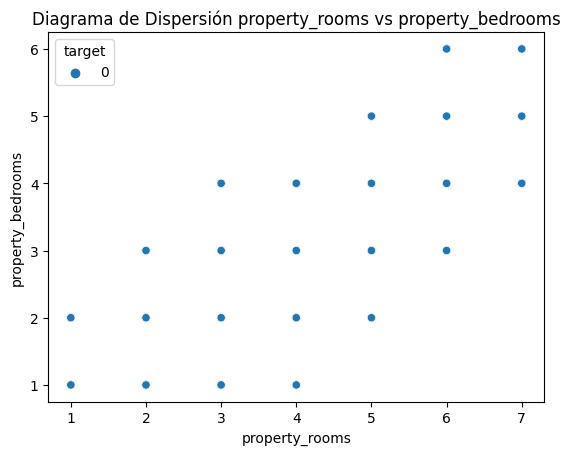

In [199]:
rooms_bedrooms_lof_df = create_dispersion_diagram(ds_train, 'property_rooms', 'property_bedrooms')

In [200]:
new_rooms_bedrooms_lof_df = create_scores_based_on_training(rooms_bedrooms_lof_df, 'property_rooms',
                                                            'property_bedrooms')
new_rooms_bedrooms_lof_df

id  start_date    end_date    latitud  \
398876  T2FRplBuQeDugP19ZRgAPA==  2021-02-13  2021-03-03 -34.605539   
147805  g8aVOW2Z17bZJR1e6g4t3A==  2021-08-19  2021-09-02 -34.609767   
318917  XoCYZbNzXTjmPygod5MNSQ==  2021-03-17  2021-06-05 -34.583755   
204125  0jVg3F5shORKa7kKi1Z+9Q==  2021-05-10  2021-06-05 -34.591590   
295805  G+PIgKq69d7VmKc9kqyjZQ==  2021-07-23  2021-08-23 -34.609359   
...                          ...         ...         ...        ...   
412434  FM0wod7bFZFzwJtcWuBIrw==  2021-09-18  2021-10-20 -34.612770   
382618  XNi6bHGN88VNq4+EEOinVw==  2021-04-27  2021-06-05 -34.566895   
103795  Gi3A3Tjd7vg0dx0WLN3lUg==  2021-05-28  2021-06-05 -34.592106   
219211  yZ1q8SipMwHAKNK0xa1ApQ==  2021-10-23  2022-05-05 -34.628091   
391738  liluDkjRYQmoYG9aECoZ2g==  2021-10-28  2022-01-27 -34.631337   

         longitud   place_l3 property_type  property_rooms  property_bedrooms  \
398876 -58.458807  Caballito  Departamento             1.0                1.0   
147805 -58.446246  Caballito  Departamento             2.0                1.0   
318917 -58.443697    Palermo  Departamento             1.0                1.0   
204125 -58.385946   Recoleta  Departamento             4.0                4.0   
295805 -58.383336  Monserrat  Departamento             1.0                1.0   
...           ...        ...           ...             ...                ...   
412434 -58.391565  Balvanera  Departamento             3.0                2.0   
382618 -58.469665   Belgrano            PH             3.0                2.0   
103795 -58.396012   Recoleta  Departamento             3.0                2.0   
219211 -58.416832      Boedo          Casa             6.0                5.0   
391738 -58.419145      Boedo          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
398876                    51.0                      46.0         82080.0   
147805                    43.0                      40.0         92000.0   
318917                    35.0                      31.0         93913.0   
204125                   171.0                     163.0        598000.0   
295805                    24.0                      24.0         47000.0   
...                        ...                       ...             ...   
412434                    70.0                      63.0        120000.0   
382618                   122.0                     122.0        450000.0   
103795                    60.0                      55.0        112000.0   
219211                   165.0                     165.0        280000.0   
391738                   200.0                     200.0        225000.0   

                                           property_title  target  scores  
398876         Departamento 120 Cuotas en Pesos Caballito       0    -1.0  
147805  Depto,2 Amb.,Villa Crespo,Cid.Balcon,Pileta,Se...       0    -1.0  
318917                   Departamento - Palermo Hollywood       0    -1.0  
204125    SEMIPISO ALTO AL FRENTE TODO LUZ Y SOL. COCHERA       0    -1.0  
295805         Av. DE MAYO 1200- MONOAMB. C/BALCÓN 28mts2       0    -1.0  
...                                                   ...     ...     ...  
412434                 3 ambientes 2 balcones - Balvanera       0    -1.0  
382618                              Venta PH - Belgrano R       0    -1.0  
103795                            Departamento - Recoleta       0    -1.0  
219211                                       Casa - Boedo       0    -1.0  
391738                                       Casa - Boedo       0    -1.0  

[69675 rows x 15 columns]

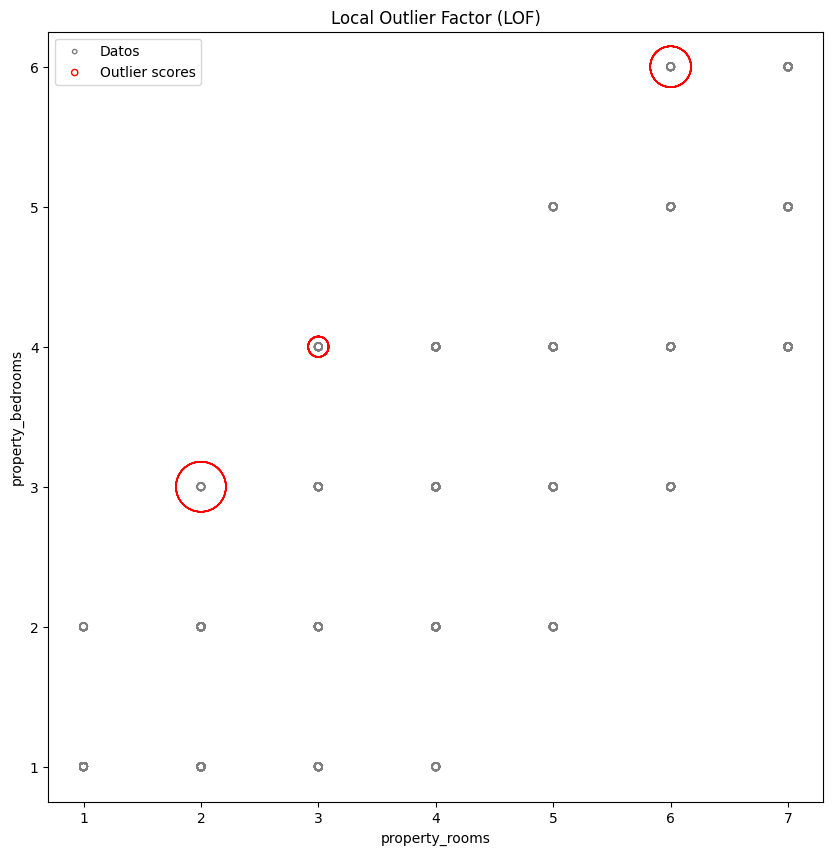

In [201]:
create_lof_graph(new_rooms_bedrooms_lof_df, 'property_rooms', 'property_bedrooms')

**Analisis de outliers para superficie total y superficie cubierta**

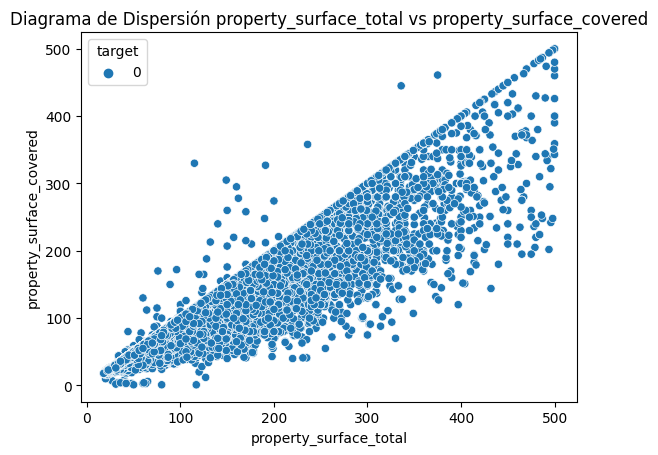

In [202]:
total_covered_lof_df = create_dispersion_diagram(ds_train, 'property_surface_total',
                                                 'property_surface_covered')

In [203]:
new_total_covered_lof_df = create_scores_based_on_training(total_covered_lof_df, 'property_surface_total',
                                                           'property_surface_covered')
new_total_covered_lof_df

id  start_date    end_date    latitud  \
398876  T2FRplBuQeDugP19ZRgAPA==  2021-02-13  2021-03-03 -34.605539   
147805  g8aVOW2Z17bZJR1e6g4t3A==  2021-08-19  2021-09-02 -34.609767   
318917  XoCYZbNzXTjmPygod5MNSQ==  2021-03-17  2021-06-05 -34.583755   
204125  0jVg3F5shORKa7kKi1Z+9Q==  2021-05-10  2021-06-05 -34.591590   
295805  G+PIgKq69d7VmKc9kqyjZQ==  2021-07-23  2021-08-23 -34.609359   
...                          ...         ...         ...        ...   
412434  FM0wod7bFZFzwJtcWuBIrw==  2021-09-18  2021-10-20 -34.612770   
382618  XNi6bHGN88VNq4+EEOinVw==  2021-04-27  2021-06-05 -34.566895   
103795  Gi3A3Tjd7vg0dx0WLN3lUg==  2021-05-28  2021-06-05 -34.592106   
219211  yZ1q8SipMwHAKNK0xa1ApQ==  2021-10-23  2022-05-05 -34.628091   
391738  liluDkjRYQmoYG9aECoZ2g==  2021-10-28  2022-01-27 -34.631337   

         longitud   place_l3 property_type  property_rooms  property_bedrooms  \
398876 -58.458807  Caballito  Departamento             1.0                1.0   
147805 -58.446246  Caballito  Departamento             2.0                1.0   
318917 -58.443697    Palermo  Departamento             1.0                1.0   
204125 -58.385946   Recoleta  Departamento             4.0                4.0   
295805 -58.383336  Monserrat  Departamento             1.0                1.0   
...           ...        ...           ...             ...                ...   
412434 -58.391565  Balvanera  Departamento             3.0                2.0   
382618 -58.469665   Belgrano            PH             3.0                2.0   
103795 -58.396012   Recoleta  Departamento             3.0                2.0   
219211 -58.416832      Boedo          Casa             6.0                5.0   
391738 -58.419145      Boedo          Casa             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
398876                    51.0                      46.0         82080.0   
147805                    43.0                      40.0         92000.0   
318917                    35.0                      31.0         93913.0   
204125                   171.0                     163.0        598000.0   
295805                    24.0                      24.0         47000.0   
...                        ...                       ...             ...   
412434                    70.0                      63.0        120000.0   
382618                   122.0                     122.0        450000.0   
103795                    60.0                      55.0        112000.0   
219211                   165.0                     165.0        280000.0   
391738                   200.0                     200.0        225000.0   

                                           property_title  target    scores  
398876         Departamento 120 Cuotas en Pesos Caballito       0 -1.000000  
147805  Depto,2 Amb.,Villa Crespo,Cid.Balcon,Pileta,Se...       0 -1.000000  
318917                   Departamento - Palermo Hollywood       0 -1.000000  
204125    SEMIPISO ALTO AL FRENTE TODO LUZ Y SOL. COCHERA       0 -1.245309  
295805         Av. DE MAYO 1200- MONOAMB. C/BALCÓN 28mts2       0 -1.000000  
...                                                   ...     ...       ...  
412434                 3 ambientes 2 balcones - Balvanera       0 -1.000000  
382618                              Venta PH - Belgrano R       0 -1.000000  
103795                            Departamento - Recoleta       0 -1.000000  
219211                                       Casa - Boedo       0 -1.000000  
391738                                       Casa - Boedo       0 -1.000000  

[69675 rows x 15 columns]

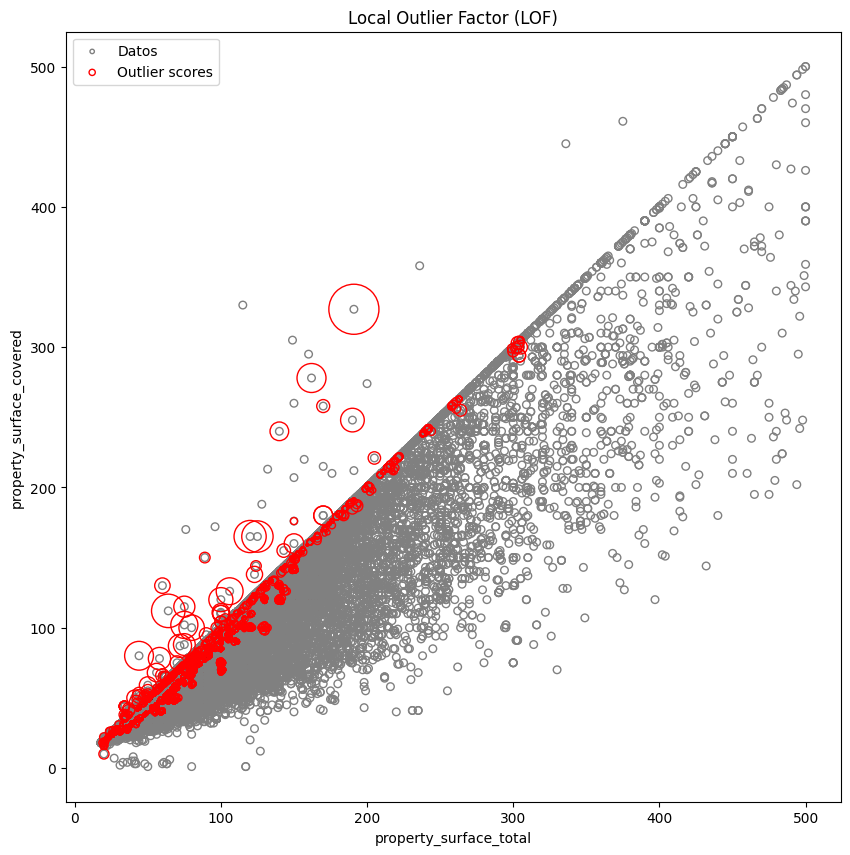

In [204]:
create_lof_graph(new_total_covered_lof_df, 'property_surface_total', 'property_surface_covered')

### Reduccion de la Dimensionalidad

#### Analisis PCA

In [205]:
# Train con ID
ds_train_id = ds_train.copy()

# Test con ID
ds_test_id = ds_test.copy()


# Train
ds_train.drop(columns=['id'], inplace=True)

# Test
ds_test.drop(columns=['id'], inplace=True)

In [206]:
from sklearn.preprocessing import StandardScaler

ds_reducido = ds_train.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido

latitud   longitud  property_rooms  property_bedrooms  \
398876 -34.605539 -58.458807             1.0                1.0   
147805 -34.609767 -58.446246             2.0                1.0   
318917 -34.583755 -58.443697             1.0                1.0   
204125 -34.591590 -58.385946             4.0                4.0   
295805 -34.609359 -58.383336             1.0                1.0   
...           ...        ...             ...                ...   
412434 -34.612770 -58.391565             3.0                2.0   
382618 -34.566895 -58.469665             3.0                2.0   
103795 -34.592106 -58.396012             3.0                2.0   
219211 -34.628091 -58.416832             6.0                5.0   
391738 -34.631337 -58.419145             4.0                3.0   

        property_surface_total  property_surface_covered  
398876                    51.0                      46.0  
147805                    43.0                      40.0  
318917                    35.0                      31.0  
204125                   171.0                     163.0  
295805                    24.0                      24.0  
...                        ...                       ...  
412434                    70.0                      63.0  
382618                   122.0                     122.0  
103795                    60.0                      55.0  
219211                   165.0                     165.0  
391738                   200.0                     200.0  

[69675 rows x 6 columns]

In [207]:
ds_reducido_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido), columns=ds_reducido.columns)
ds_reducido_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -0.350162 -0.504444       -1.399226           -0.89062   
1     -0.510409 -0.167604       -0.587896           -0.89062   
2      0.475473 -0.099257       -1.399226           -0.89062   
3      0.178510  1.449334        1.034765            2.29109   
4     -0.494930  1.519327       -1.399226           -0.89062   
...         ...       ...             ...                ...   
69670 -0.624226  1.298681        0.223435            0.16995   
69671  1.114498 -0.795590        0.223435            0.16995   
69672  0.158955  1.179420        0.223435            0.16995   
69673 -1.204906  0.621126        2.657425            3.35166   
69674 -1.327933  0.559095        1.034765            1.23052   

       property_surface_total  property_surface_covered  
0                   -0.513236                 -0.500530  
1                   -0.644482                 -0.619703  
2                   -0.775729                 -0.798461  
3                    1.455468                  1.823332  
4                   -0.956194                 -0.937496  
...                       ...                       ...  
69670               -0.201524                 -0.162875  
69671                0.651580                  1.008987  
69672               -0.365583                 -0.321772  
69673                1.357032                  1.863056  
69674                1.931238                  2.558229  

[69675 rows x 6 columns]

**Replicamos para test las mismas transformaciones**

In [208]:
ds_reducido_test = ds_test.drop(
    ['start_date', 'end_date', 'place_l3', 'property_title', 'property_type', 'property_price'], axis=1)
ds_reducido_test

latitud   longitud  property_rooms  property_bedrooms  \
232929 -34.599894 -58.420836             3.0                2.0   
39572  -34.567777 -58.449607             3.0                2.0   
427076 -34.566029 -58.454483             2.0                1.0   
293229 -34.581881 -58.426657             1.0                1.0   
219569 -34.590154 -58.423578             3.0                2.0   
...           ...        ...             ...                ...   
452240 -34.595506 -58.401459             3.0                2.0   
50870  -34.639842 -58.427159             3.0                2.0   
260391 -34.595876 -58.424643             1.0                1.0   
361807 -34.586985 -58.410102             4.0                3.0   
415952 -34.606853 -58.446130             3.0                2.0   

        property_surface_total  property_surface_covered  
232929                    57.0                      50.0  
39572                     55.0                      50.0  
427076                    77.0                      45.0  
293229                    33.0                      29.0  
219569                   107.0                     107.0  
...                        ...                       ...  
452240                    71.0                      67.0  
50870                     51.0                      40.0  
260391                    26.0                      26.0  
361807                   208.0                     208.0  
415952                    72.0                      70.0  

[16333 rows x 6 columns]

In [209]:
ds_reducido_test_normalizado = pd.DataFrame(StandardScaler().fit_transform(ds_reducido_test),
                                            columns=ds_reducido.columns)
ds_reducido_test_normalizado

latitud  longitud  property_rooms  property_bedrooms  \
0     -0.207201  0.483472        0.239062           0.193483   
1      1.106519 -0.306253        0.239062           0.193483   
2      1.178040 -0.440081       -0.575075          -0.883597   
3      0.529616  0.323702       -1.389212          -0.883597   
4      0.191229  0.408196        0.239062           0.193483   
...         ...       ...             ...                ...   
16328 -0.027704  1.015330        0.239062           0.193483   
16329 -1.841240  0.309901        0.239062           0.193483   
16330 -0.042843  0.378961       -1.389212          -0.883597   
16331  0.320834  0.778091        1.053199           1.270562   
16332 -0.491835 -0.210819        0.239062           0.193483   

       property_surface_total  property_surface_covered  
0                   -0.405515                 -0.406181  
1                   -0.437835                 -0.406181  
2                   -0.082315                 -0.505418  
3                   -0.793355                 -0.822975  
4                    0.402485                  0.725115  
...                       ...                       ...  
16328               -0.179275                 -0.068777  
16329               -0.502475                 -0.604654  
16330               -0.906475                 -0.882516  
16331                2.034646                  2.729692  
16332               -0.163115                 -0.009235  

[16333 rows x 6 columns]

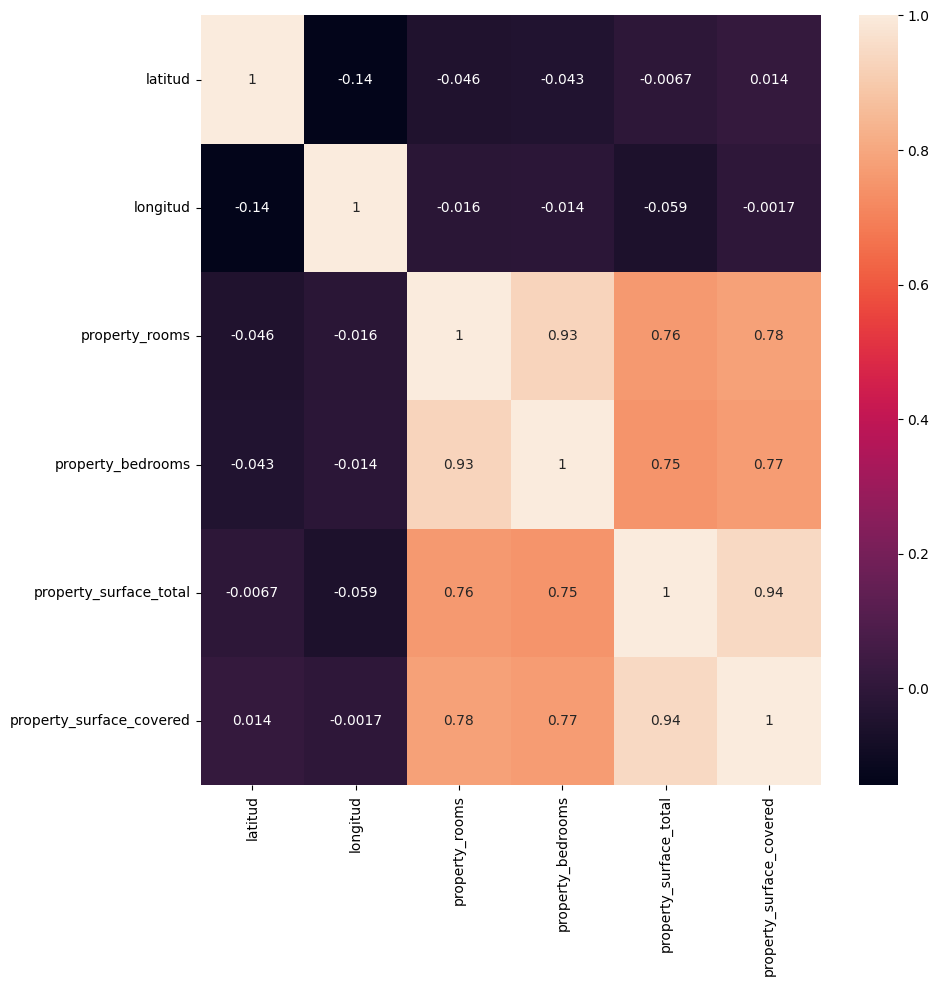

In [210]:
plt.figure(figsize=(10, 10))
ax = sns.heatmap(ds_reducido_normalizado.corr(), annot=True)

In [211]:
ds_reducido_normalizado.shape

(69675, 6)

In [212]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
superficie_transformada = pca.fit_transform(ds_reducido_normalizado)

ds_pca = pd.DataFrame(data=superficie_transformada,
                      columns=['cp_1', 'cp_2', 'cp_3', 'cp_4', 'cp_5', 'cp_6'])
ds_pca

cp_1      cp_2      cp_3      cp_4      cp_5      cp_6
0     -1.636648 -0.147912  0.608238  0.651449  0.376467  0.074125
1     -1.359149  0.235174  0.503040  0.154012 -0.211772  0.051133
2     -1.937454 -0.430810 -0.236768  0.314928  0.362899 -0.000278
3      3.271712  0.904228 -1.242364 -0.070675  0.893485  0.163354
4     -2.110543  1.404952 -0.692626  0.245448  0.358497 -0.027780
...         ...       ...       ...       ...       ...       ...
69670  0.000918  1.379163 -0.465046 -0.316731 -0.048933 -0.033212
69671  1.025693 -1.381199 -0.285402  0.524111 -0.018069  0.283303
69672 -0.170983  0.750687 -0.918594 -0.538523 -0.057173 -0.049331
69673  4.618204  1.386975  0.349510 -1.334094  0.468012  0.270435
69674  3.391138  1.277959  0.381045  1.180599  0.186910  0.477688

[69675 rows x 6 columns]

In [213]:
varianza_explicada = pca.explained_variance_ratio_
for varianza in varianza_explicada:
    print(round(varianza, 2))

0.58
0.19
0.14
0.07
0.01
0.01


In [214]:
varianza_explicada.cumsum()

array([0.57782423, 0.769026  , 0.91193457, 0.97916326, 0.99099261,
       1.        ])

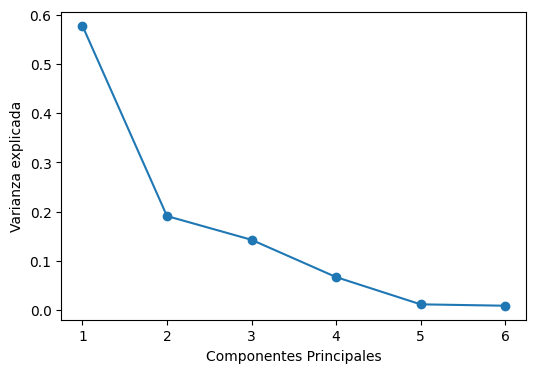

In [215]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

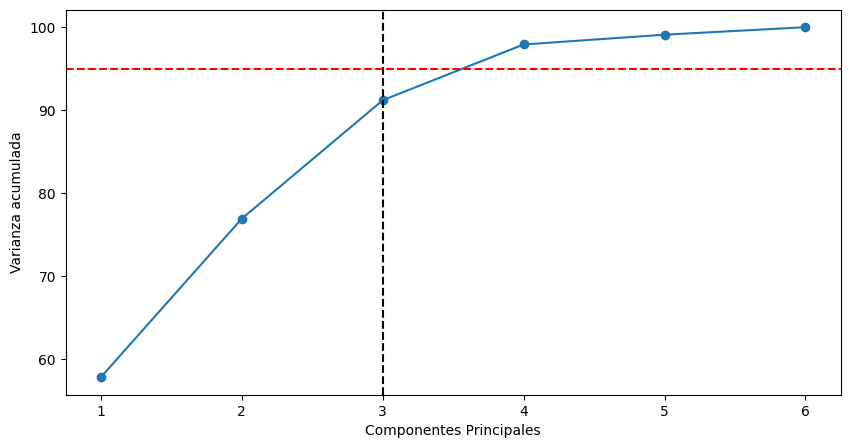

In [216]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada) + 1))
k = np.argmax(varianza_explicada.cumsum() * 100 > 95)

plt.figure(figsize=(10, 5))
plt.plot(list_x, varianza_explicada.cumsum() * 100, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza acumulada')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.show()

In [217]:
ds_pca.drop(columns=['cp_4', 'cp_5', 'cp_6'], inplace=True)
ds_pca.head()

cp_1      cp_2      cp_3
0 -1.636648 -0.147912  0.608238
1 -1.359149  0.235174  0.503040
2 -1.937454 -0.430810 -0.236768
3  3.271712  0.904228 -1.242364
4 -2.110543  1.404952 -0.692626

### Clasificación

#### Tercera variable (25-50-25 por tipo de propiedad)

In [218]:
def precio_metro_cuadrado(dataset):
    pxm2 = dataset['property_price'] / dataset['property_surface_total']
    sorted_pxm2 = pxm2.sort_values(ascending=True)
    return (pxm2, sorted_pxm2)

def agregar_variable(dataset, categoria, nombre_categoria, pxm2, sorted_pxm2):
    nueva_categoria = pd.DataFrame()
    nueva_categoria['pxm2'] = sorted_pxm2
    nueva_categoria[nombre_categoria] = categoria
    dataset[nombre_categoria] = nueva_categoria[nombre_categoria]
    return dataset

def separar_25_50_25(dataset):
    categoria = []
    for i in range(0, len(dataset) // 4):
        categoria.append('Bajo')
    for i in range(len(dataset) // 4, 3 * len(dataset) // 4):
        categoria.append('Medio')
    for i in range(3 * len(dataset) // 4, len(dataset)):
        categoria.append('Alto')

    return categoria

(pxm2, sorted_pxm2) = precio_metro_cuadrado(ds_train_id)
ds_train_id['pxm2'] = pxm2

##### Casas

In [219]:
casas = ds_train_id[ds_train_id.property_type == 'Casa'].copy()
dptos = ds_train_id[ds_train_id.property_type == 'Departamento'].copy()
phs = ds_train_id[ds_train_id.property_type == 'PH'].copy()

In [220]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(casas)
categoria = separar_25_50_25(casas)
casas = agregar_variable(casas, categoria, 'tipo_precio', pxm2, sorted_pxm2)

##### Departamentos

In [221]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(dptos)
categoria = separar_25_50_25(dptos)
dptos = agregar_variable(dptos, categoria, 'tipo_precio', pxm2, sorted_pxm2)

##### PH

In [222]:
(pxm2, sorted_pxm2) = precio_metro_cuadrado(phs)
categoria = separar_25_50_25(phs)
phs = agregar_variable(phs, categoria, 'tipo_precio', pxm2, sorted_pxm2)

##### Union de las 3 al dataset

In [223]:
nueva_categoria = pd.concat([casas, dptos, phs])
ds_train_id['tipo_precio'] = nueva_categoria['tipo_precio']

#### Construccion de la variable en Test

In [224]:
ds_test_id['pxm2'] = ds_test_id['property_price'] / ds_test_id['property_surface_total']

In [225]:
lista_tipo_precio_test = []
for registro in ds_test_id.itertuples():
    #print(registro.Index)
    if registro.property_type == 'Casa':
        if registro.pxm2 < casas[casas['tipo_precio'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > casas[casas['tipo_precio'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'Departamento':
        if registro.pxm2 < dptos[dptos['tipo_precio'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > dptos[dptos['tipo_precio'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')
    elif registro.property_type == 'PH':
        if registro.pxm2 < phs[phs['tipo_precio'] == 'Medio'].pxm2.min():
            lista_tipo_precio_test.append('Bajo')
        elif registro.pxm2 > phs[phs['tipo_precio'] == 'Medio'].pxm2.max():
            lista_tipo_precio_test.append('Alto')
        else:
            lista_tipo_precio_test.append('Medio')




In [226]:
ds_test_id['tipo_precio'] = pd.Series(data=lista_tipo_precio_test, name='tipo_precio', index=ds_test_id.index)

### Exportamos datasets

In [227]:
ds_test = ds_test.drop(['start_date', 'end_date'], axis=1)

In [228]:
ds_train.to_csv('datasets/tp1-train.csv')
ds_test.to_csv('datasets/tp1-test.csv')


ds_train_id.to_csv('datasets/tp1-train_id.csv')
ds_test_id.to_csv('datasets/tp1-test_id.csv')